In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import peakutils
from util.FreqReader import read_freq
from util.DoubleAnharmonicity import DoubleAnharmonicity


plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200

In [2]:
def do_anharmonism_correction(x, coef1, coef2):
    if 1000 < x < 2000:
       return x * coef1
    elif 2000 < x:
      return x * coef2

In [29]:
propanol_acetone = read_freq("./bacteriochlorophyl/propanol/propanol_acetone.txt")
propanol_ethanol = read_freq("./bacteriochlorophyl/propanol/propanol_ethanol.txt")
propanol_methanol = read_freq("./bacteriochlorophyl/propanol/propanol_methanol.txt")

farnesyl_acetone = read_freq("./bacteriochlorophyl/farnesyl/far_acetone.txt")
farnesyl_ethanol = read_freq("./bacteriochlorophyl/farnesyl/far_ethanol.txt")
farnesyl_isopropanol = read_freq("./bacteriochlorophyl/farnesyl/far_isopropano.txt")
farnesyl_methanol = read_freq("./bacteriochlorophyl/farnesyl/far_methanol.txt")


bact_chlor_e_R1_acetone = read_freq("./bacteriochlorophyl/bact_chlor_e/R1/acetone/R1_acetone_freq_ir.txt")
bact_chlor_e_R1_ethanol = read_freq("./bacteriochlorophyl/bact_chlor_e/R1/ethanol/R1_ethanol_freq_ir.txt")
bact_chlor_e_R1_isopropanol = read_freq("./bacteriochlorophyl/bact_chlor_e/R1/isopropanol/R1_isopropanol_freq_ir.txt")
bact_chlor_e_R1_methanol = read_freq("./bacteriochlorophyl/bact_chlor_e/R1/methanol/R1_methyl_freq_ir.txt")

bact_chlor_e_R2_acetone = read_freq("./bacteriochlorophyl/bact_chlor_e/R2/acetone/r2_acetone_freq_ir.txt")
bact_chlor_e_R2_ethanol = read_freq("./bacteriochlorophyl/bact_chlor_e/R2/ethanol/R2_ethanol_ir.txt")
bact_chlor_e_R2_isopropanol = read_freq("./bacteriochlorophyl/bact_chlor_e/R2/isopropanol/R2_isoprop_freq_ir.txt")
bact_chlor_e_R2_methanol = read_freq("./bacteriochlorophyl/bact_chlor_e/R2/methanol/R2_methanol_freq_ir.txt")

farnesyl = read_freq("./bacteriochlorophyl/farnesyl/farnezyl_ir.txt")
r1 = read_freq("./bacteriochlorophyl/bact_chlor_e/R1/R1/R1_ir.txt")
r2 = read_freq("./bacteriochlorophyl/bact_chlor_e/R2/R2/R2_ir.txt")

acetone = read_freq("./bacteriochlorophyl/solvent/acetone/acetone_ir.txt")
ethanol = read_freq("./bacteriochlorophyl/solvent/ethanol/ethanol_ir.txt")
isopropanol = read_freq("./bacteriochlorophyl/solvent/isopropanol/isopropanol_ir.txt")
methanol = read_freq("./bacteriochlorophyl/solvent/methanol/methanol_ir.txt")

In [5]:
def plot_graph(df, legends, coef1=1, coef2=1):
    x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y = df['Y']
    peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
    plt.plot(x, y, '-', lw=1.7, alpha=1)
    for peak in peaks:
        if x[peak] > 2000:
            plt.text(x[peak], y[peak] + 50, int(x[peak]), horizontalalignment='center', color='darkgreen')
    plt.plot(x[peaks], y[peaks], 'darkgreen', marker="o", ls="", ms=5)

    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

In [6]:
def plot_graph_2(df1, df2, legends, legend_title, coef1=1, coef2=1, y_shift=0):
    x1 = df1['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y1 = df1['Y']

    x2 = df2['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y2 = df2['Y']

    peaks_1 = peakutils.indexes(y1, thres=0.01, min_dist=1)
    peaks_2 = peakutils.indexes(y2, thres=0.01, min_dist=1)

    for peak in peaks_1:
        if x1[peak] > 2000:
            plt.text(x1[peak], y1[peak] + 50, int(x1[peak]), horizontalalignment='center', color='darkgreen')

    for peak in peaks_2:
        if x2[peak] > 2000:
            plt.text(x2[peak], y2[peak] + 50 + y_shift, int(x2[peak]), horizontalalignment='center', color='darkgreen')

    plt.plot(x1, y1, '-', lw=1.7, alpha=1)
    plt.plot(x2, y2 + y_shift, '--', lw=1.7, alpha=1)

    plt.plot(x1[peaks_1], y1[peaks_1], 'darkgreen', marker="o", ls="", ms=5)
    plt.plot(x2[peaks_2], y2[peaks_2]+y_shift, 'maroon', marker="o", ls="", ms=5)
    
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

In [7]:
def plot_graph_3(dataFrame_1, dataFrame_2, dataFrame_3, legends, legend_title, coef1=1, coef2=1, y_shift=0):

    x1 = dataFrame_1['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y1 = dataFrame_1['value']

    x2 = dataFrame_2['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y2 = dataFrame_2['value']

    x3 = dataFrame_3['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y3 = dataFrame_3['value']

    peaks_1 = peakutils.indexes(y1, thres=0.01, min_dist=1)
    peaks_2 = peakutils.indexes(y2, thres=0.01, min_dist=1)
    peaks_3 = peakutils.indexes(y3, thres=0.01, min_dist=1)

    plt.plot(x1, y1, '-', lw=1.7, alpha=1)
    plt.plot(x2, y2, '--', lw=1.7, alpha=1)
    plt.plot(x3, y3, '-.', lw=1.7, alpha=1)

    plt.plot(x1[peaks_1], y1[peaks_1], 'darkgreen', marker="o", ls="", ms=5)
    plt.plot(x2[peaks_2], y2[peaks_2], 'darkgreen', marker="o", ls="", ms=5)
    plt.plot(x3[peaks_3], y3[peaks_3], 'darkgreen', marker="o", ls="", ms=5)

    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

In [23]:
def plot_graph4(dataFrame_1, dataFrame_2, dataFrame_3, dataFrame_4, legends, legend_title, coef1=1, coef2=1, coef3=1,
               coef4=1, mp_y_1=1, mp_y_2=1, mp_y_3=1, mp_y_4=1):
    max = dataFrame_3['value'].max() if dataFrame_3['value'].max() > dataFrame_4['value'].max() else dataFrame_4[
        'value'].max()

    x1 = dataFrame_1['freq']
    y1 = dataFrame_1['value'] * max * mp_y_1

    x2 = dataFrame_2['freq']
    y2 = dataFrame_2['value'] * max * mp_y_2

    x3 = dataFrame_3['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y3 = dataFrame_3['value'] * mp_y_3

    x4 = dataFrame_4['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y4 = dataFrame_4['value'] * mp_y_4

    peaks_3 = peakutils.indexes(y3, thres=0.01, min_dist=1)
    peaks_4 = peakutils.indexes(y4, thres=0.01, min_dist=1)


    plt.plot(x1, y1, '-', lw=1.7, alpha=1)
    plt.plot(x2, y2, '--', lw=1.7, alpha=1)
    plt.plot(x3, y3, '-.', lw=1.7, alpha=1)
    plt.plot(x4, y4, ':', lw=1.7, alpha=1)

    for peak in peaks_3:
        if x3[peak] > 2000:
            plt.text(x3[peak], y3[peak] + 50, int(x3[peak]), horizontalalignment='center', color='darkgreen')

    for peak in peaks_4:
        if x4[peak] > 2000:
            plt.text(x4[peak], y4[peak] + 110, int(x4[peak]), horizontalalignment='center', color='maroon')

    plt.plot(x3[peaks_3], y3[peaks_3], 'darkgreen', marker="o", ls="", ms=5)
    plt.plot(x4[peaks_4], y4[peaks_4], 'maroon', marker="o", ls="", ms=5)

    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

In [5]:
def plot_all(dfs,legends, coef1=1, coef2=1, y_shift=0, showPeaks=False, forcedFirstPeaks=True):
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        plt.plot(x, y+i*y_shift, '-', lw=1.7, alpha=1)

        i = i+1
    
    i = 0
    if showPeaks or forcedFirstPeaks: 
        for df in dfs:
            x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
            y = df['Y']
            peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
            for peak in peaks:
                if x[peak] > 2000:
                    plt.text(x[peak], y[peak]+50+i*y_shift, int(x[peak]), horizontalalignment='center', color='darkgreen')
            plt.plot(x[peaks], y[peaks]+i*y_shift, 'darkgreen', marker="o", ls="", ms=5)
            i = i+1
            if not showPeaks:
                break
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
        plt.plot(x[peaks], y[peaks]+i*y_shift, marker="o", ls="", ms=5)

        i = i+1
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))


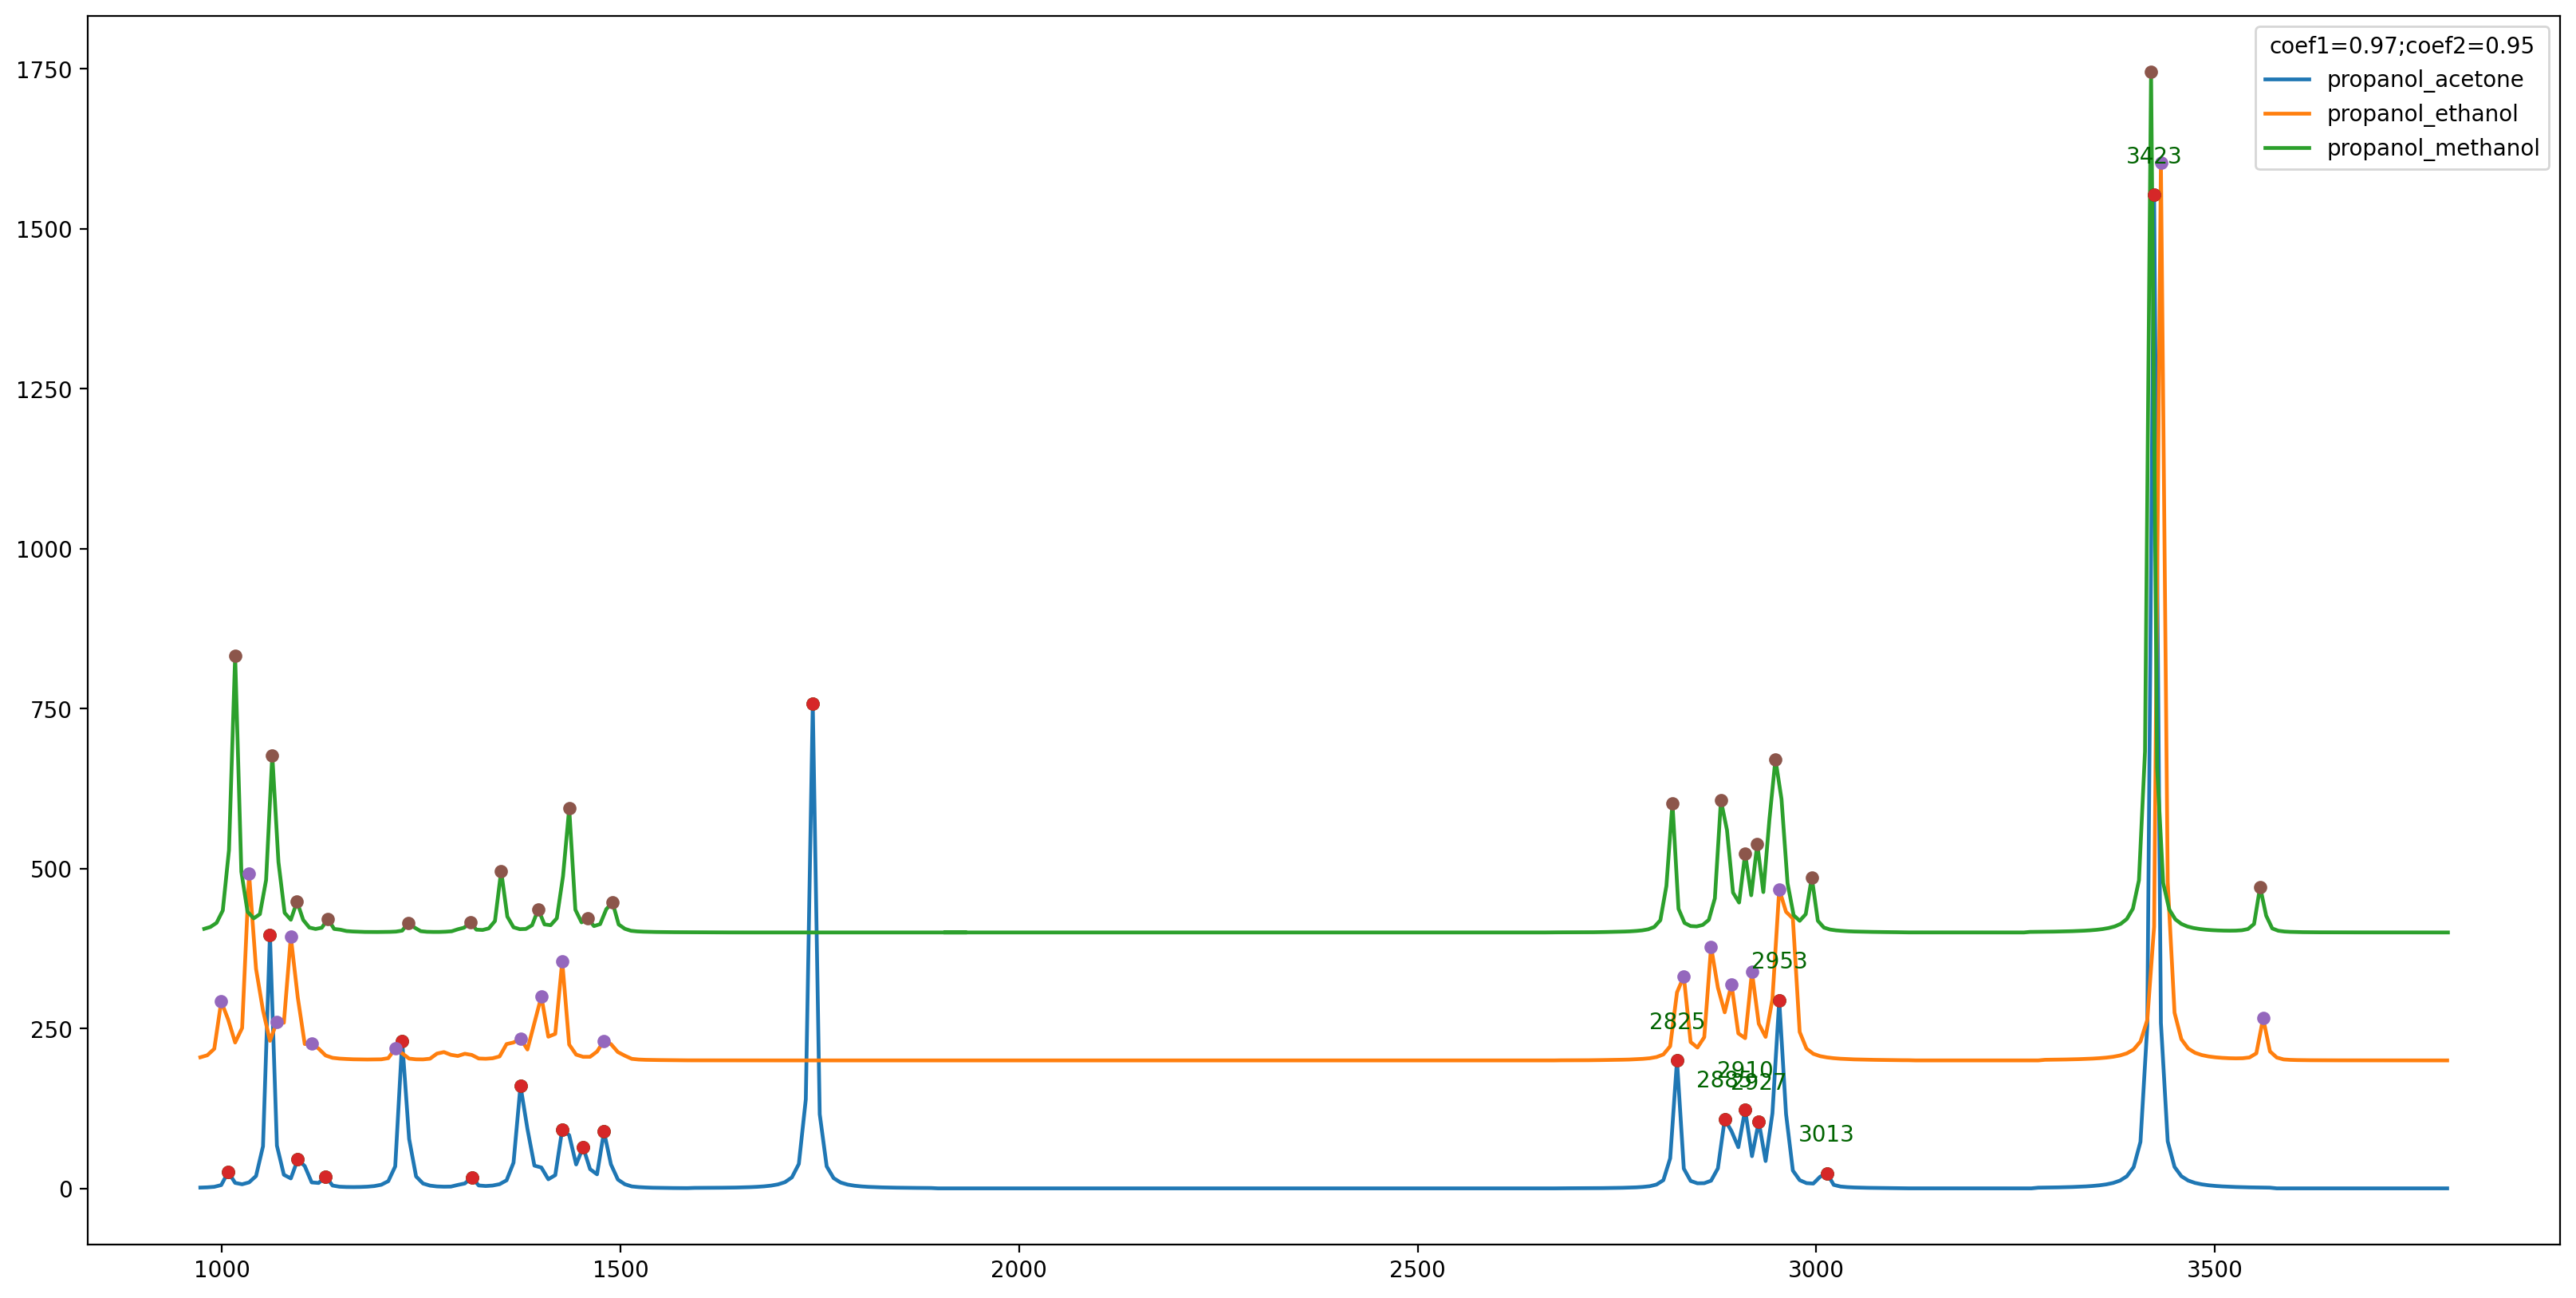

In [6]:
plot_all([propanol_acetone, propanol_ethanol, propanol_methanol],
          ['propanol_acetone', 'propanol_ethanol', 'propanol_methanol'],
          coef1=0.97, coef2=0.95,
          y_shift=200)


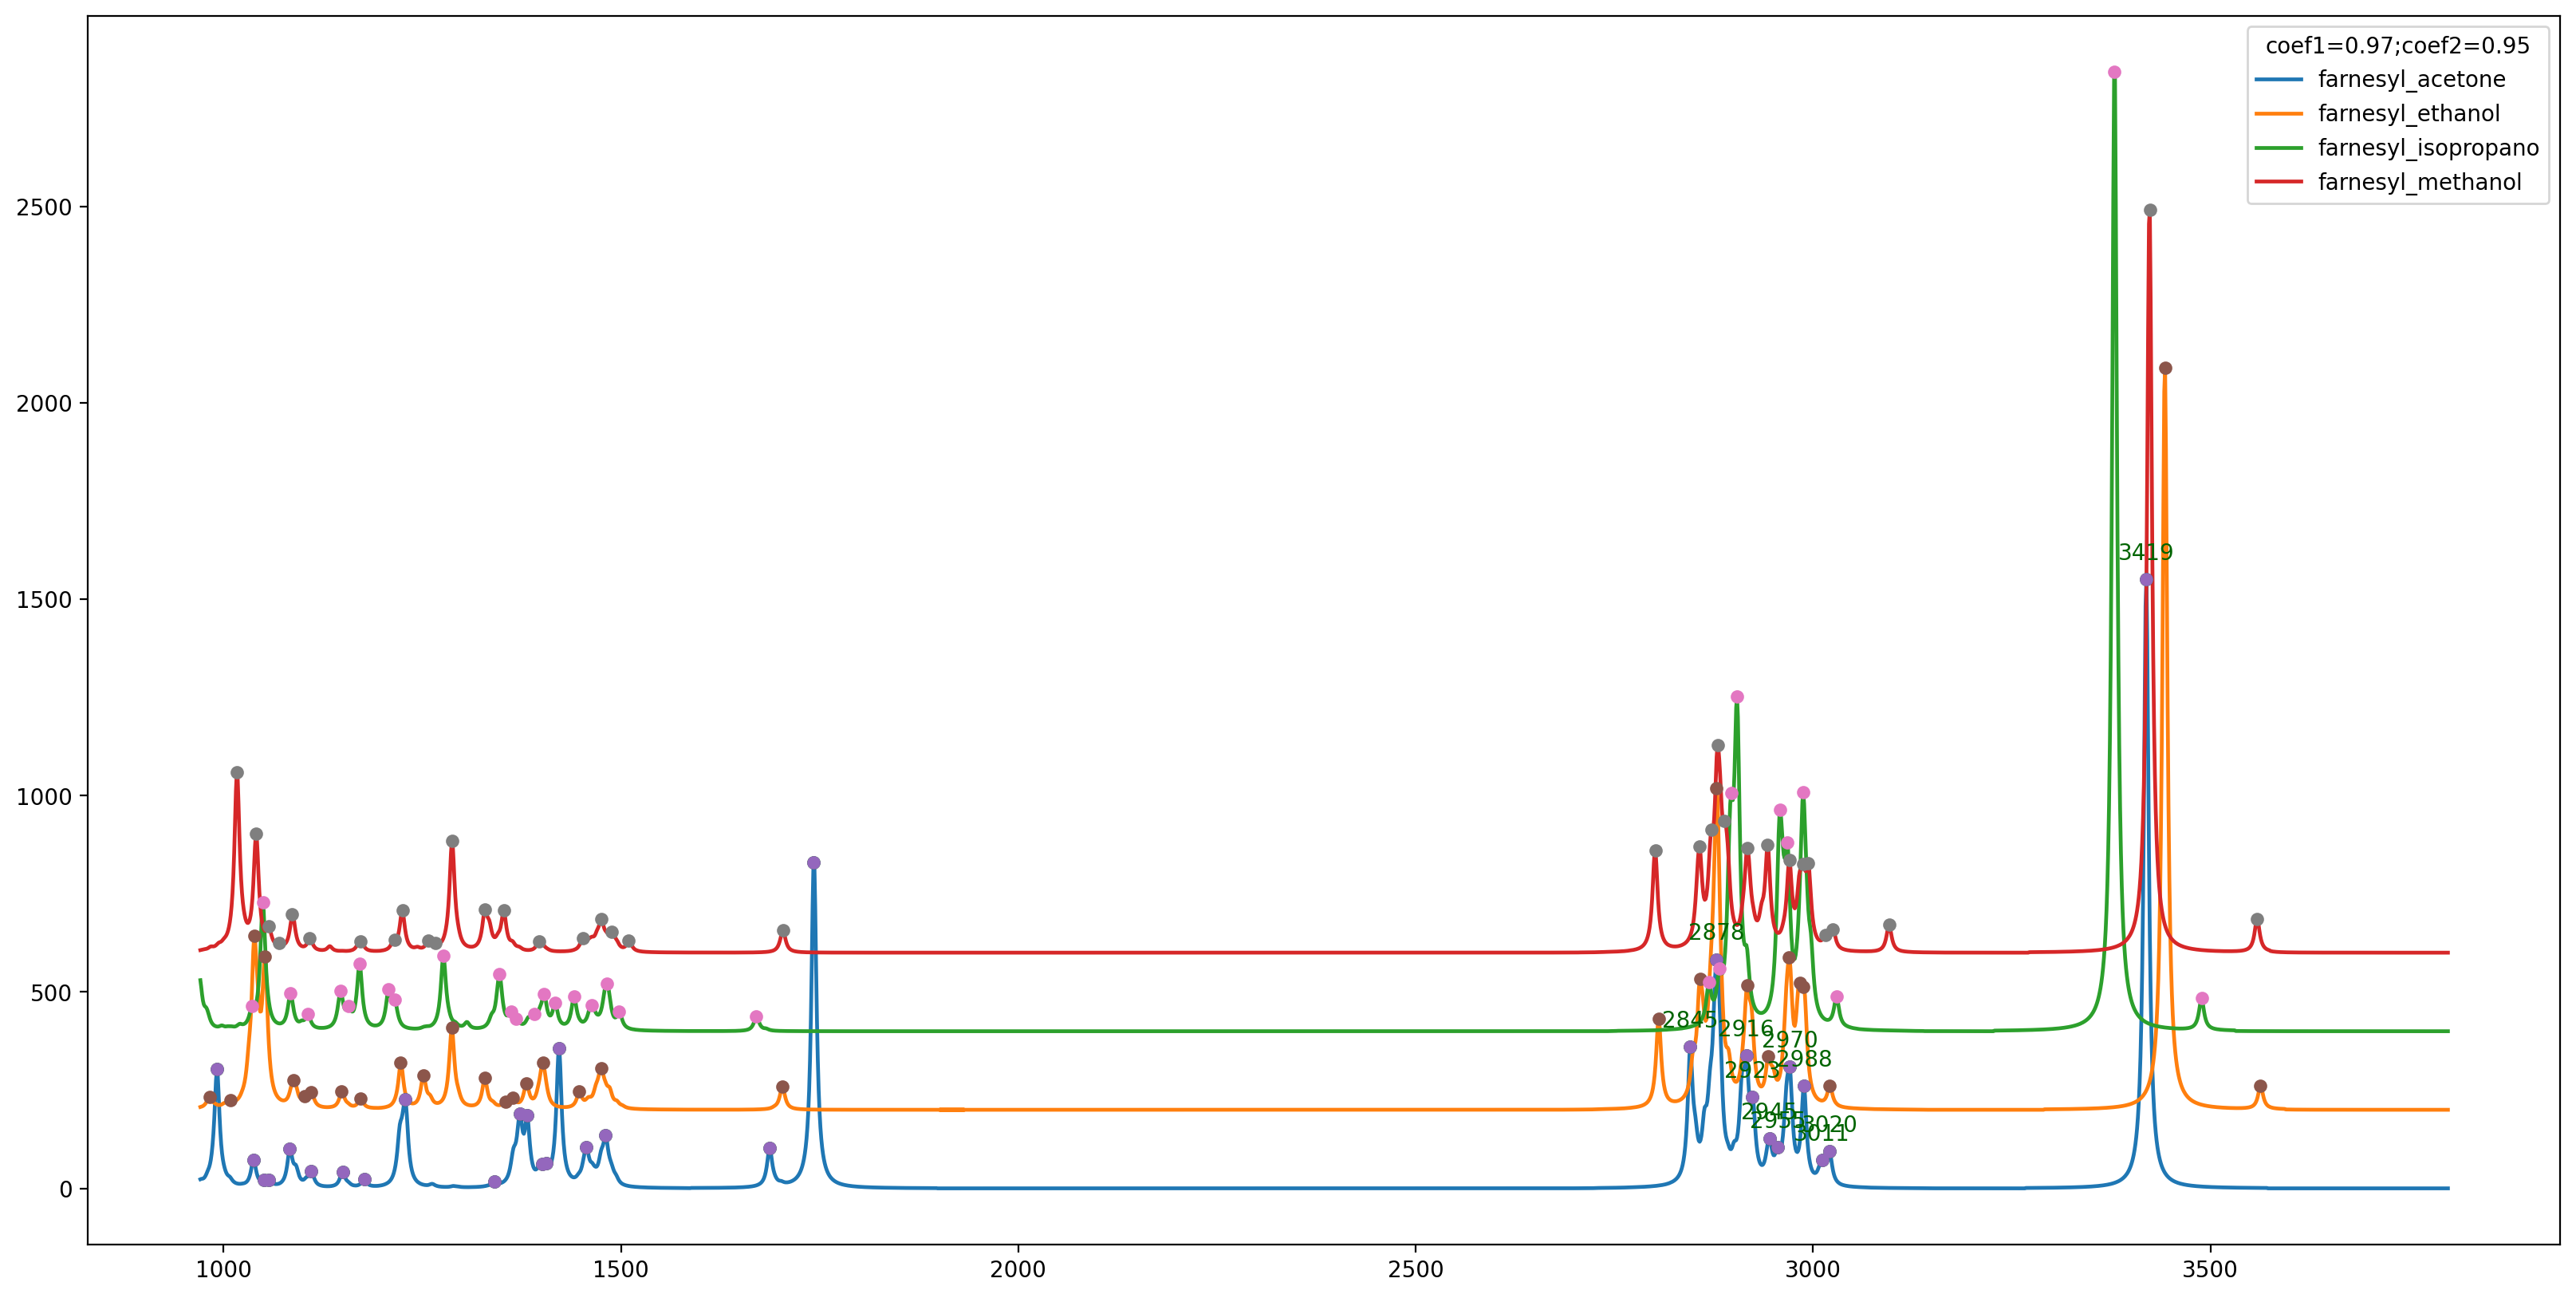

In [7]:
plot_all([farnesyl_acetone, farnesyl_ethanol, farnesyl_isopropanol, farnesyl_methanol],
          ['farnesyl_acetone', 'farnesyl_ethanol', 'farnesyl_isopropano', 'farnesyl_methanol'],
          coef1=0.97, coef2=0.95,
          y_shift=200)


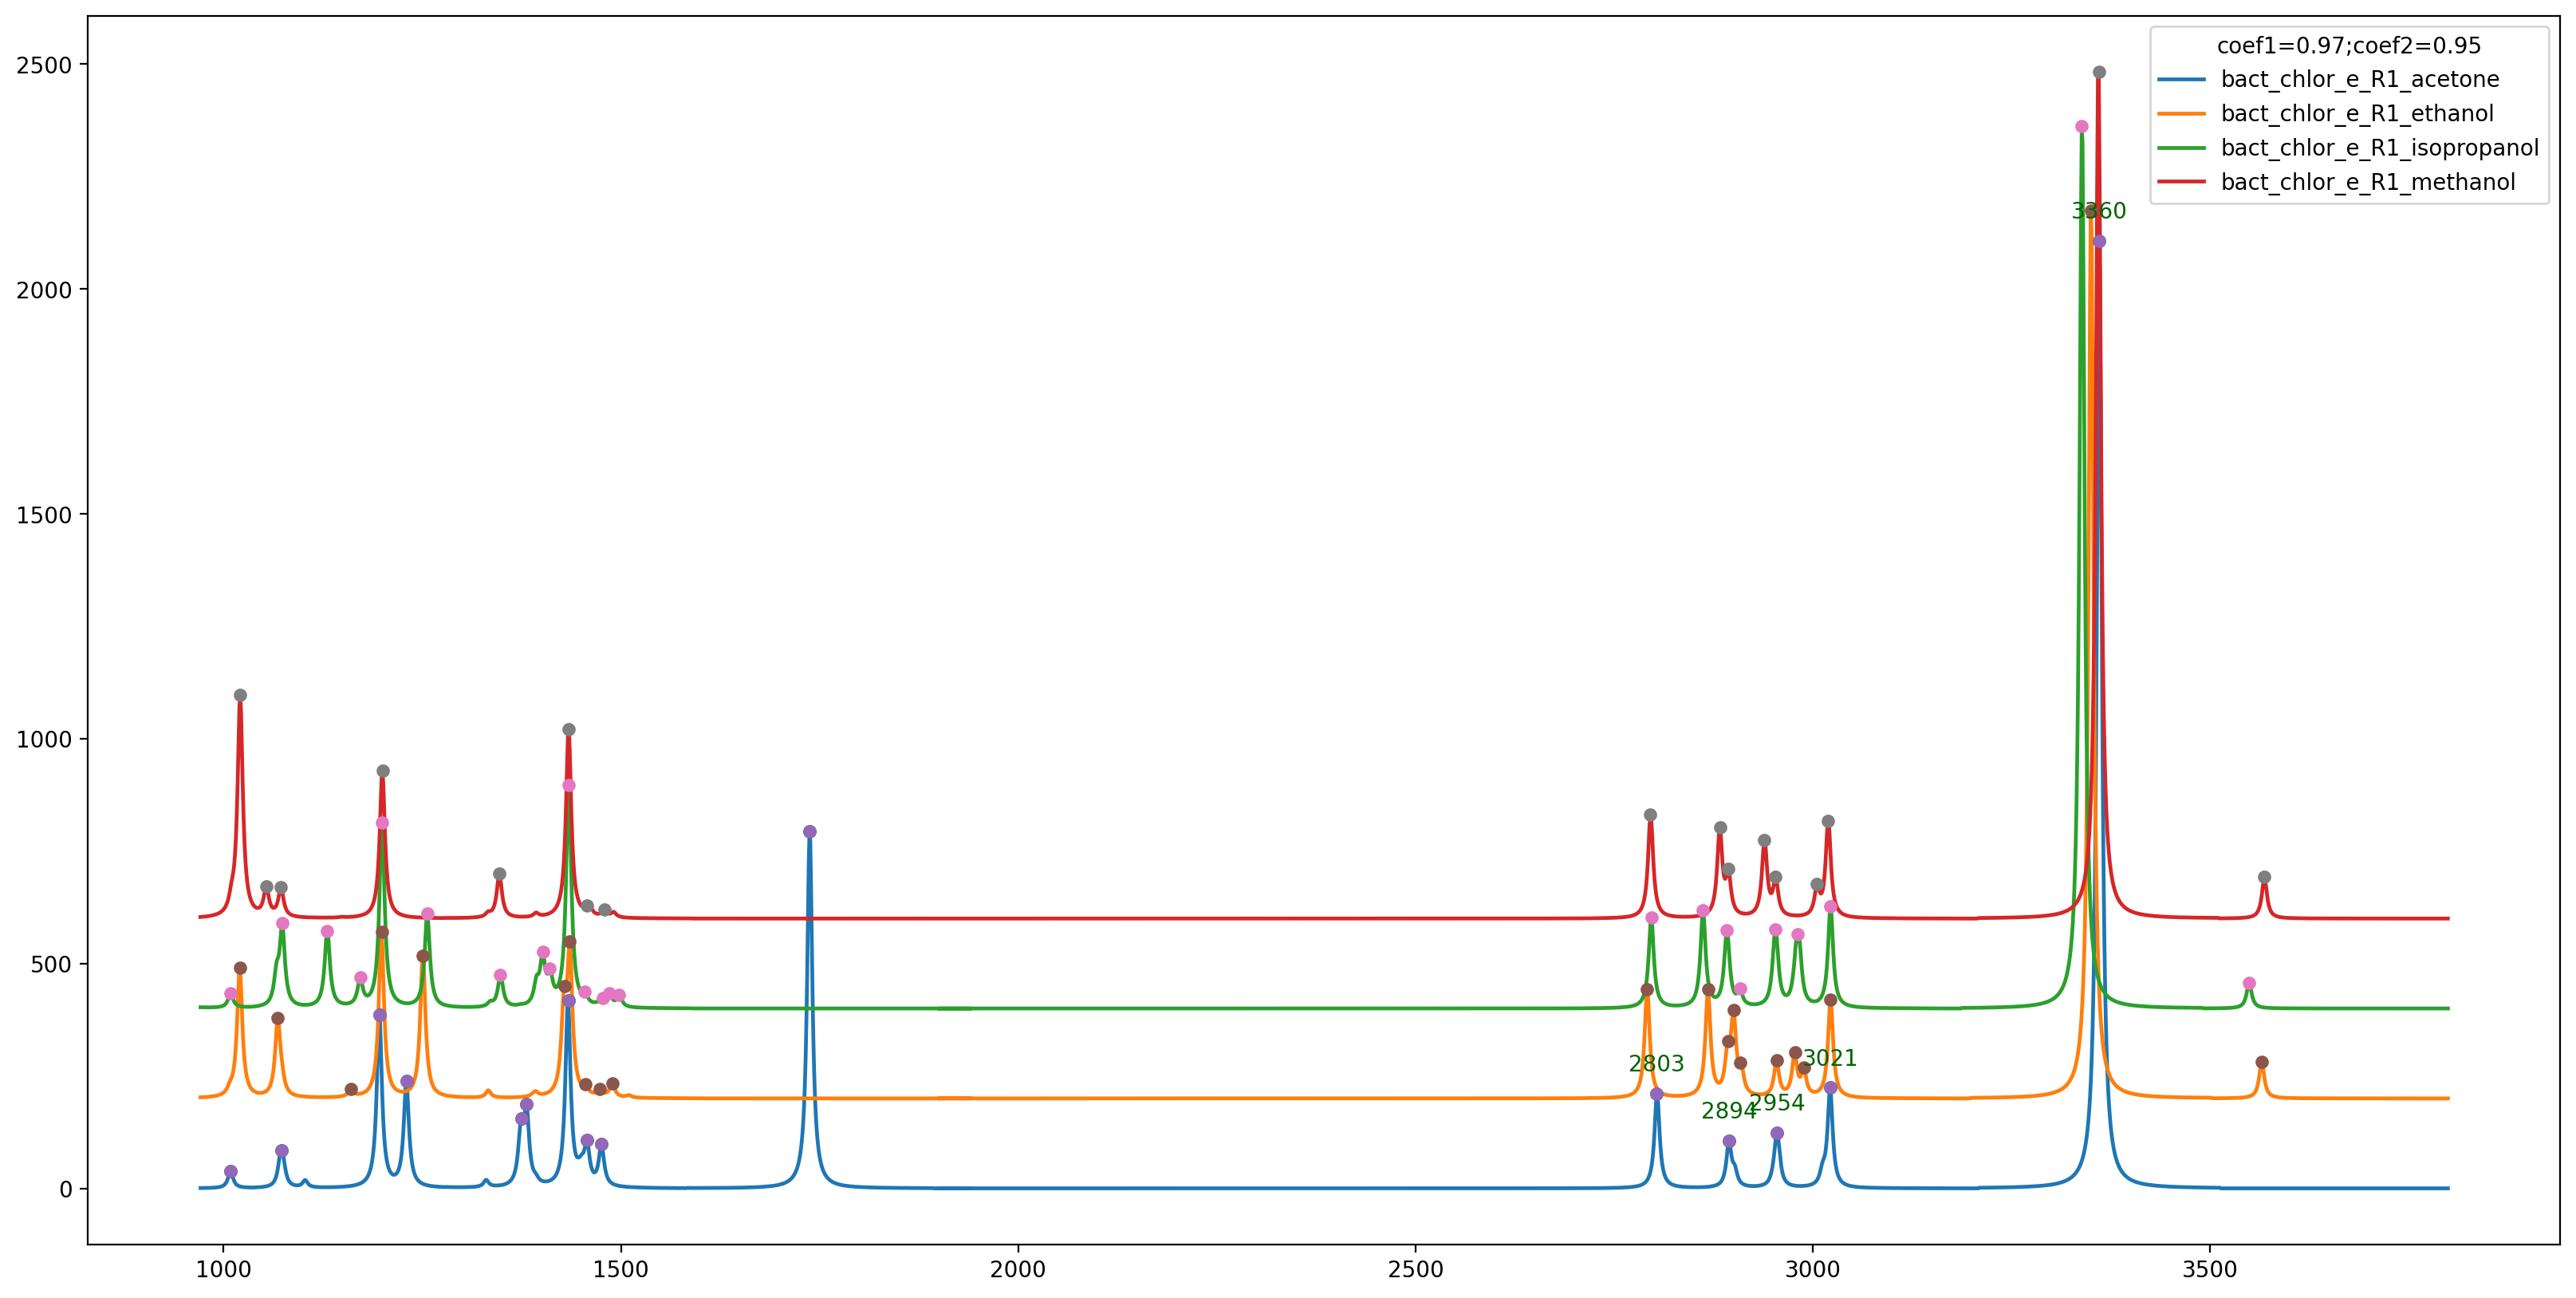

In [8]:
plot_all([bact_chlor_e_R1_acetone, bact_chlor_e_R1_ethanol, bact_chlor_e_R1_isopropanol, bact_chlor_e_R1_methanol],
          ['bact_chlor_e_R1_acetone', 'bact_chlor_e_R1_ethanol', 'bact_chlor_e_R1_isopropanol', 'bact_chlor_e_R1_methanol'],
          coef1=0.97, coef2=0.95,
          y_shift=200)

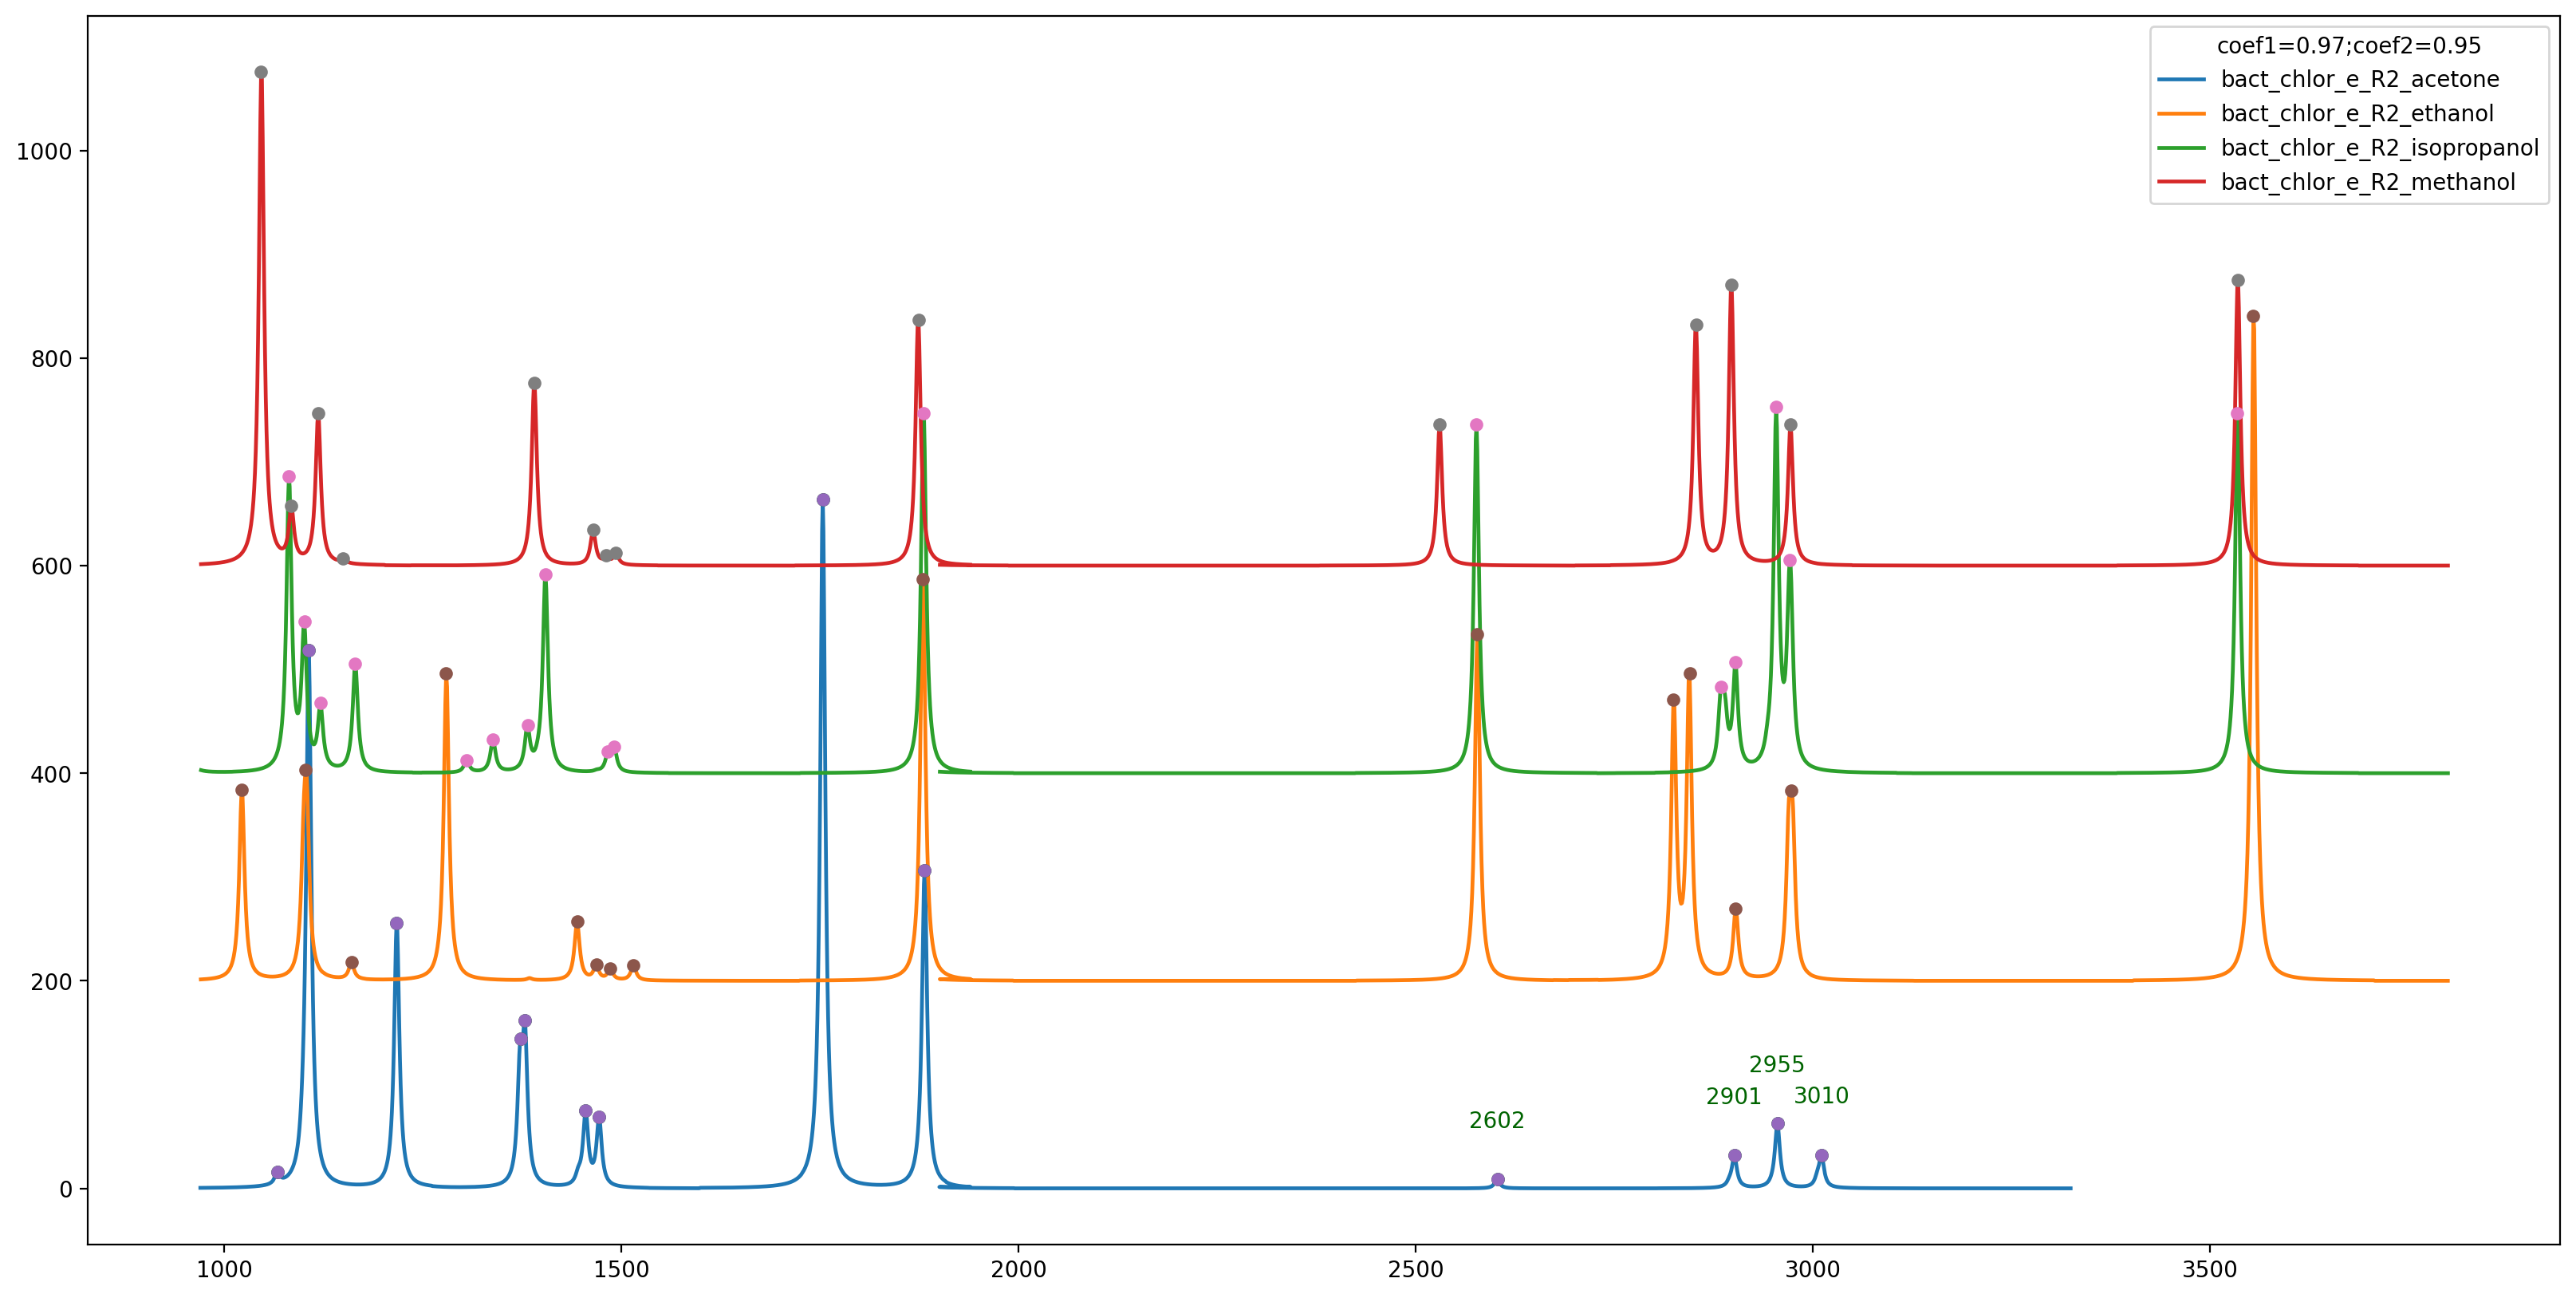

In [9]:
plot_all([bact_chlor_e_R2_acetone, bact_chlor_e_R2_ethanol, bact_chlor_e_R2_isopropanol, bact_chlor_e_R2_methanol],
          ['bact_chlor_e_R2_acetone', 'bact_chlor_e_R2_ethanol', 'bact_chlor_e_R2_isopropanol', 'bact_chlor_e_R2_methanol'],
          coef1=0.97, coef2=0.95,
          y_shift=200)

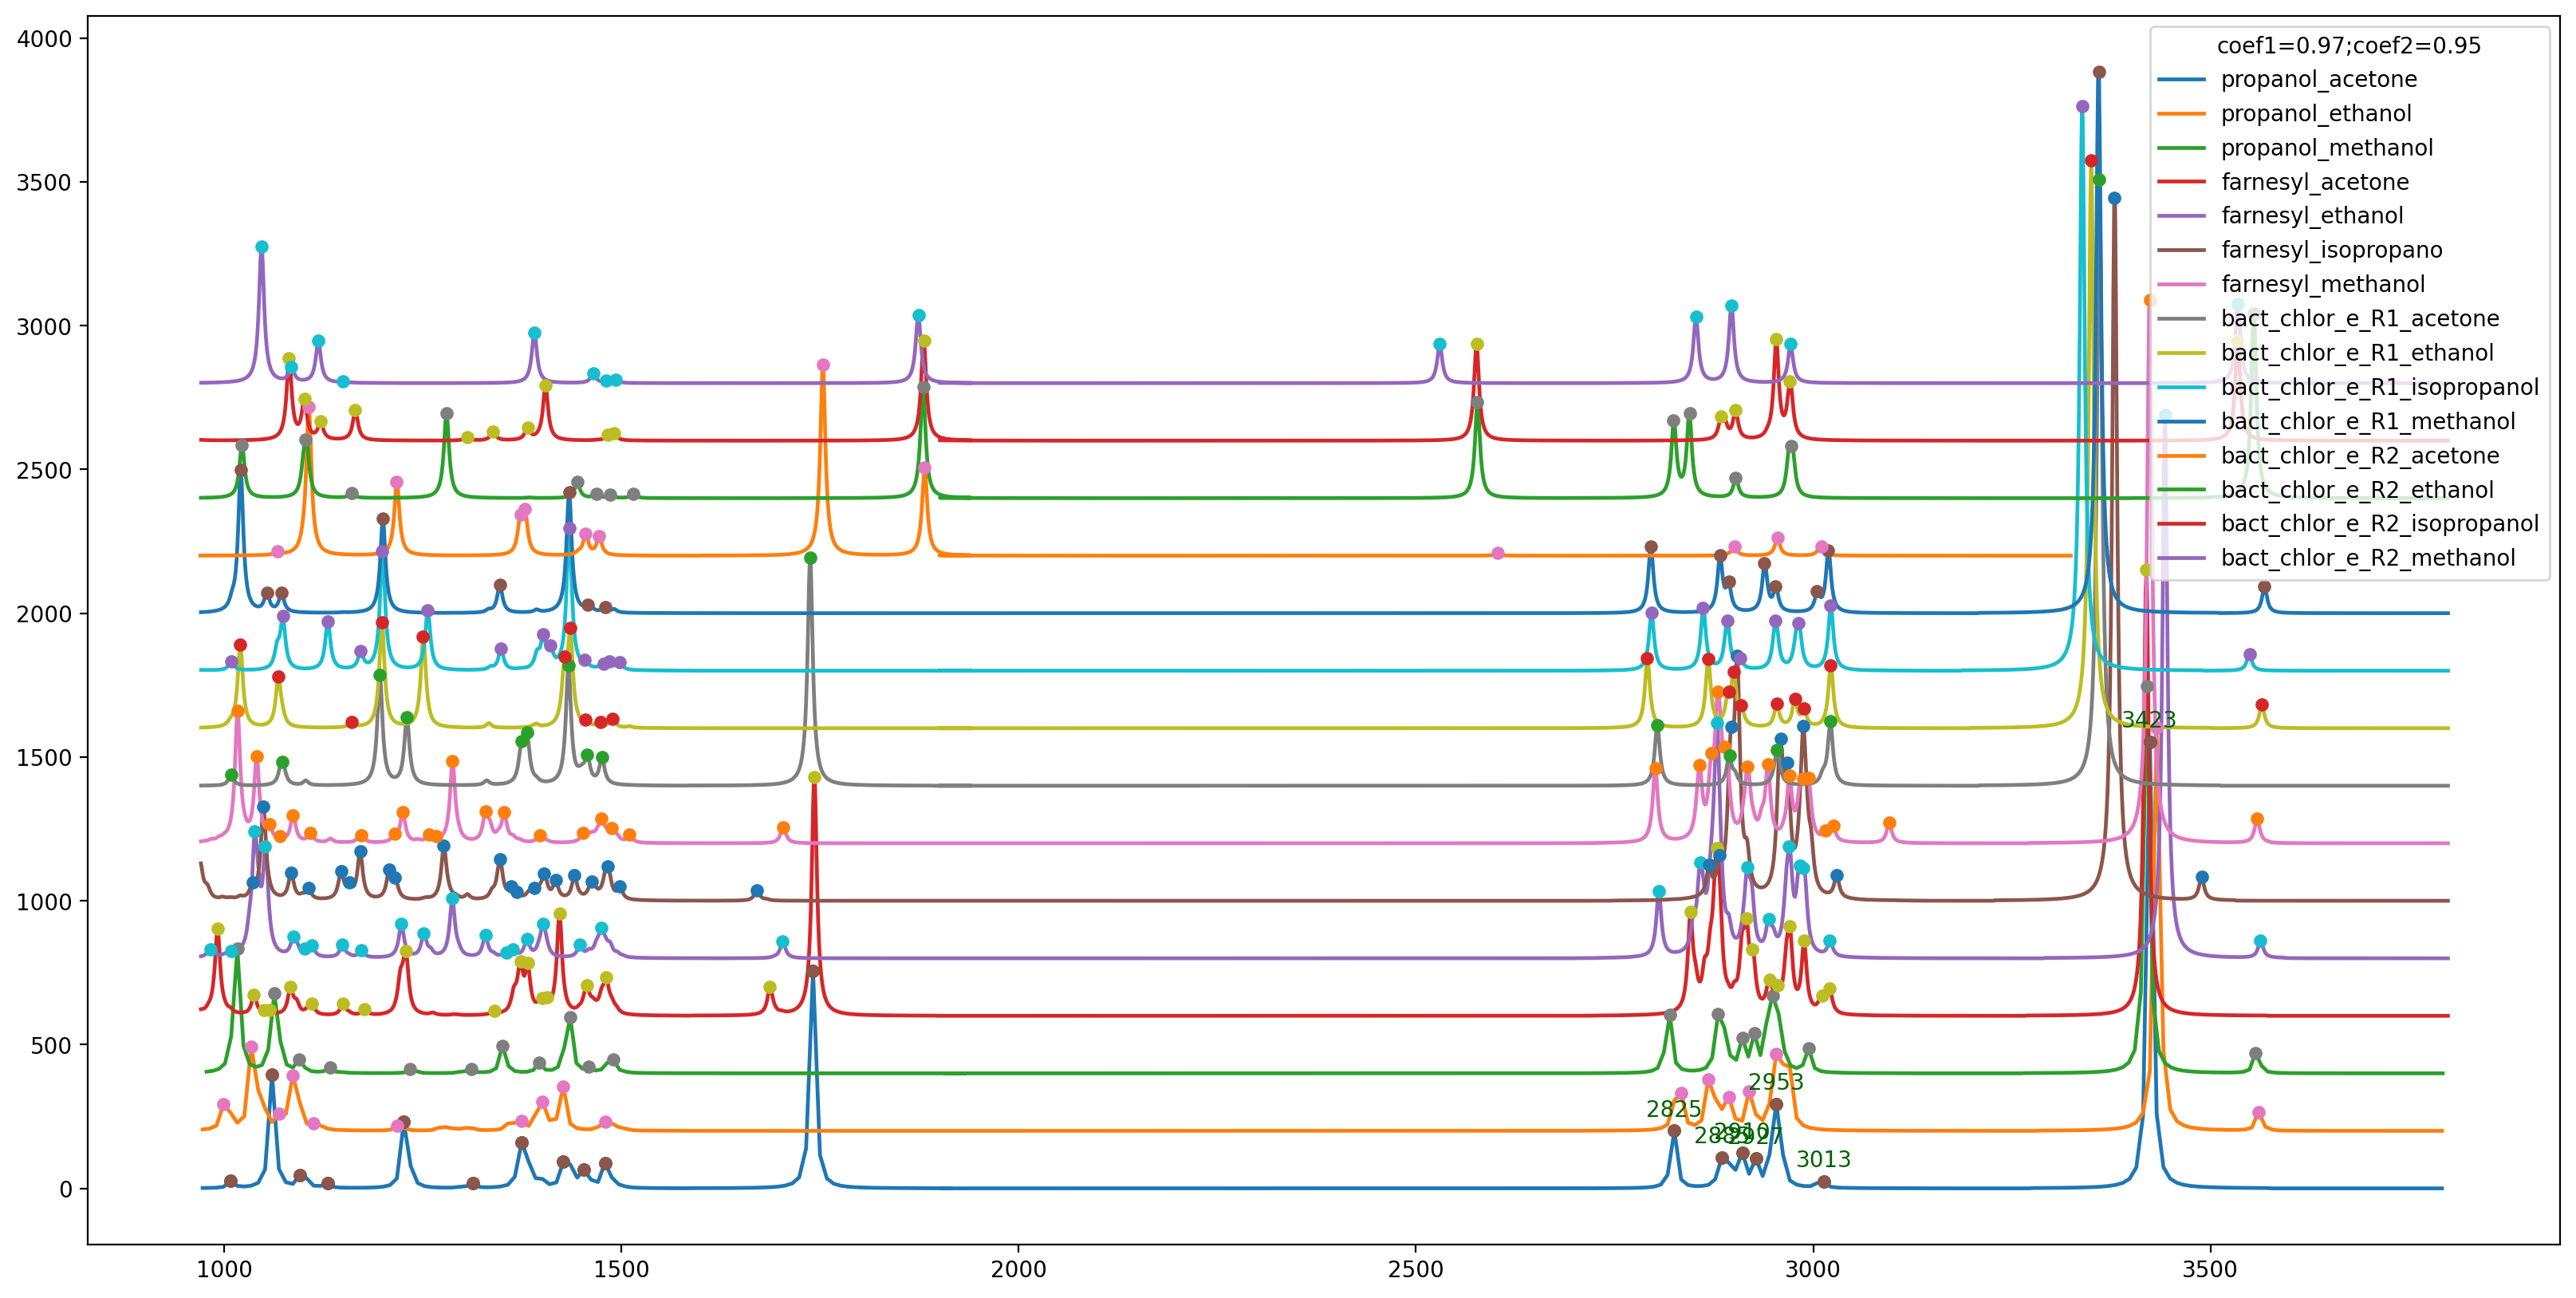

In [10]:
plot_all([propanol_acetone, propanol_ethanol, propanol_methanol,
          farnesyl_acetone, farnesyl_ethanol, farnesyl_isopropanol, farnesyl_methanol,
          bact_chlor_e_R1_acetone, bact_chlor_e_R1_ethanol, bact_chlor_e_R1_isopropanol, bact_chlor_e_R1_methanol,
          bact_chlor_e_R2_acetone, bact_chlor_e_R2_ethanol, bact_chlor_e_R2_isopropanol, bact_chlor_e_R2_methanol],
          ['propanol_acetone', 'propanol_ethanol', 'propanol_methanol',
           'farnesyl_acetone', 'farnesyl_ethanol', 'farnesyl_isopropano', 'farnesyl_methanol',
           'bact_chlor_e_R1_acetone', 'bact_chlor_e_R1_ethanol', 'bact_chlor_e_R1_isopropanol', 'bact_chlor_e_R1_methanol',
           'bact_chlor_e_R2_acetone', 'bact_chlor_e_R2_ethanol', 'bact_chlor_e_R2_isopropanol', 'bact_chlor_e_R2_methanol'],
          coef1=0.97, coef2=0.95,
          y_shift=200)

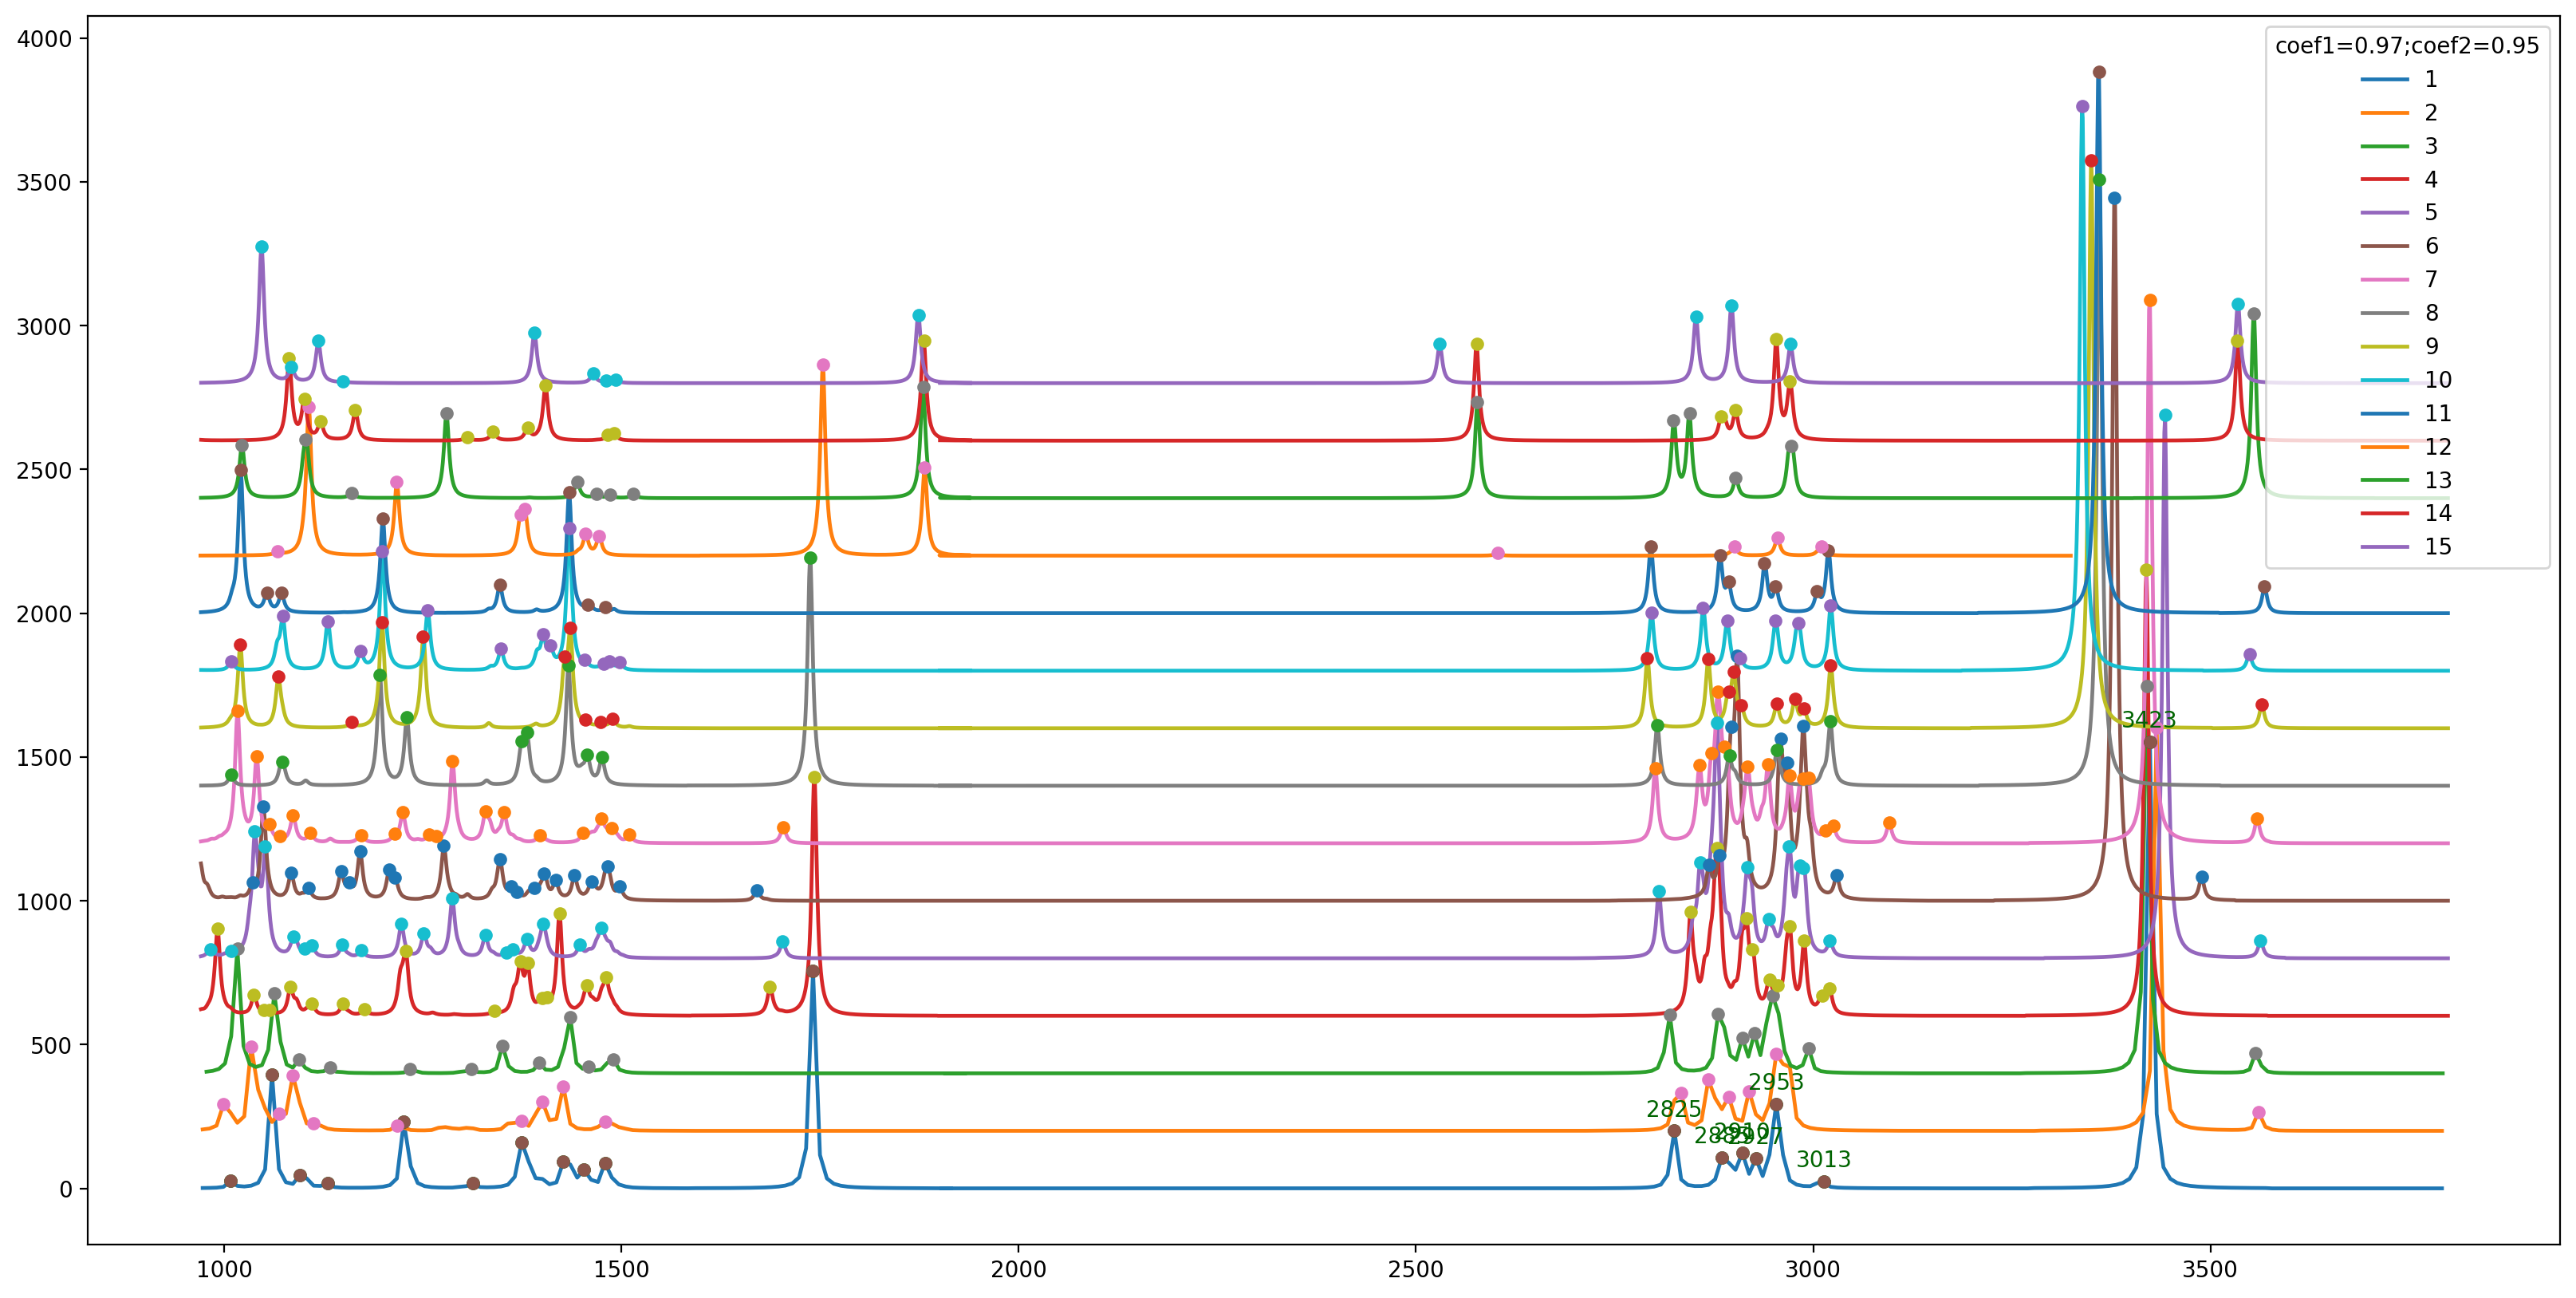

In [11]:
plot_all([propanol_acetone, propanol_ethanol, propanol_methanol,
          farnesyl_acetone, farnesyl_ethanol, farnesyl_isopropanol, farnesyl_methanol,
          bact_chlor_e_R1_acetone, bact_chlor_e_R1_ethanol, bact_chlor_e_R1_isopropanol, bact_chlor_e_R1_methanol,
          bact_chlor_e_R2_acetone, bact_chlor_e_R2_ethanol, bact_chlor_e_R2_isopropanol, bact_chlor_e_R2_methanol],
          ['1', '2', '3',
           '4', '5', '6',
           '7', '8', '9', '10',
           '11', '12', '13', '14', '15'],
          coef1=0.97, coef2=0.95,
          y_shift=200)

# Без смещения

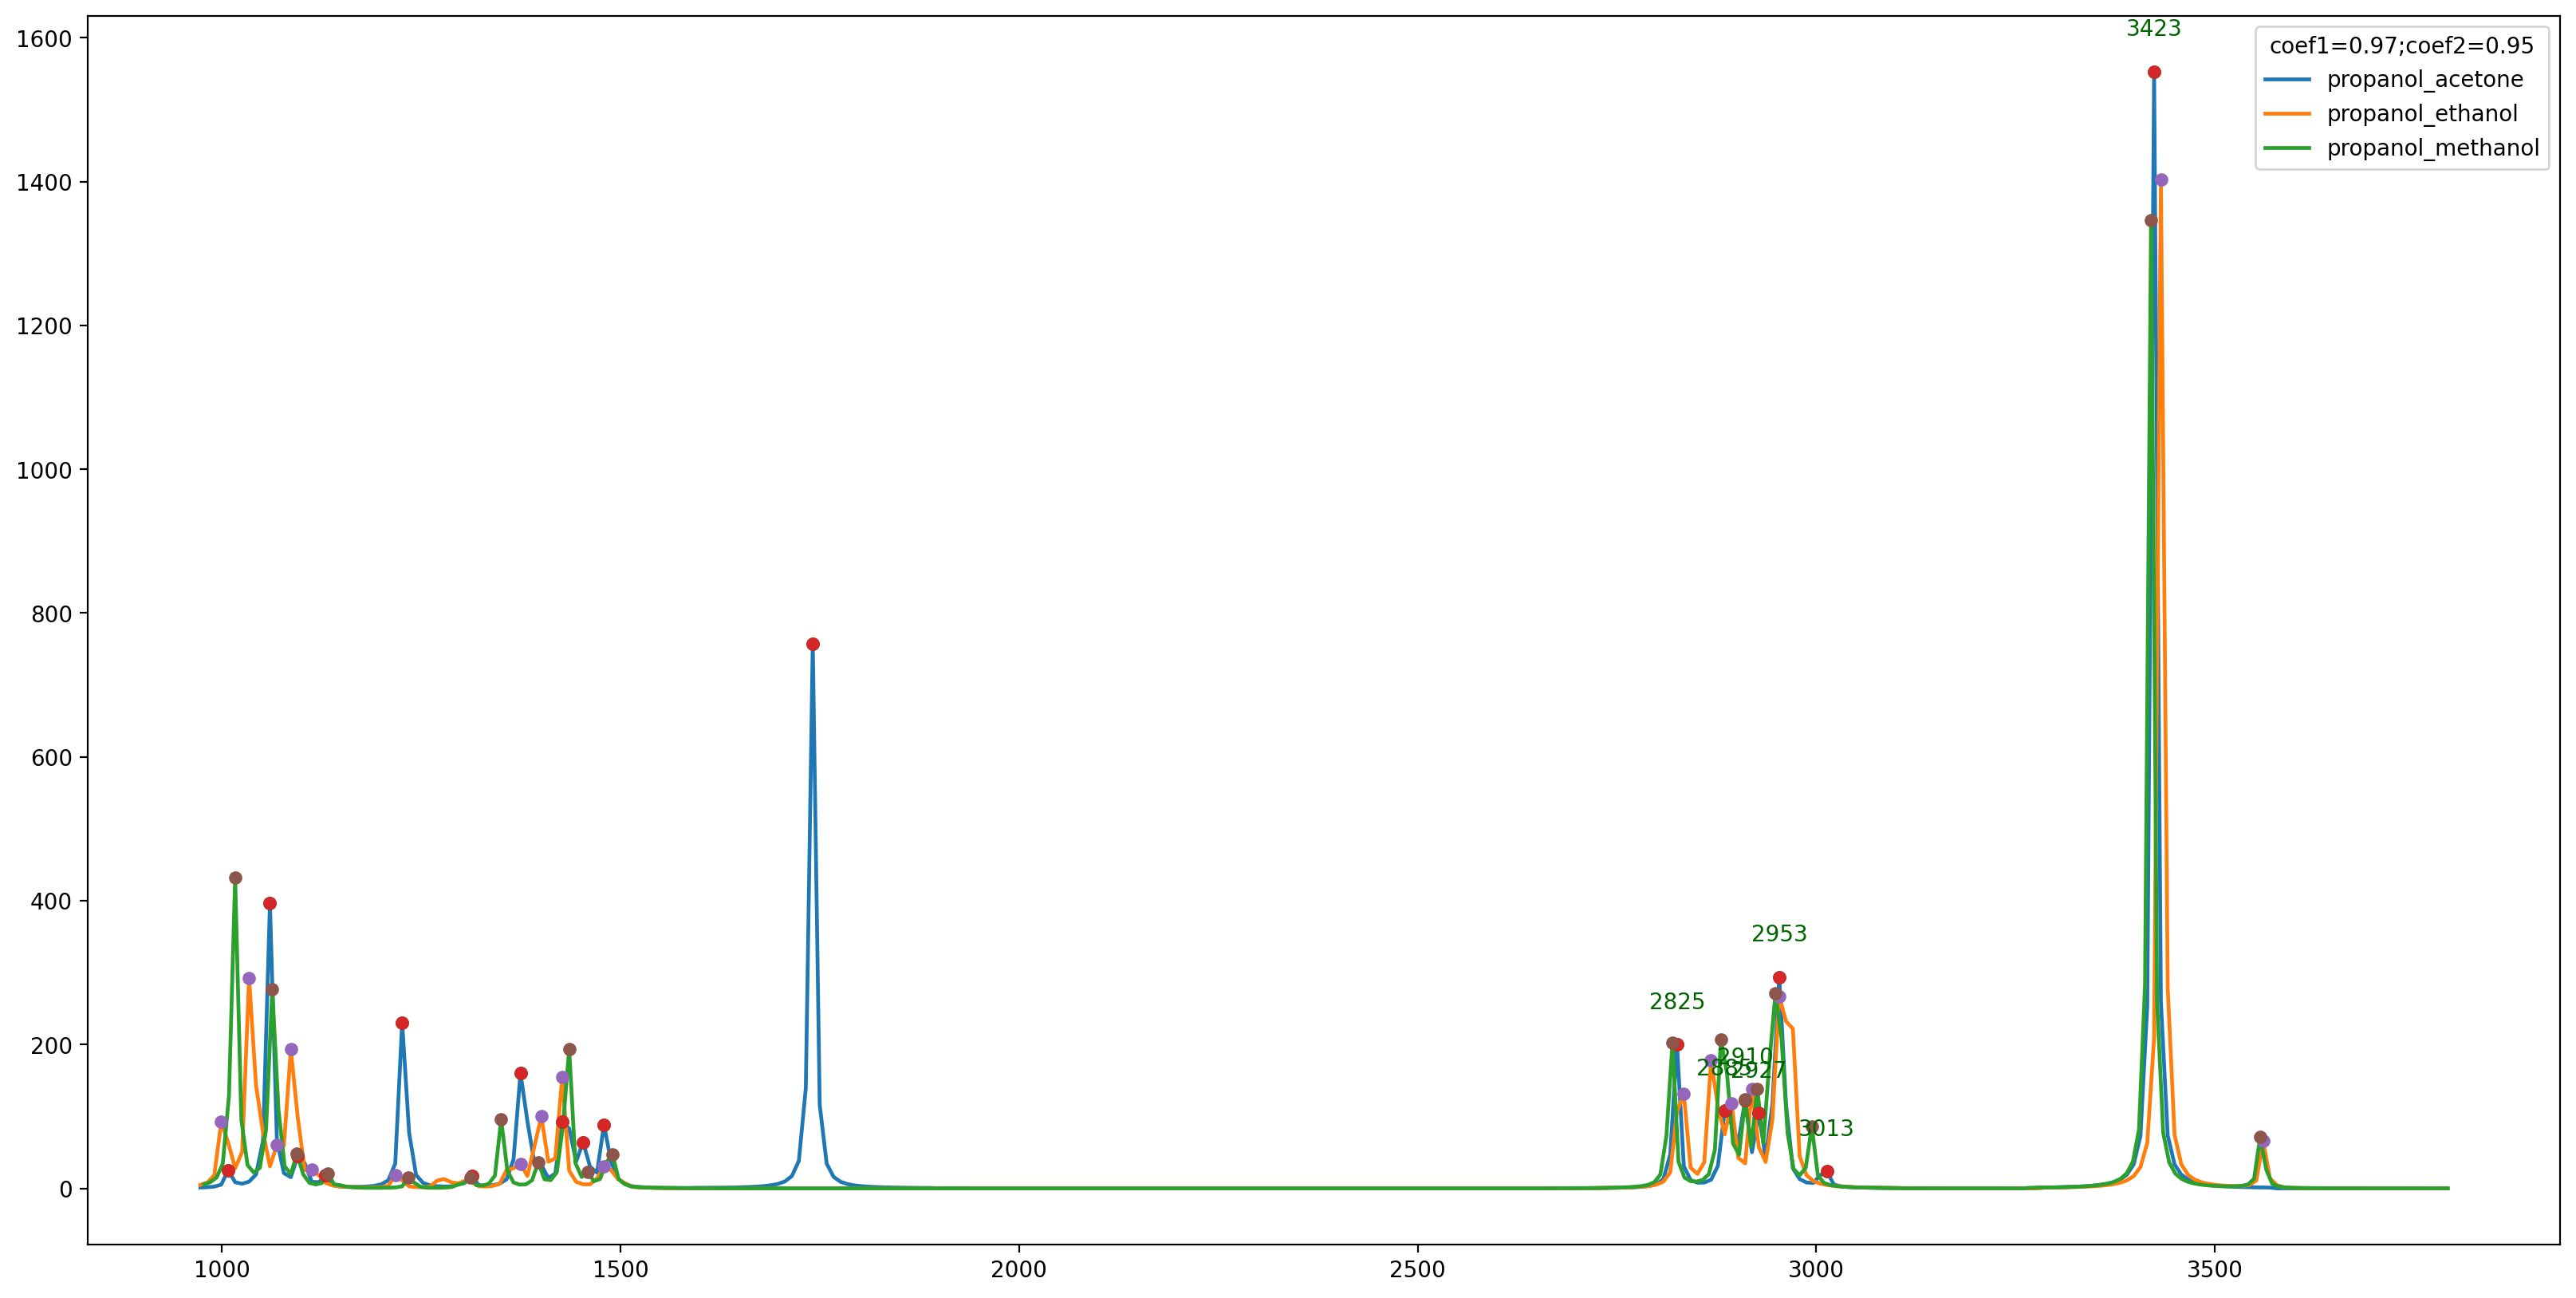

In [12]:
plot_all([propanol_acetone, propanol_ethanol, propanol_methanol],
          ['propanol_acetone', 'propanol_ethanol', 'propanol_methanol'],
          coef1=0.97, coef2=0.95)

In [13]:
plot_all([farnesyl_acetone, farnesyl_ethanol, farnesyl_isopropanol, farnesyl_methanol],
          ['farnesyl_acetone', 'farnesyl_ethanol', 'farnesyl_isopropano', 'farnesyl_methanol'],
          coef1=0.97, coef2=0.95)

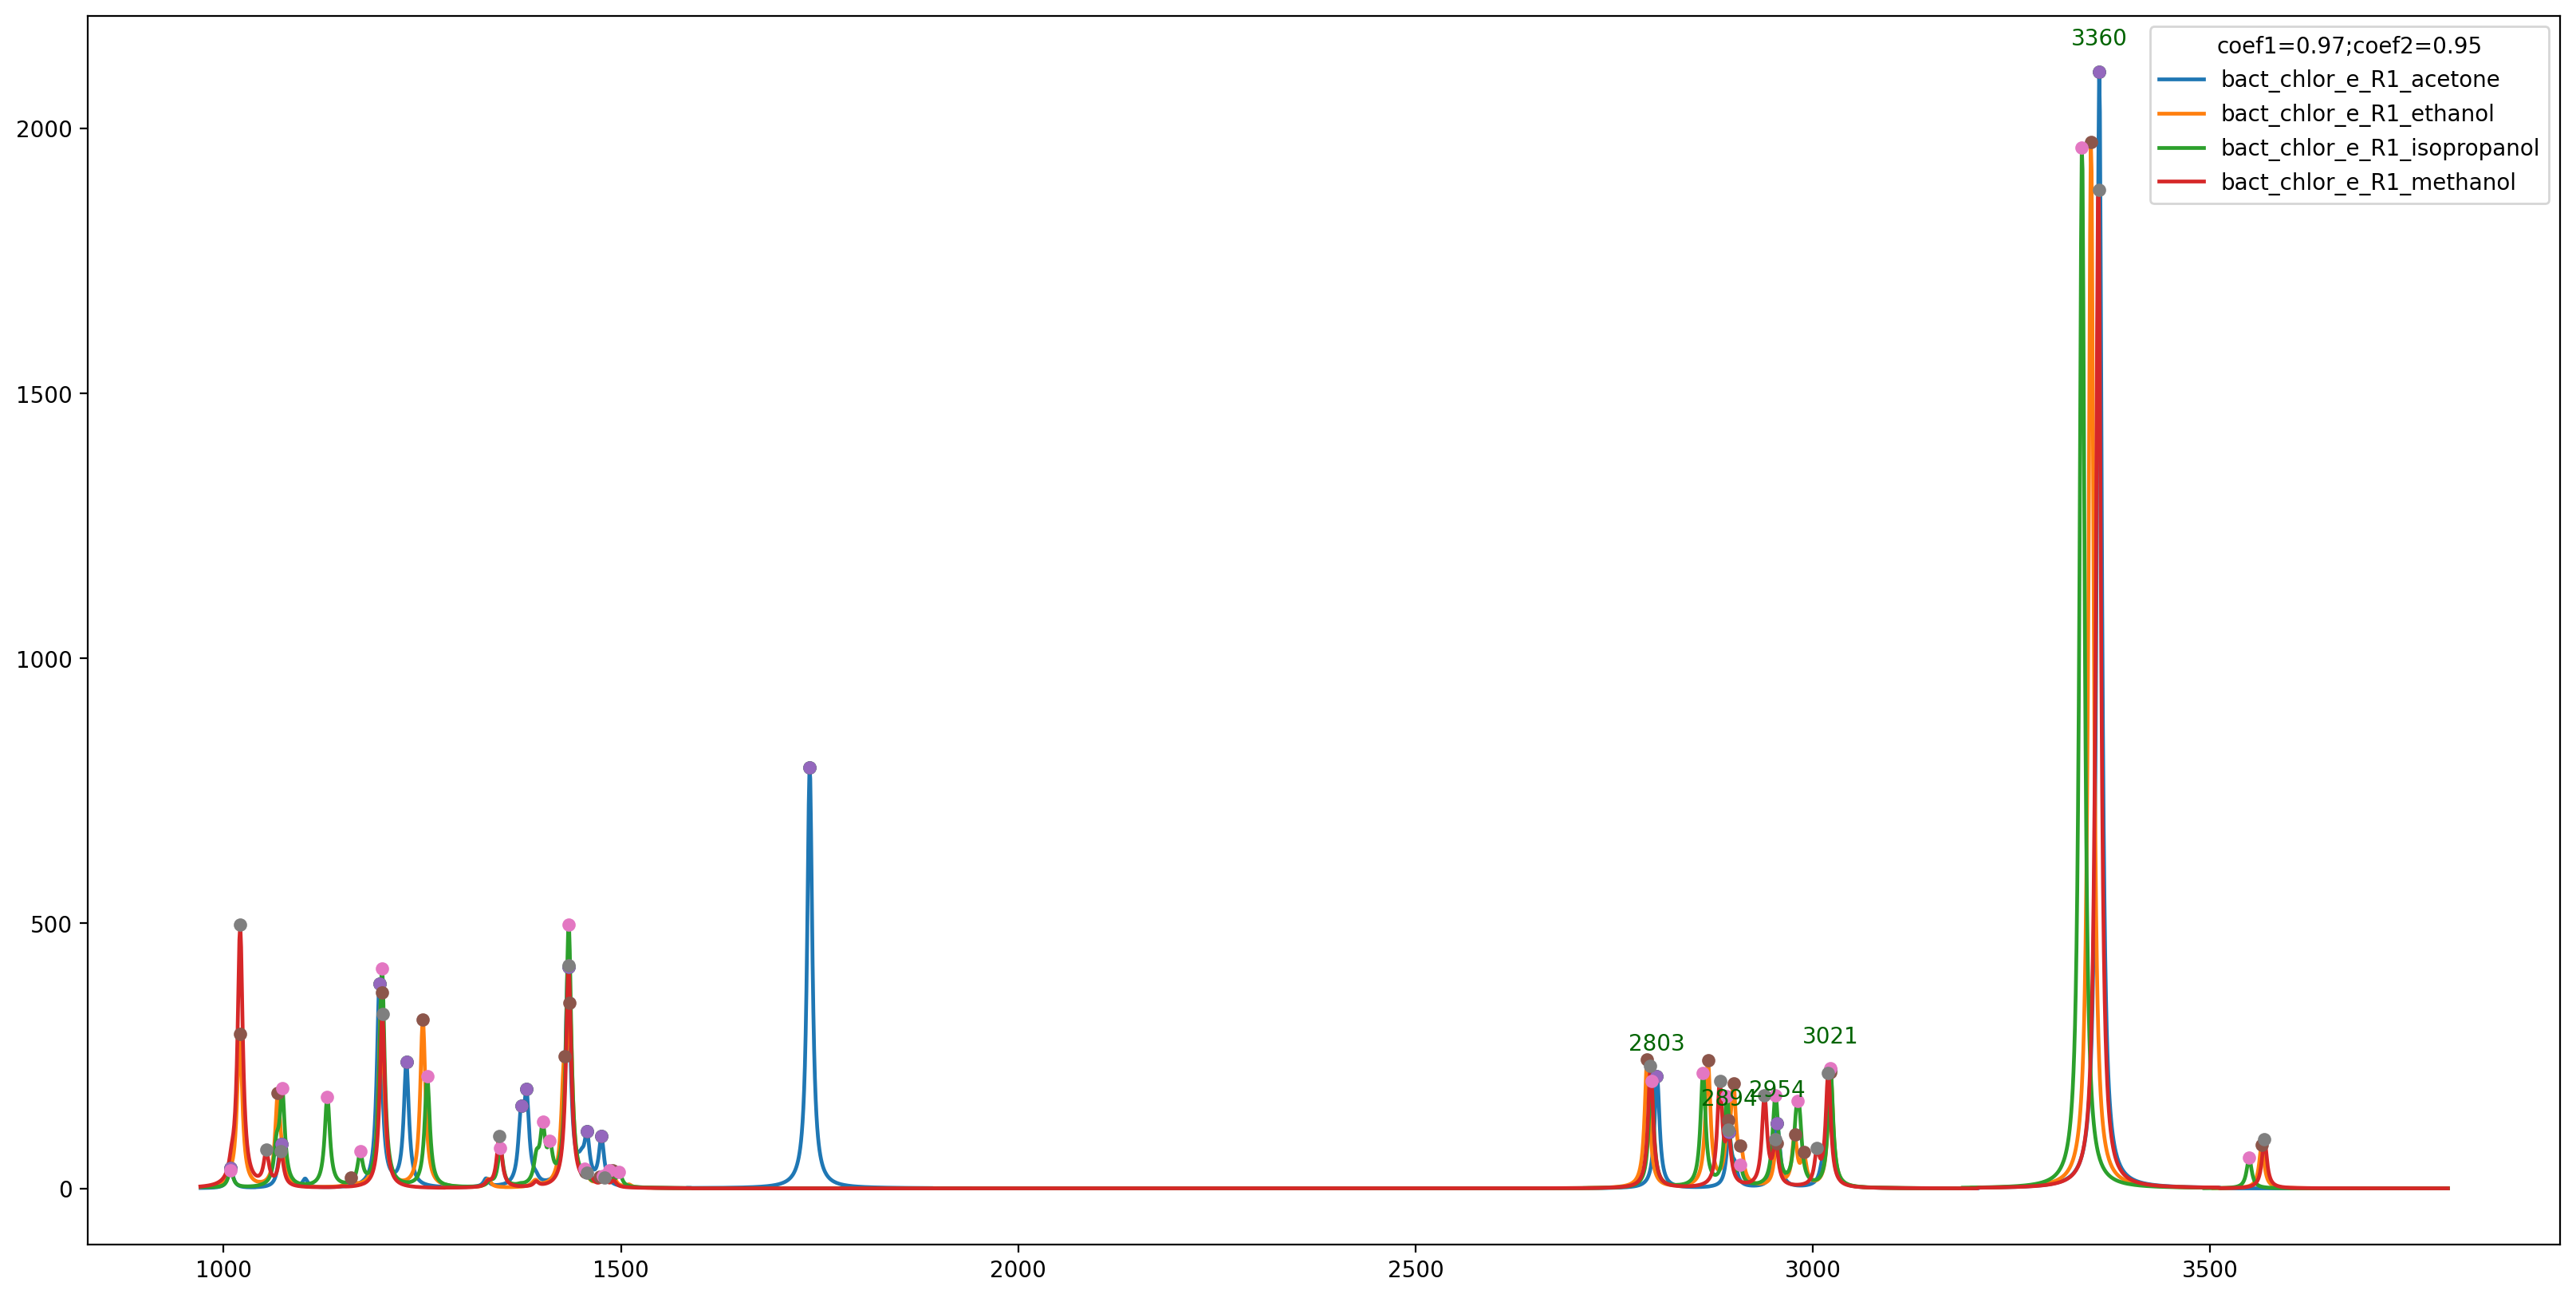

In [14]:
plot_all([bact_chlor_e_R1_acetone, bact_chlor_e_R1_ethanol, bact_chlor_e_R1_isopropanol, bact_chlor_e_R1_methanol],
          ['bact_chlor_e_R1_acetone', 'bact_chlor_e_R1_ethanol', 'bact_chlor_e_R1_isopropanol', 'bact_chlor_e_R1_methanol'],
          coef1=0.97, coef2=0.95)

In [15]:
plot_all([bact_chlor_e_R2_acetone, bact_chlor_e_R2_ethanol, bact_chlor_e_R2_isopropanol, bact_chlor_e_R2_methanol],
          ['bact_chlor_e_R2_acetone', 'bact_chlor_e_R2_ethanol', 'bact_chlor_e_R2_isopropanol', 'bact_chlor_e_R2_methanol'],
          coef1=0.97, coef2=0.95)

# По одному графику

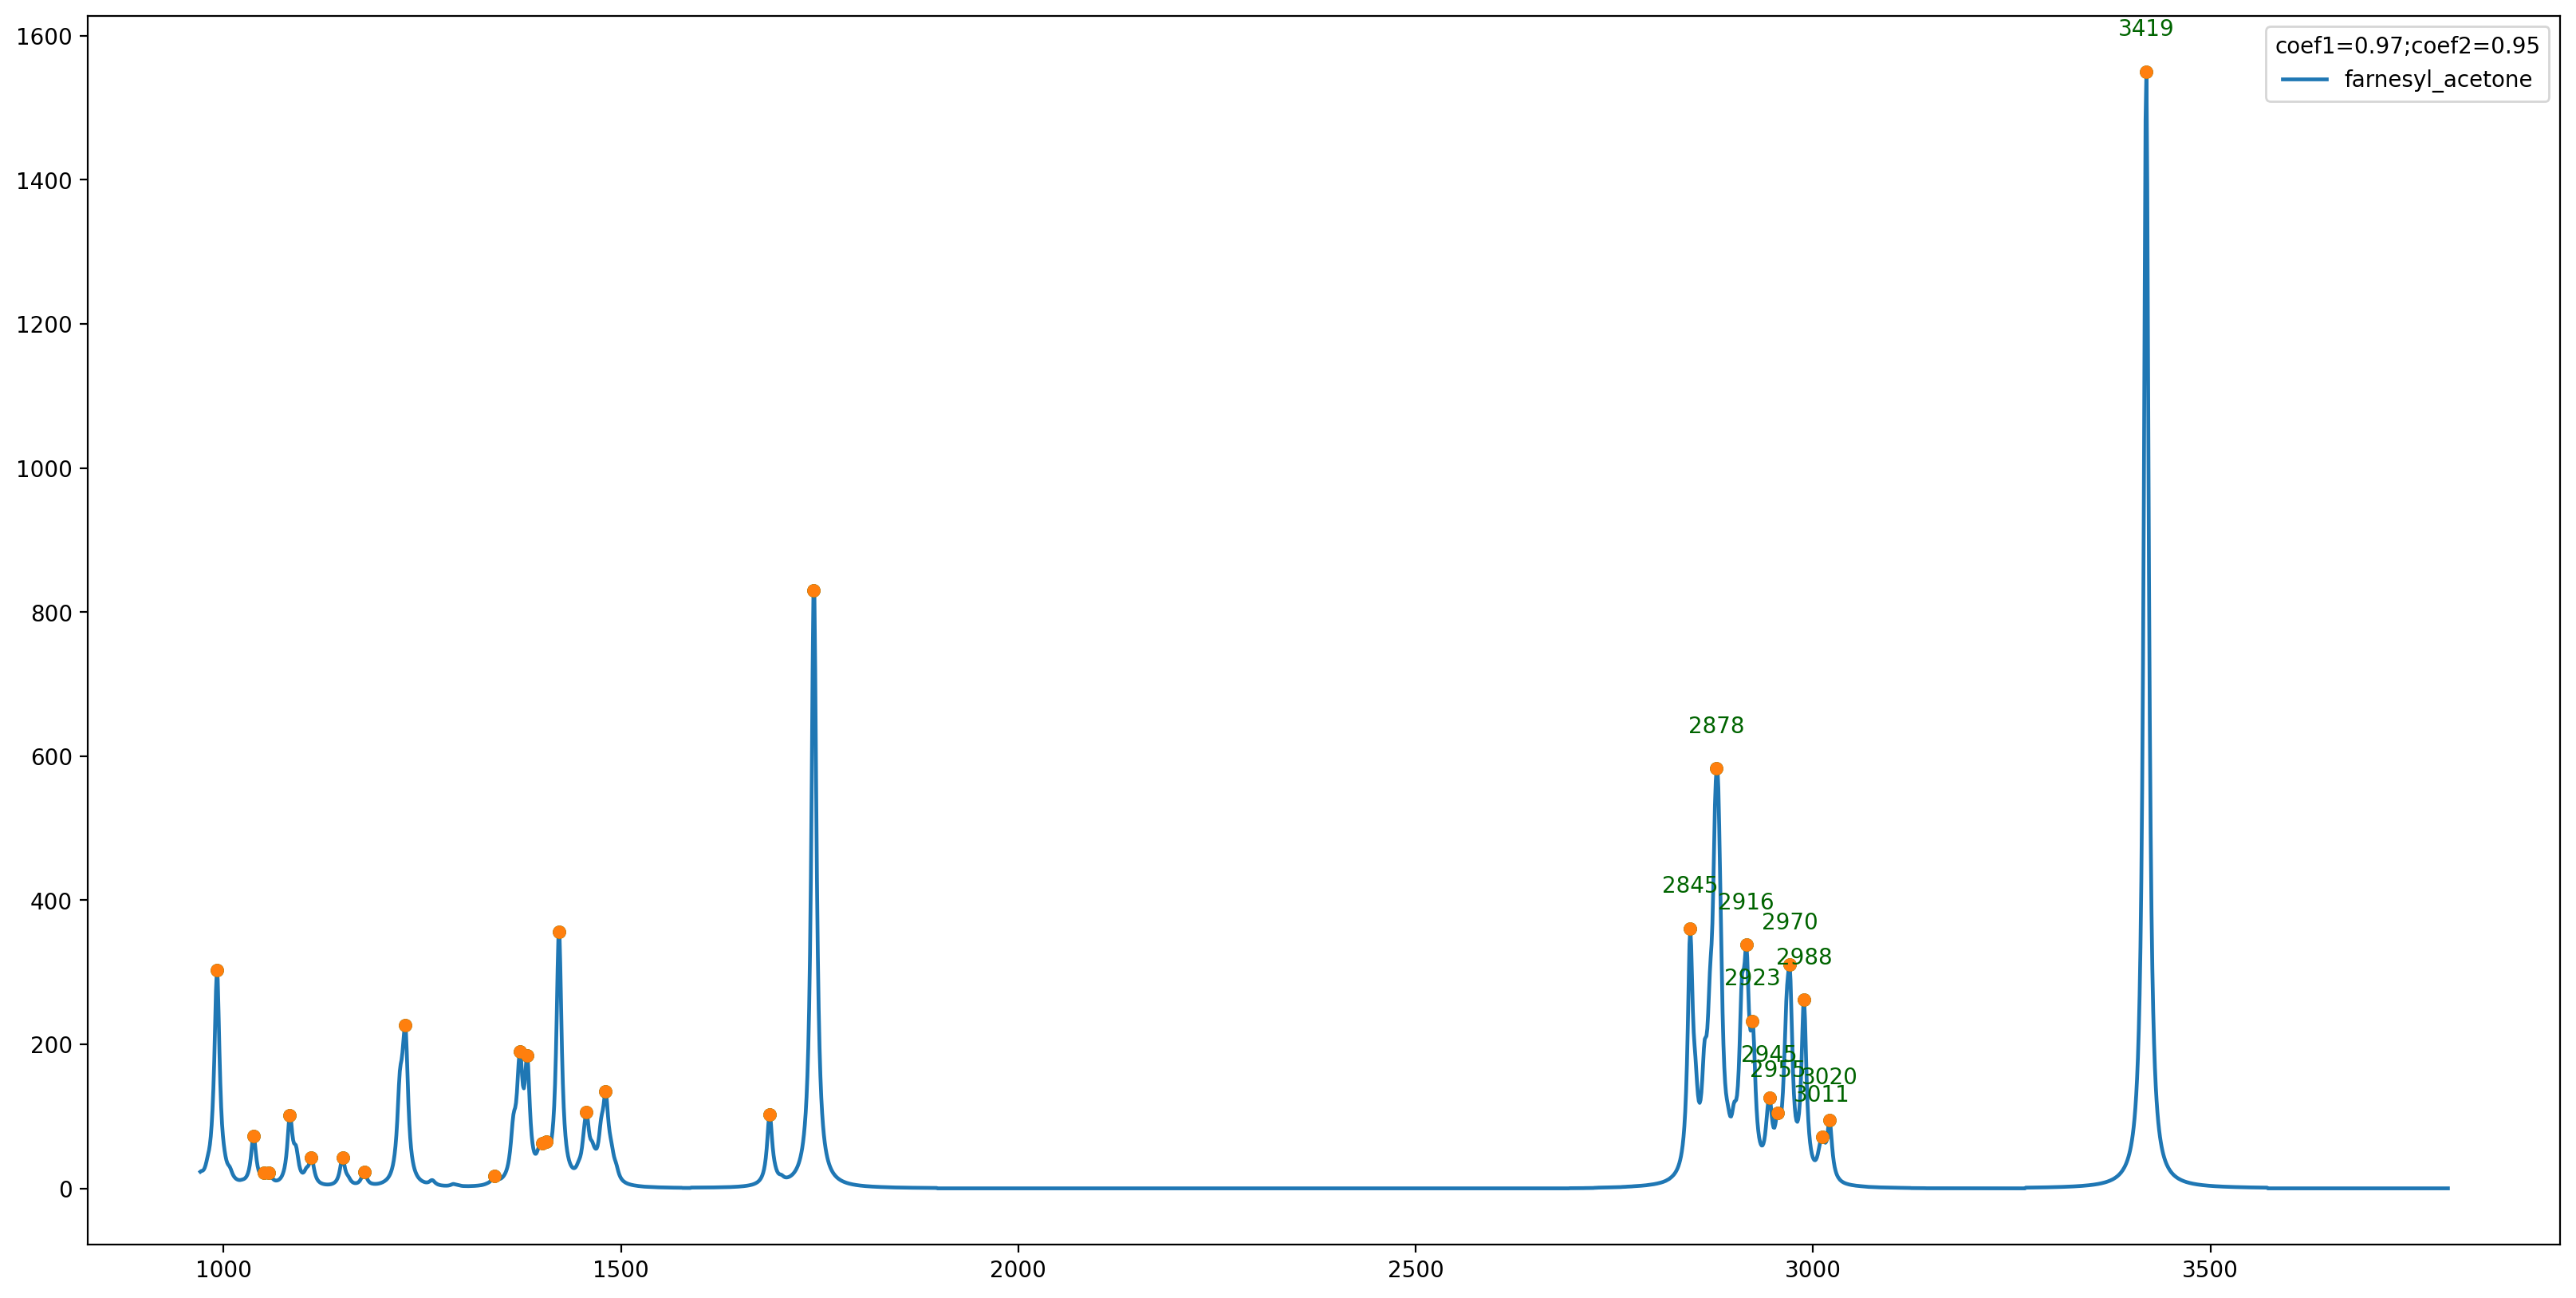

In [16]:
plot_all([farnesyl_acetone], ['farnesyl_acetone'], coef1=0.97, coef2=0.95)

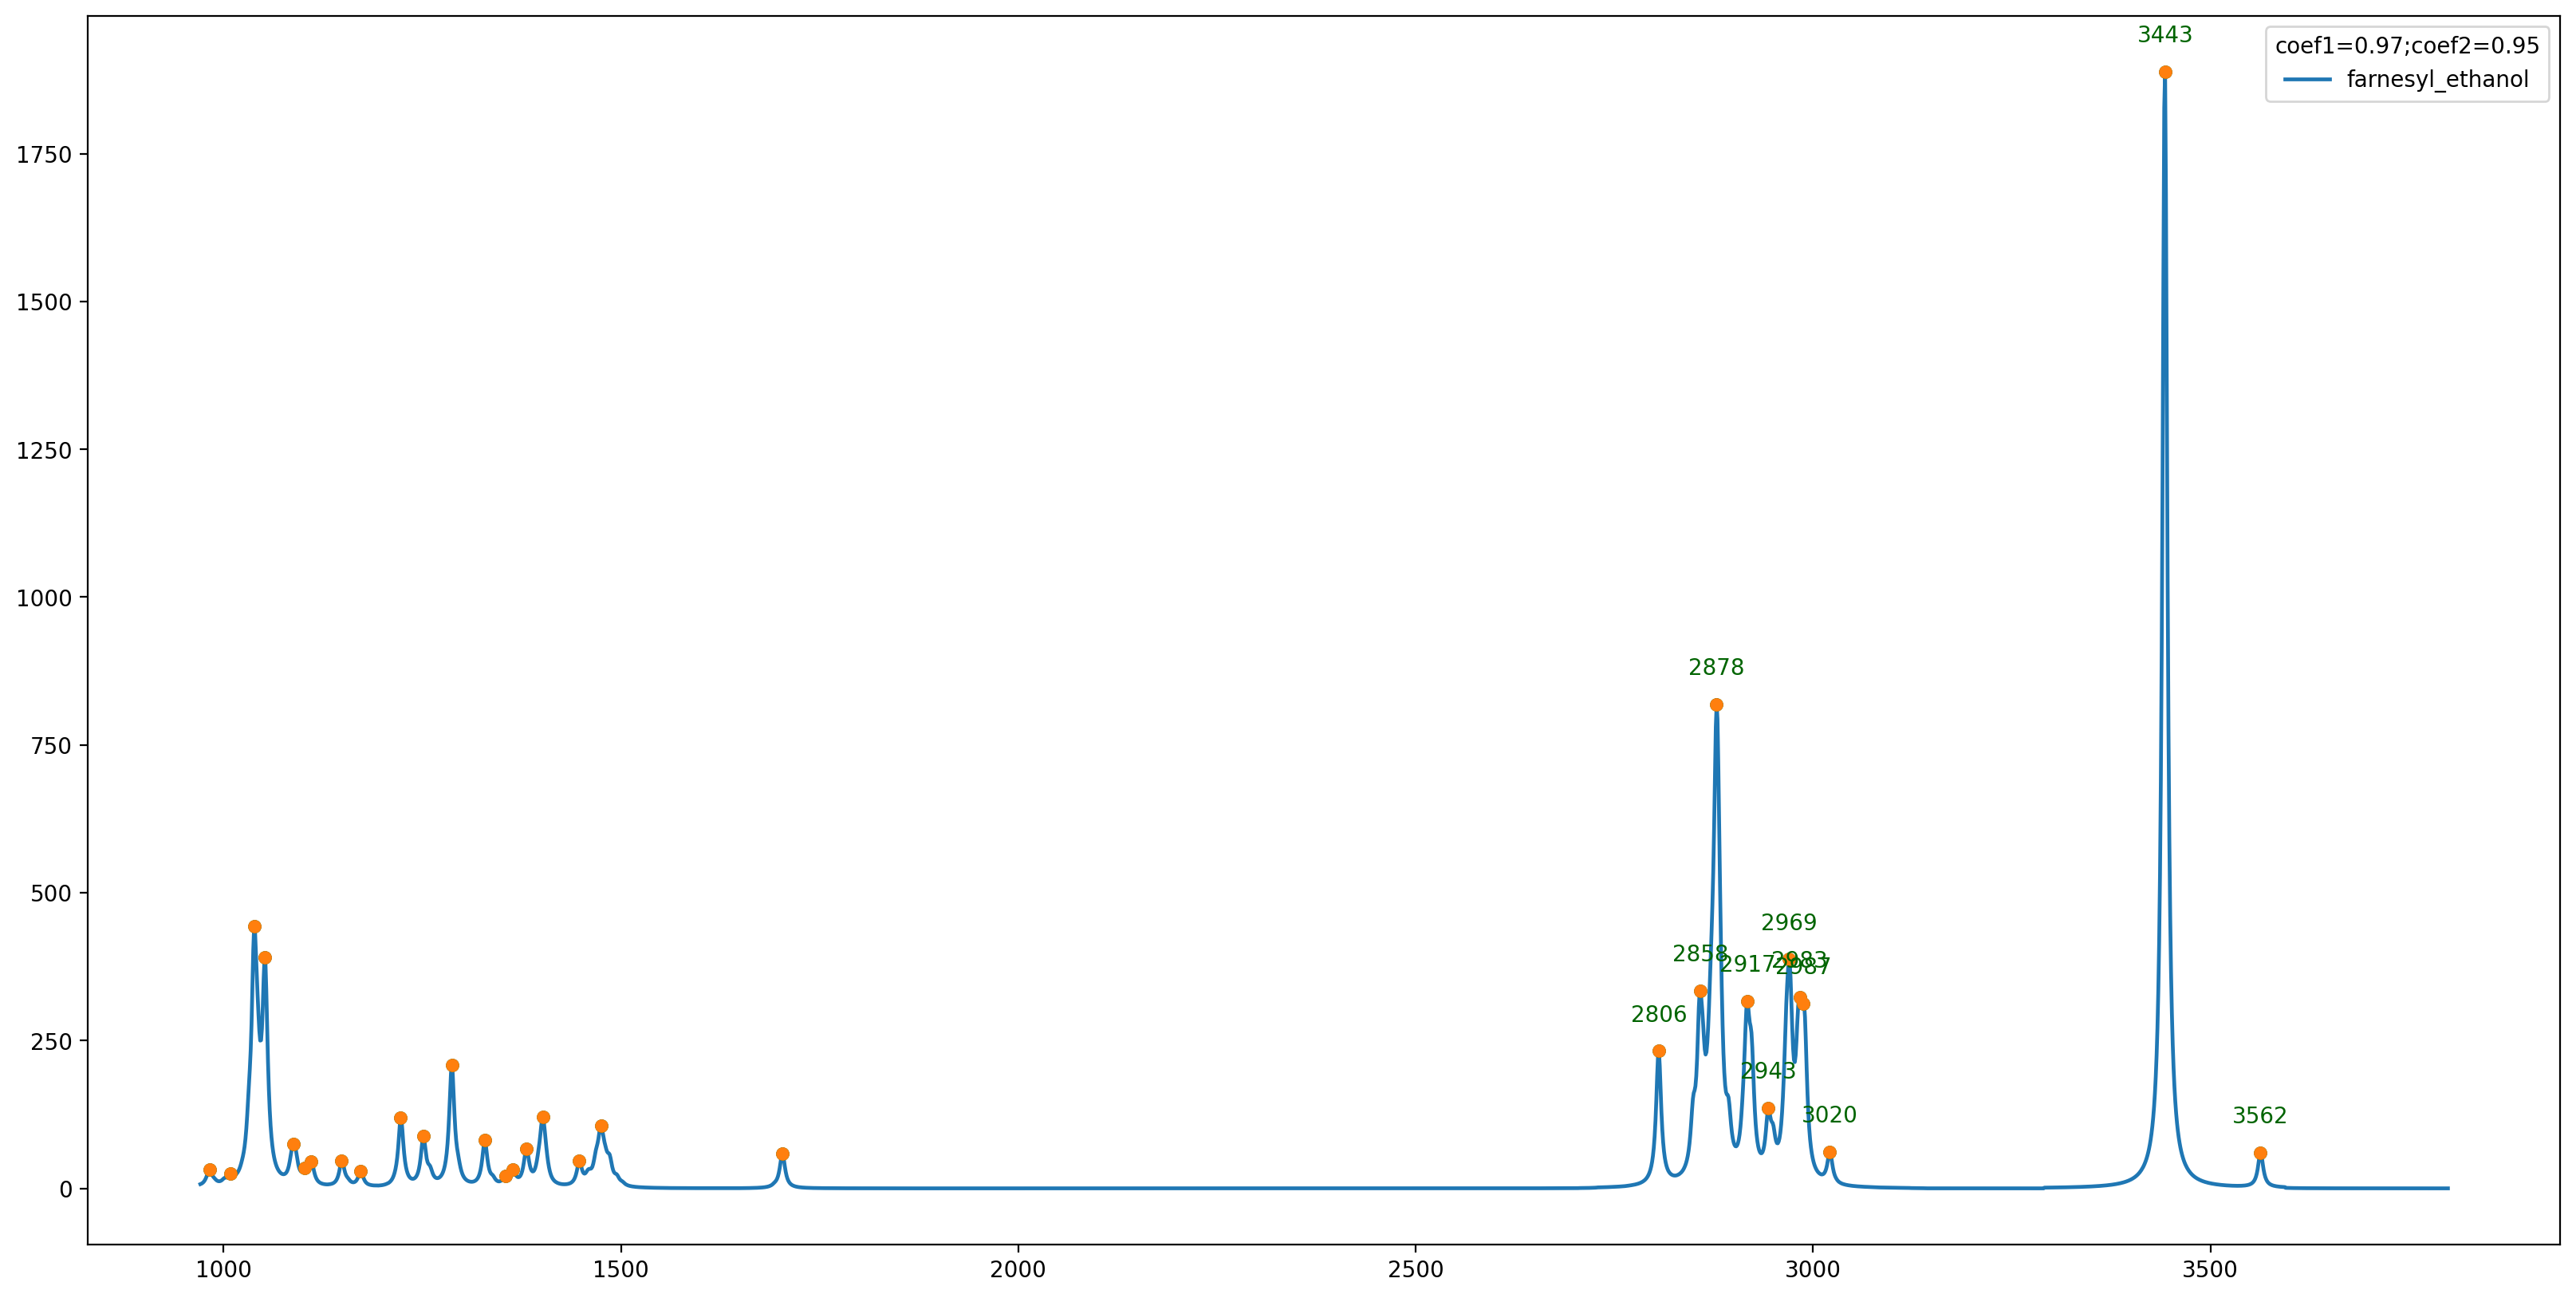

In [17]:
plot_all([farnesyl_ethanol], ['farnesyl_ethanol'], coef1=0.97, coef2=0.95)

In [18]:
plot_all([farnesyl_isopropanol], ['farnesyl_isopropanol'], coef1=0.97, coef2=0.95)

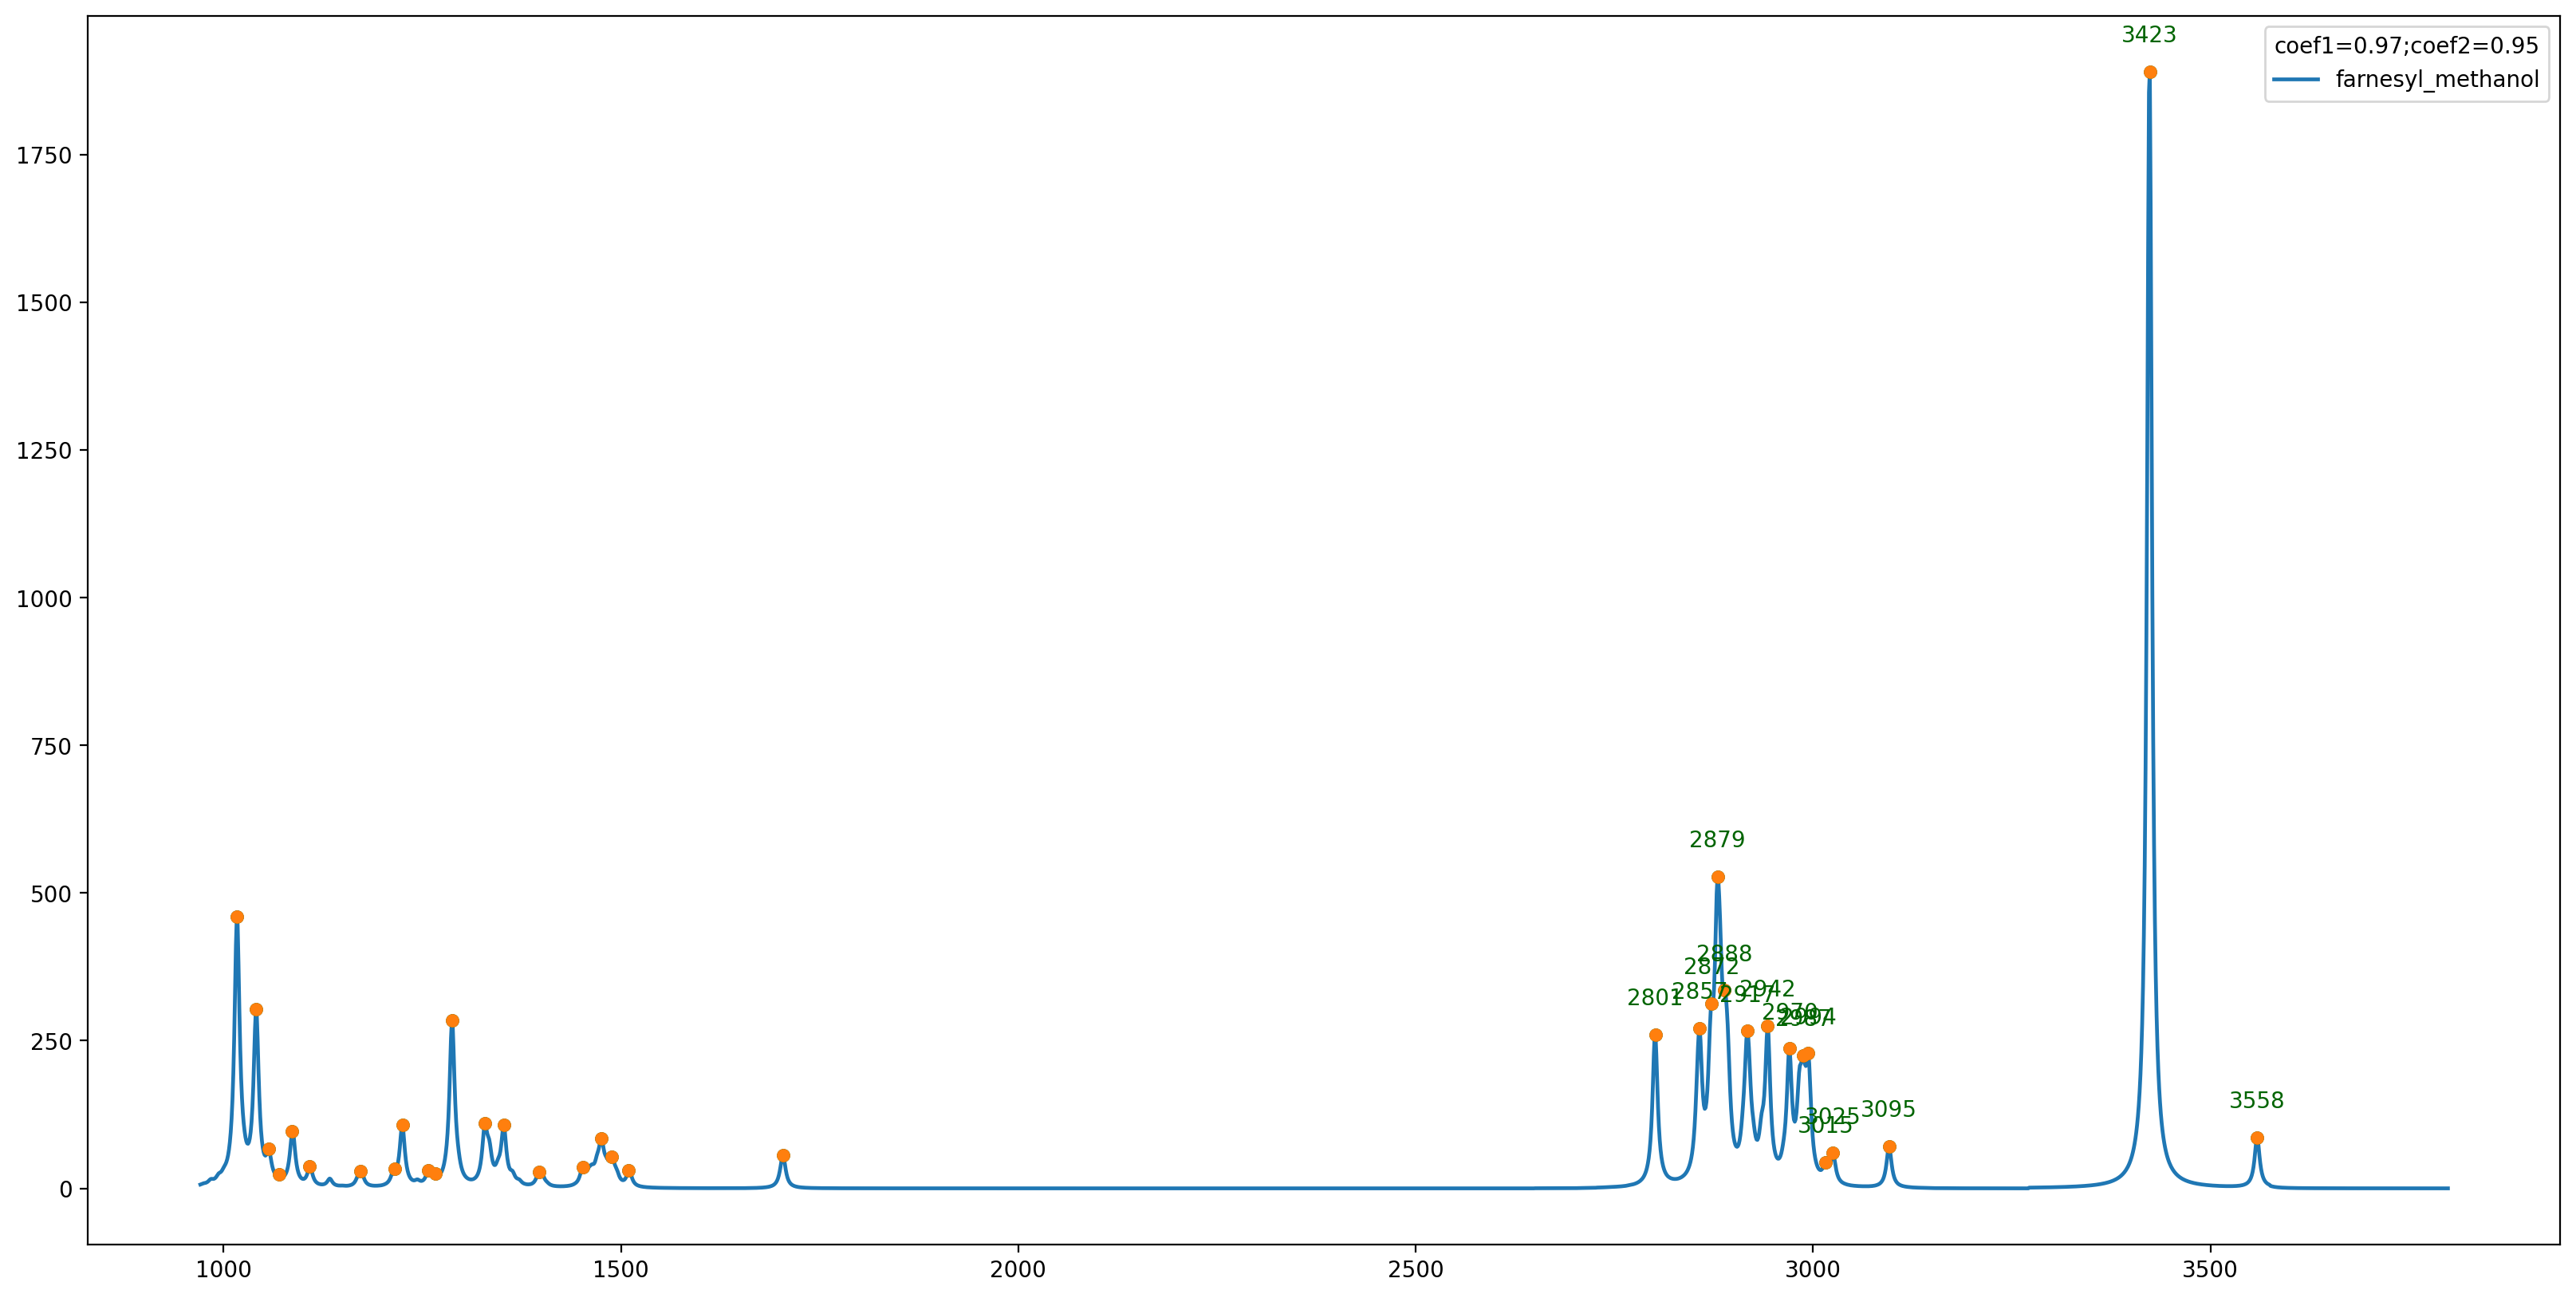

In [19]:
plot_all([farnesyl_methanol], ['farnesyl_methanol'], coef1=0.97, coef2=0.95)

In [20]:
plot_all([bact_chlor_e_R1_acetone], ['bact_chlor_e_R1_acetone'], coef1=0.97, coef2=0.95)

In [21]:
plot_all([bact_chlor_e_R1_ethanol], ['bact_chlor_e_R1_ethanol'], coef1=0.97, coef2=0.95)

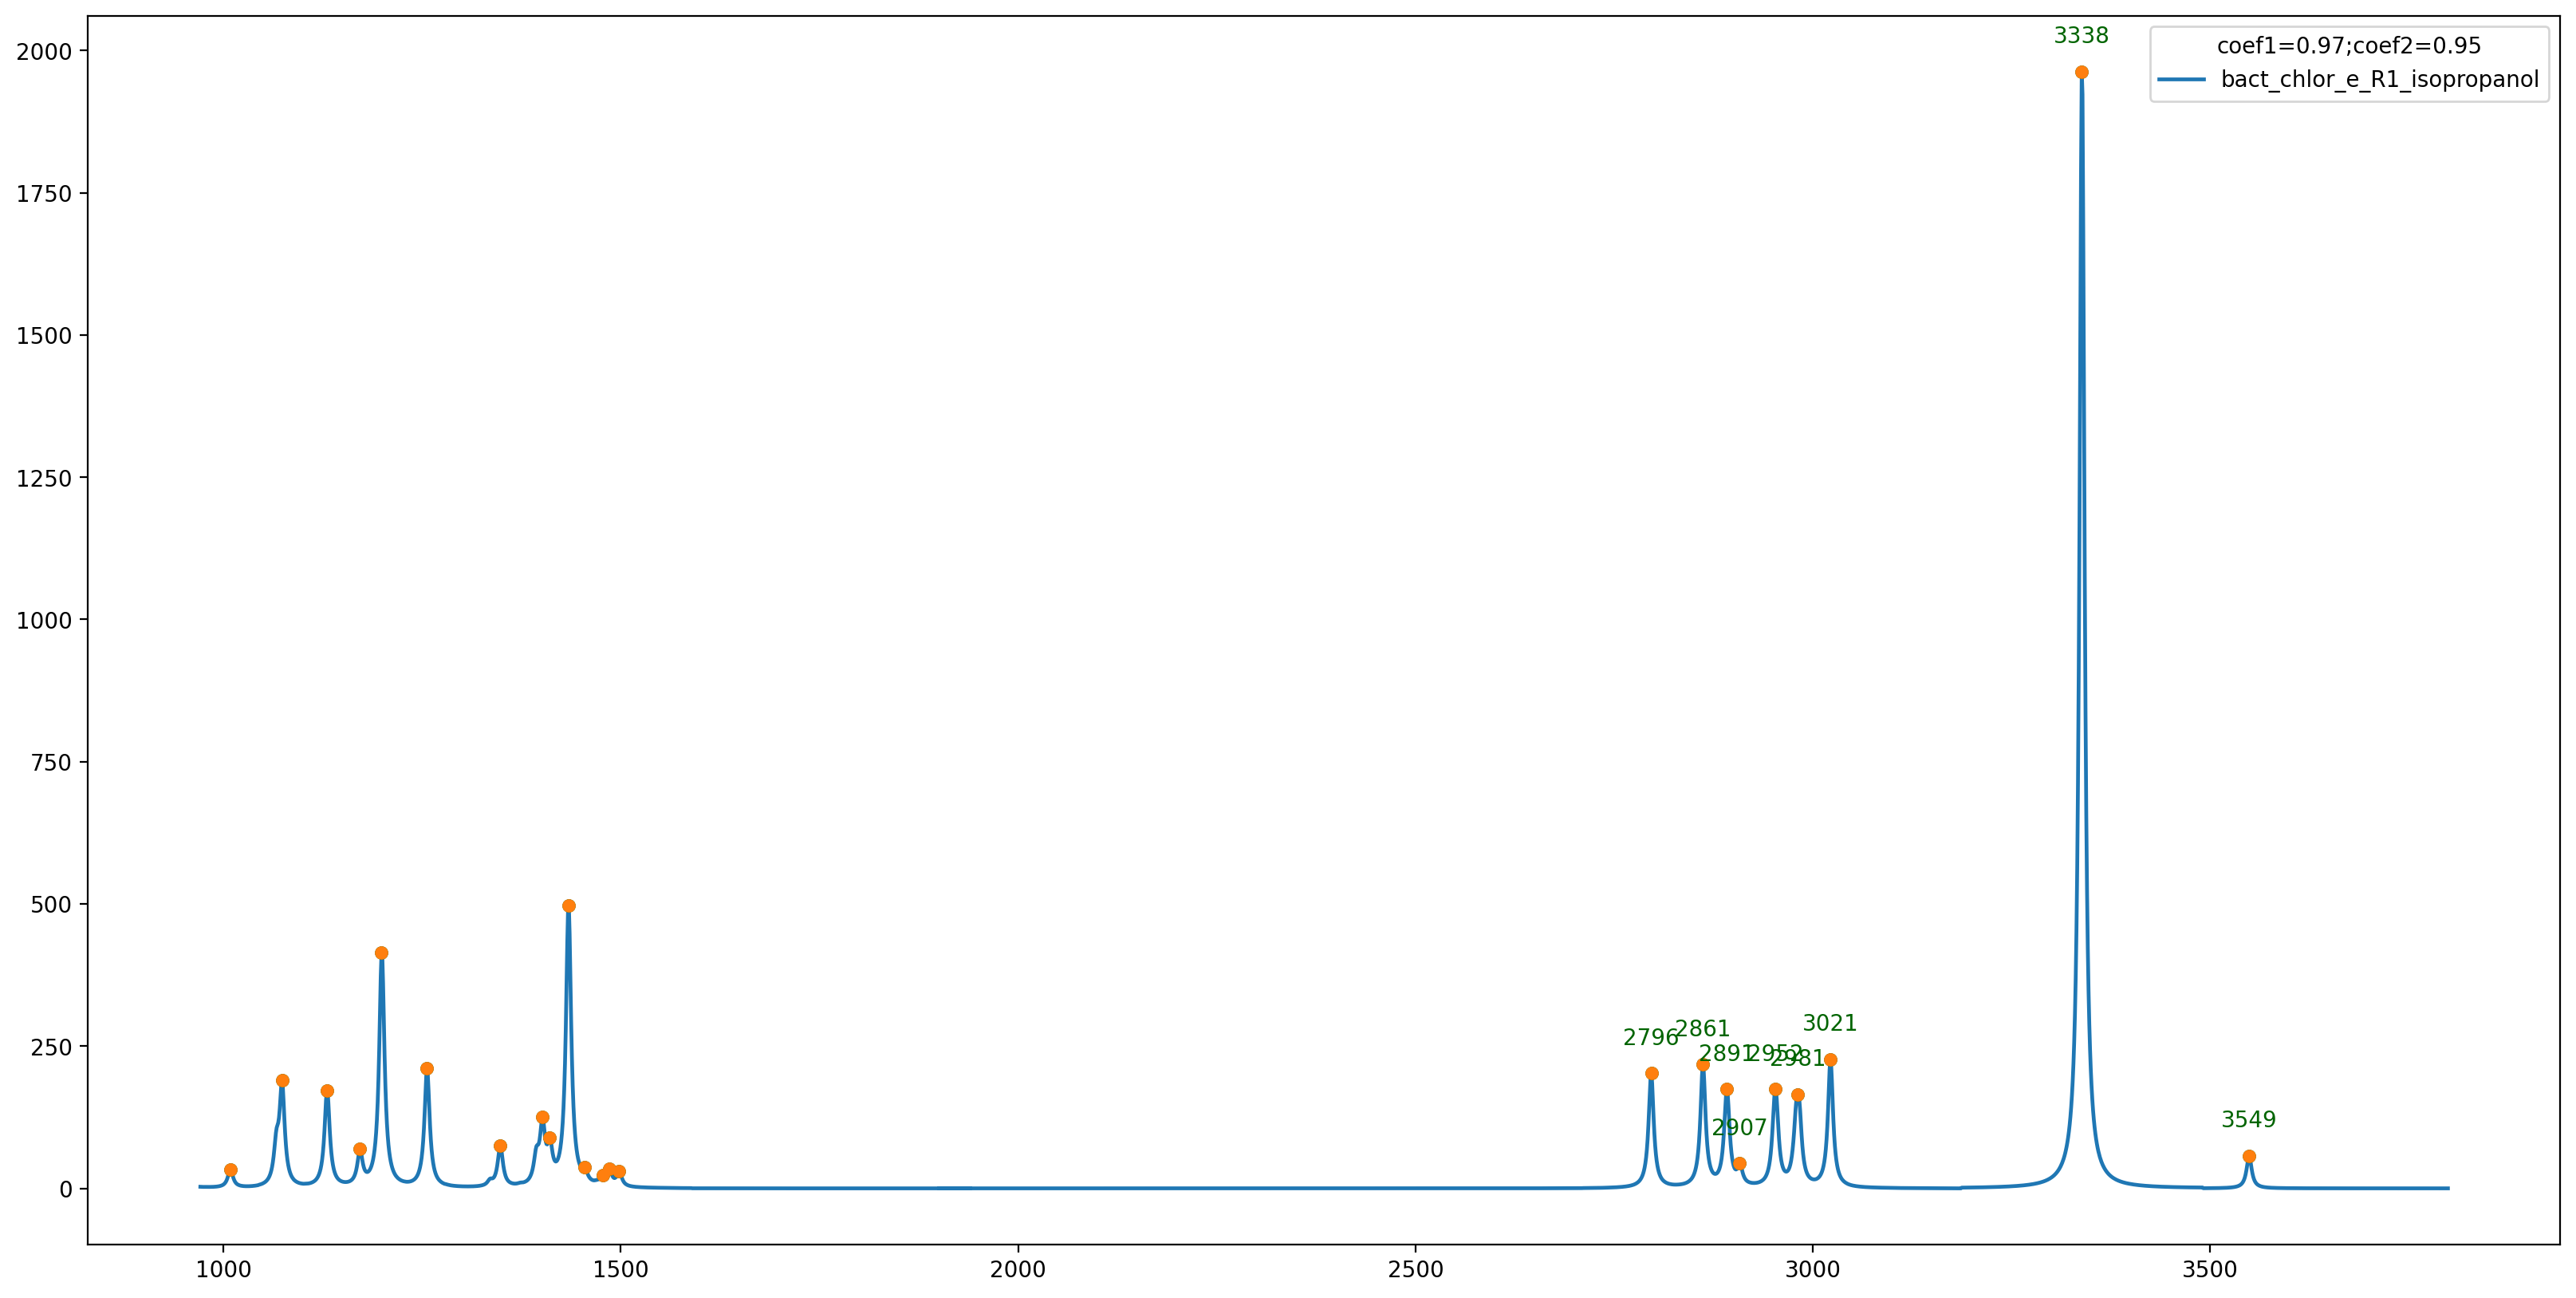

In [22]:
plot_all([bact_chlor_e_R1_isopropanol], ['bact_chlor_e_R1_isopropanol'], coef1=0.97, coef2=0.95)

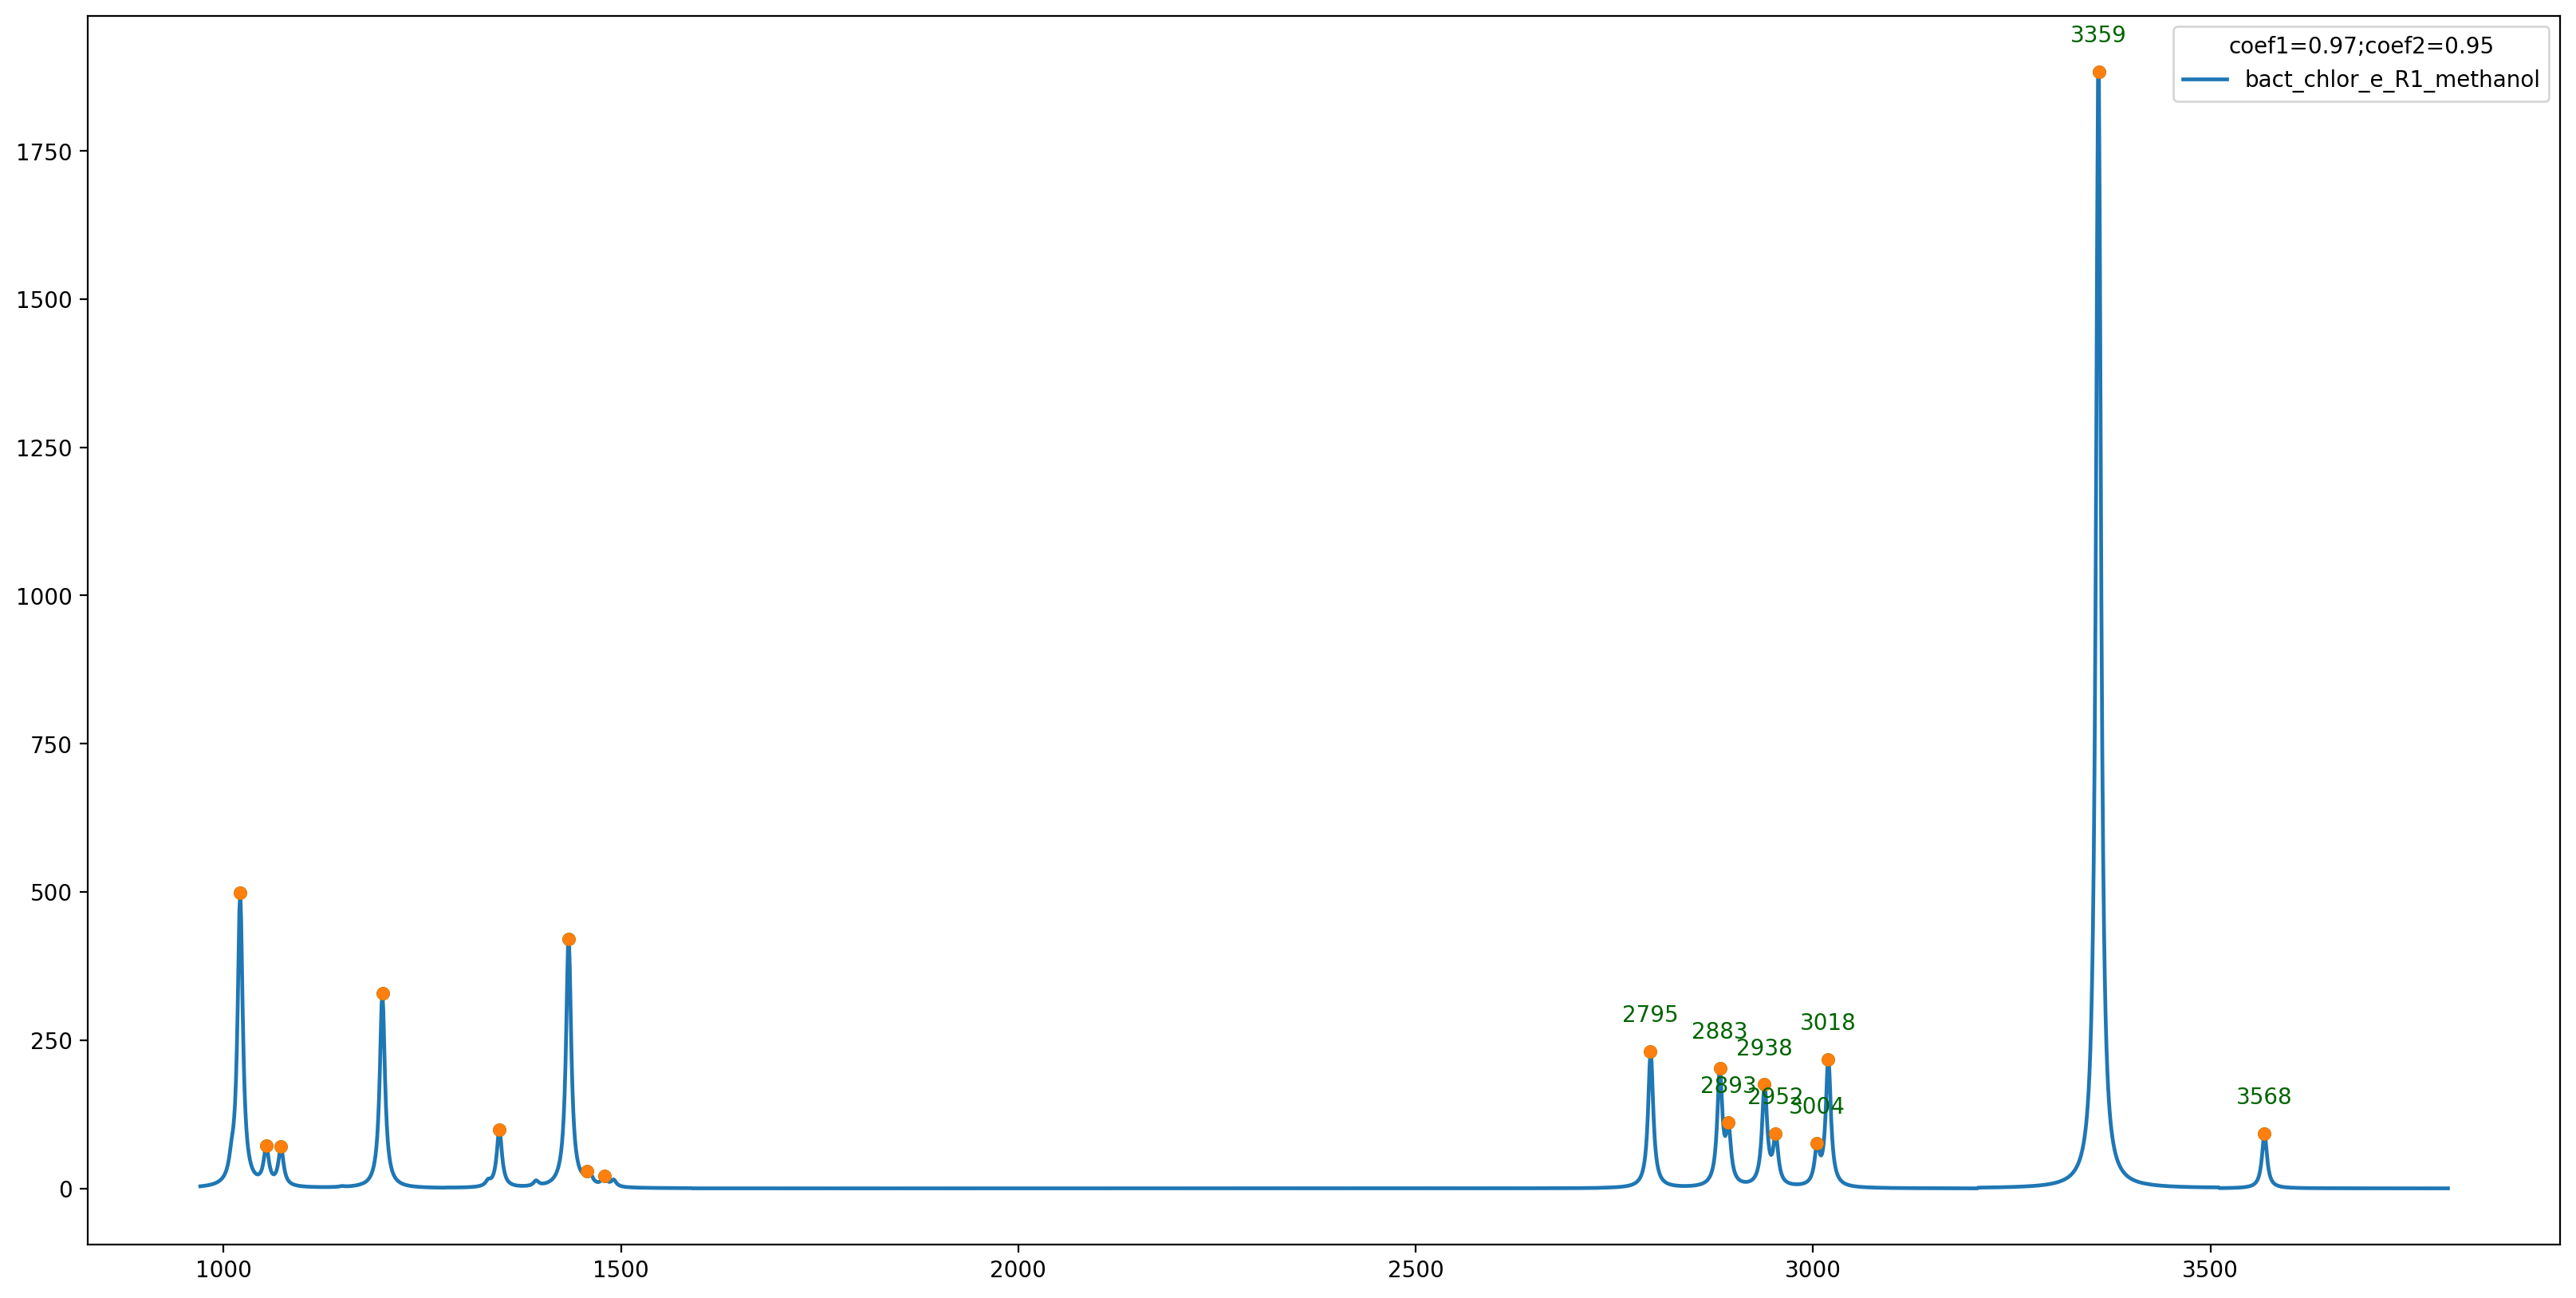

In [23]:
plot_all([bact_chlor_e_R1_methanol], ['bact_chlor_e_R1_methanol'], coef1=0.97, coef2=0.95)

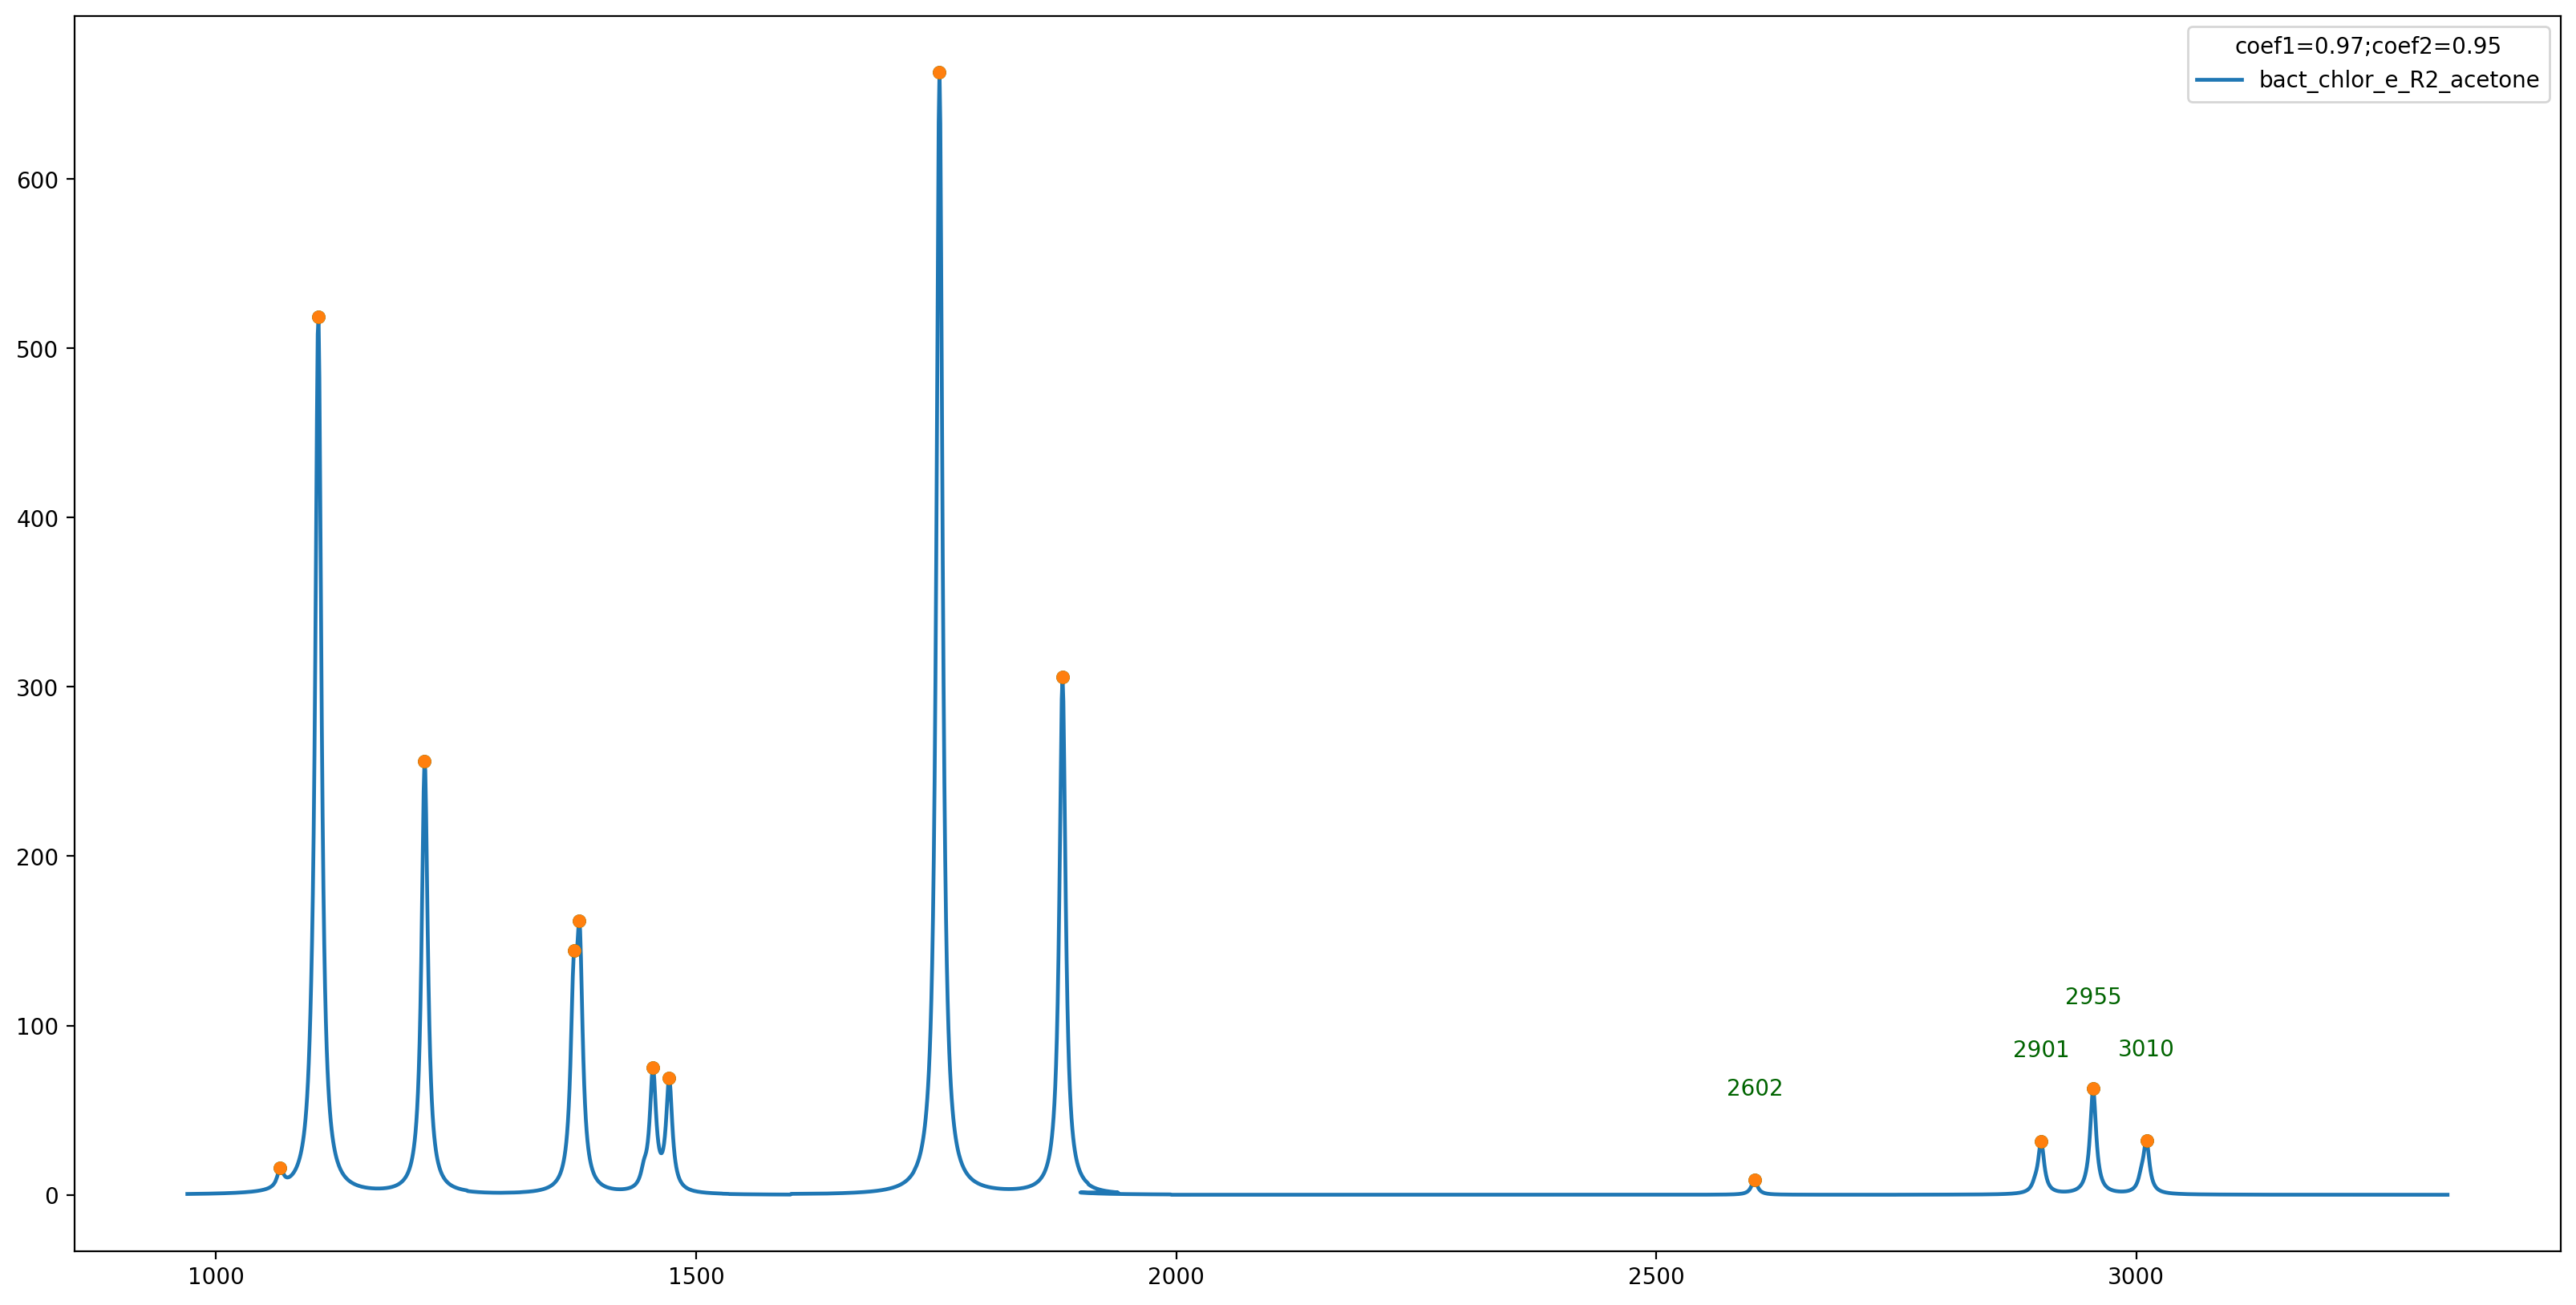

In [24]:
plot_all([bact_chlor_e_R2_acetone], ['bact_chlor_e_R2_acetone'], coef1=0.97, coef2=0.95)

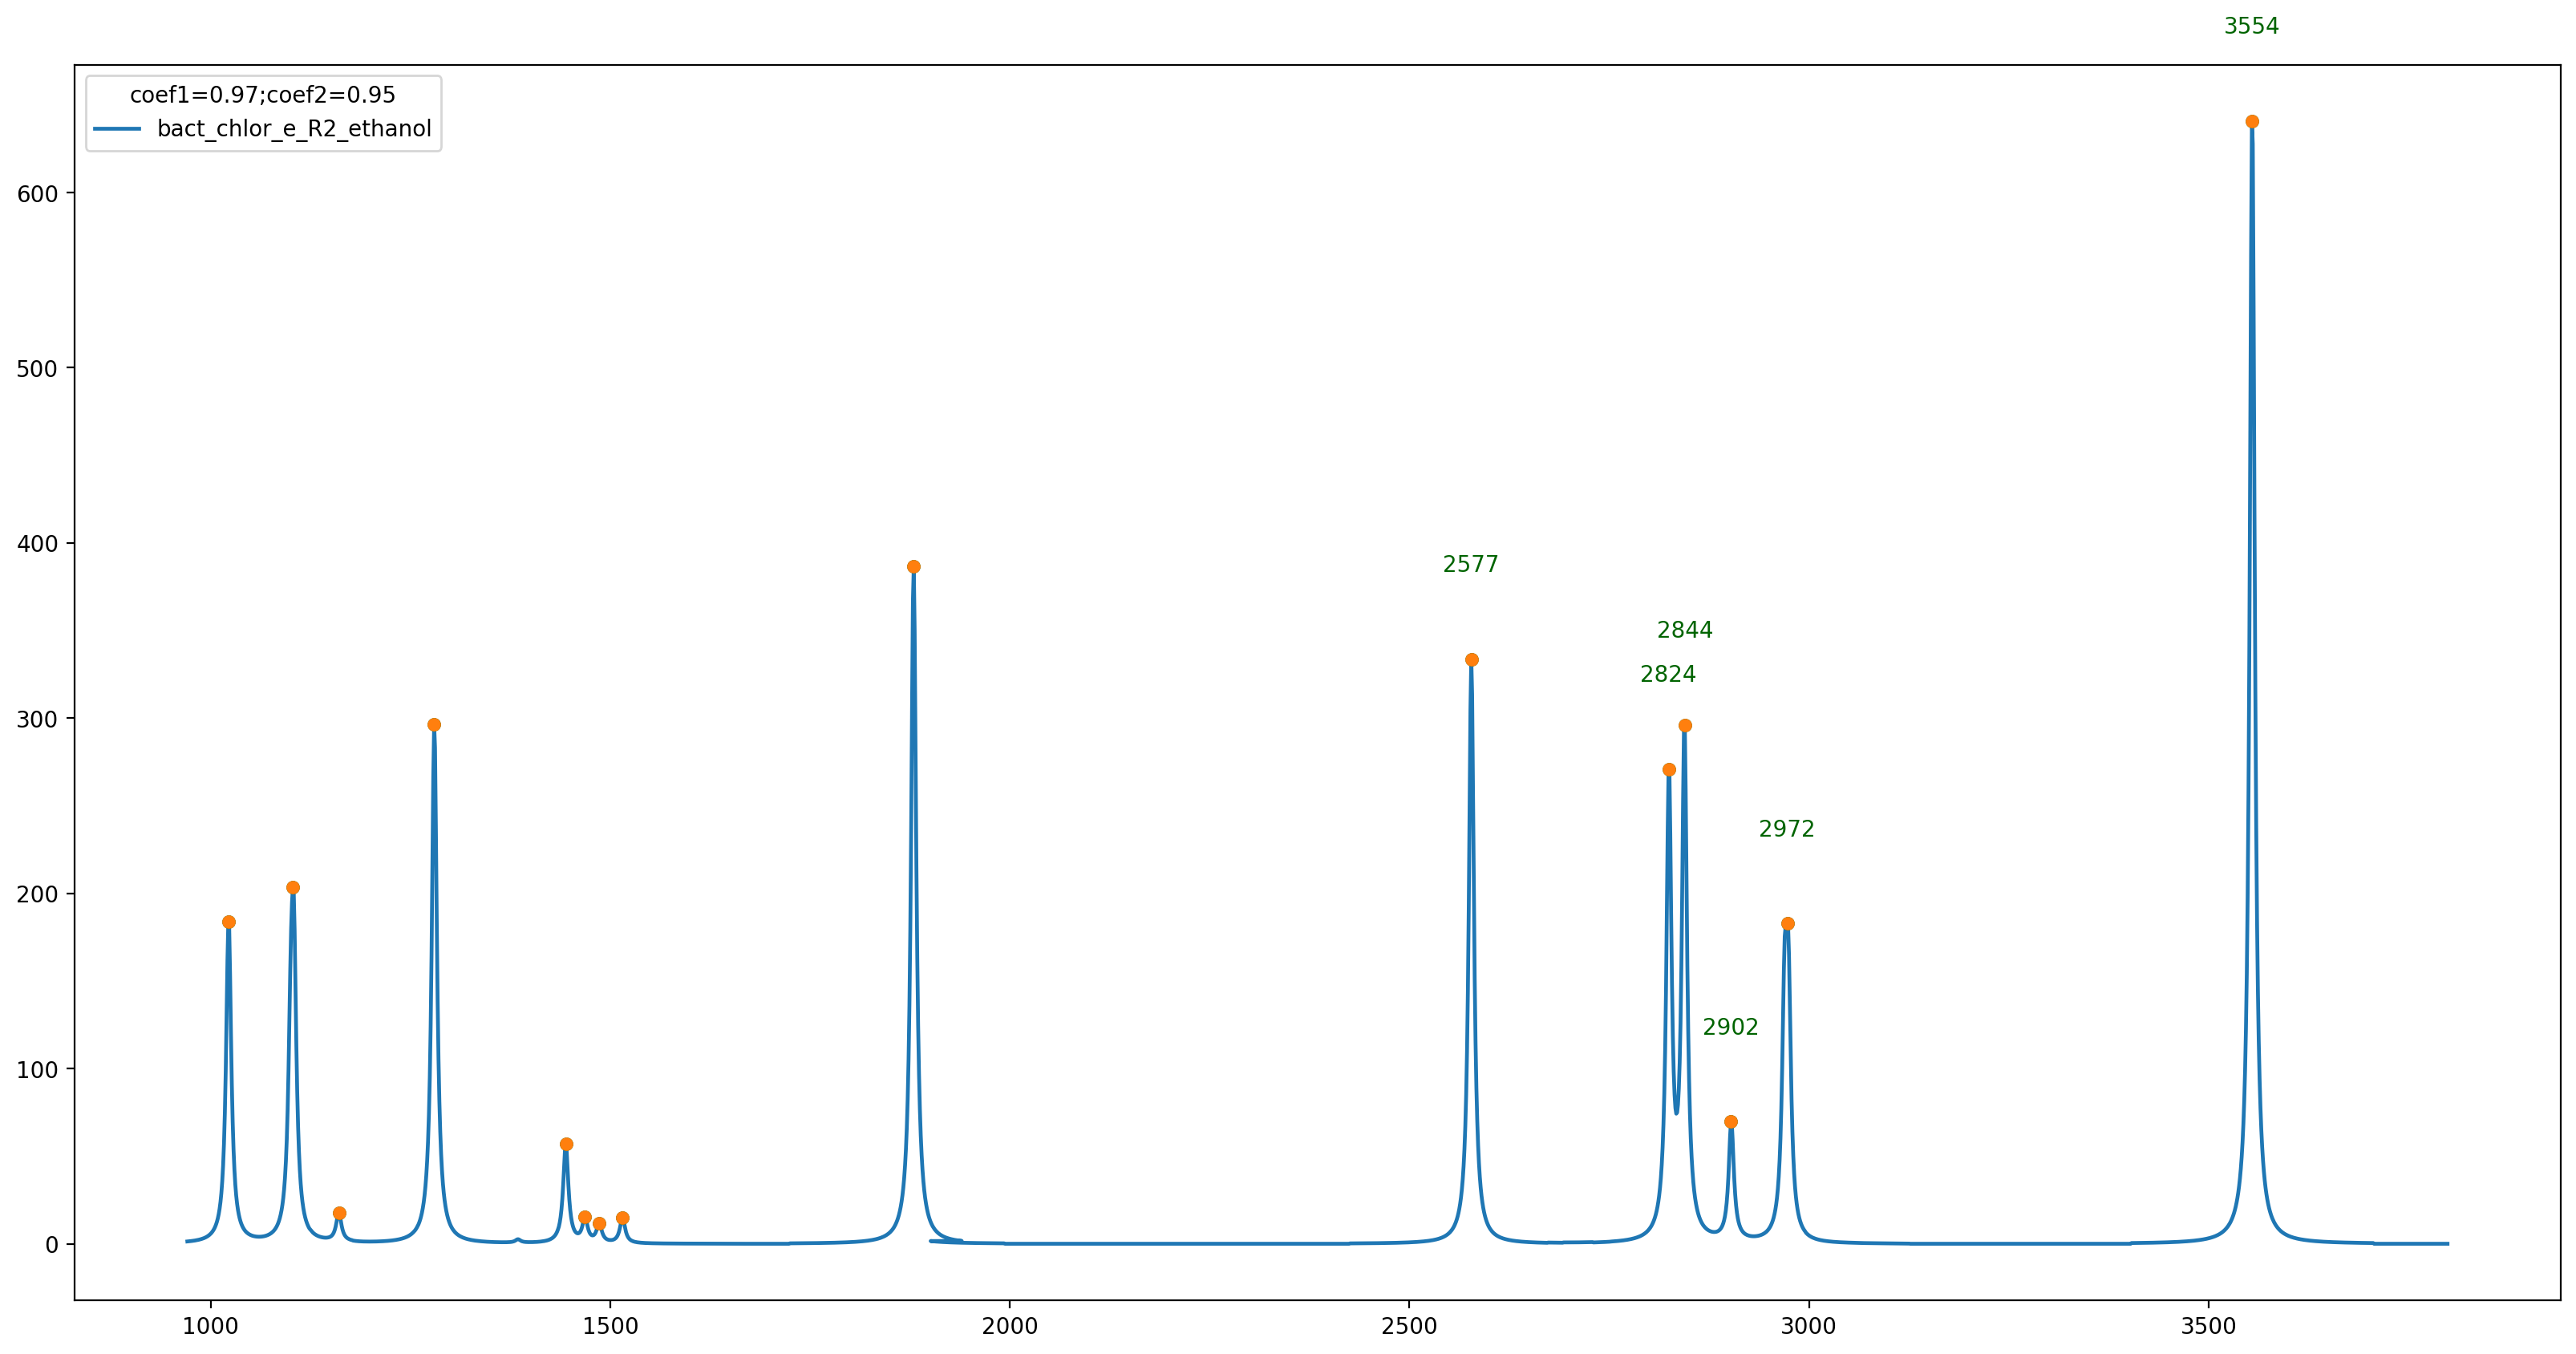

In [25]:
plot_all([bact_chlor_e_R2_ethanol], ['bact_chlor_e_R2_ethanol'], coef1=0.97, coef2=0.95)

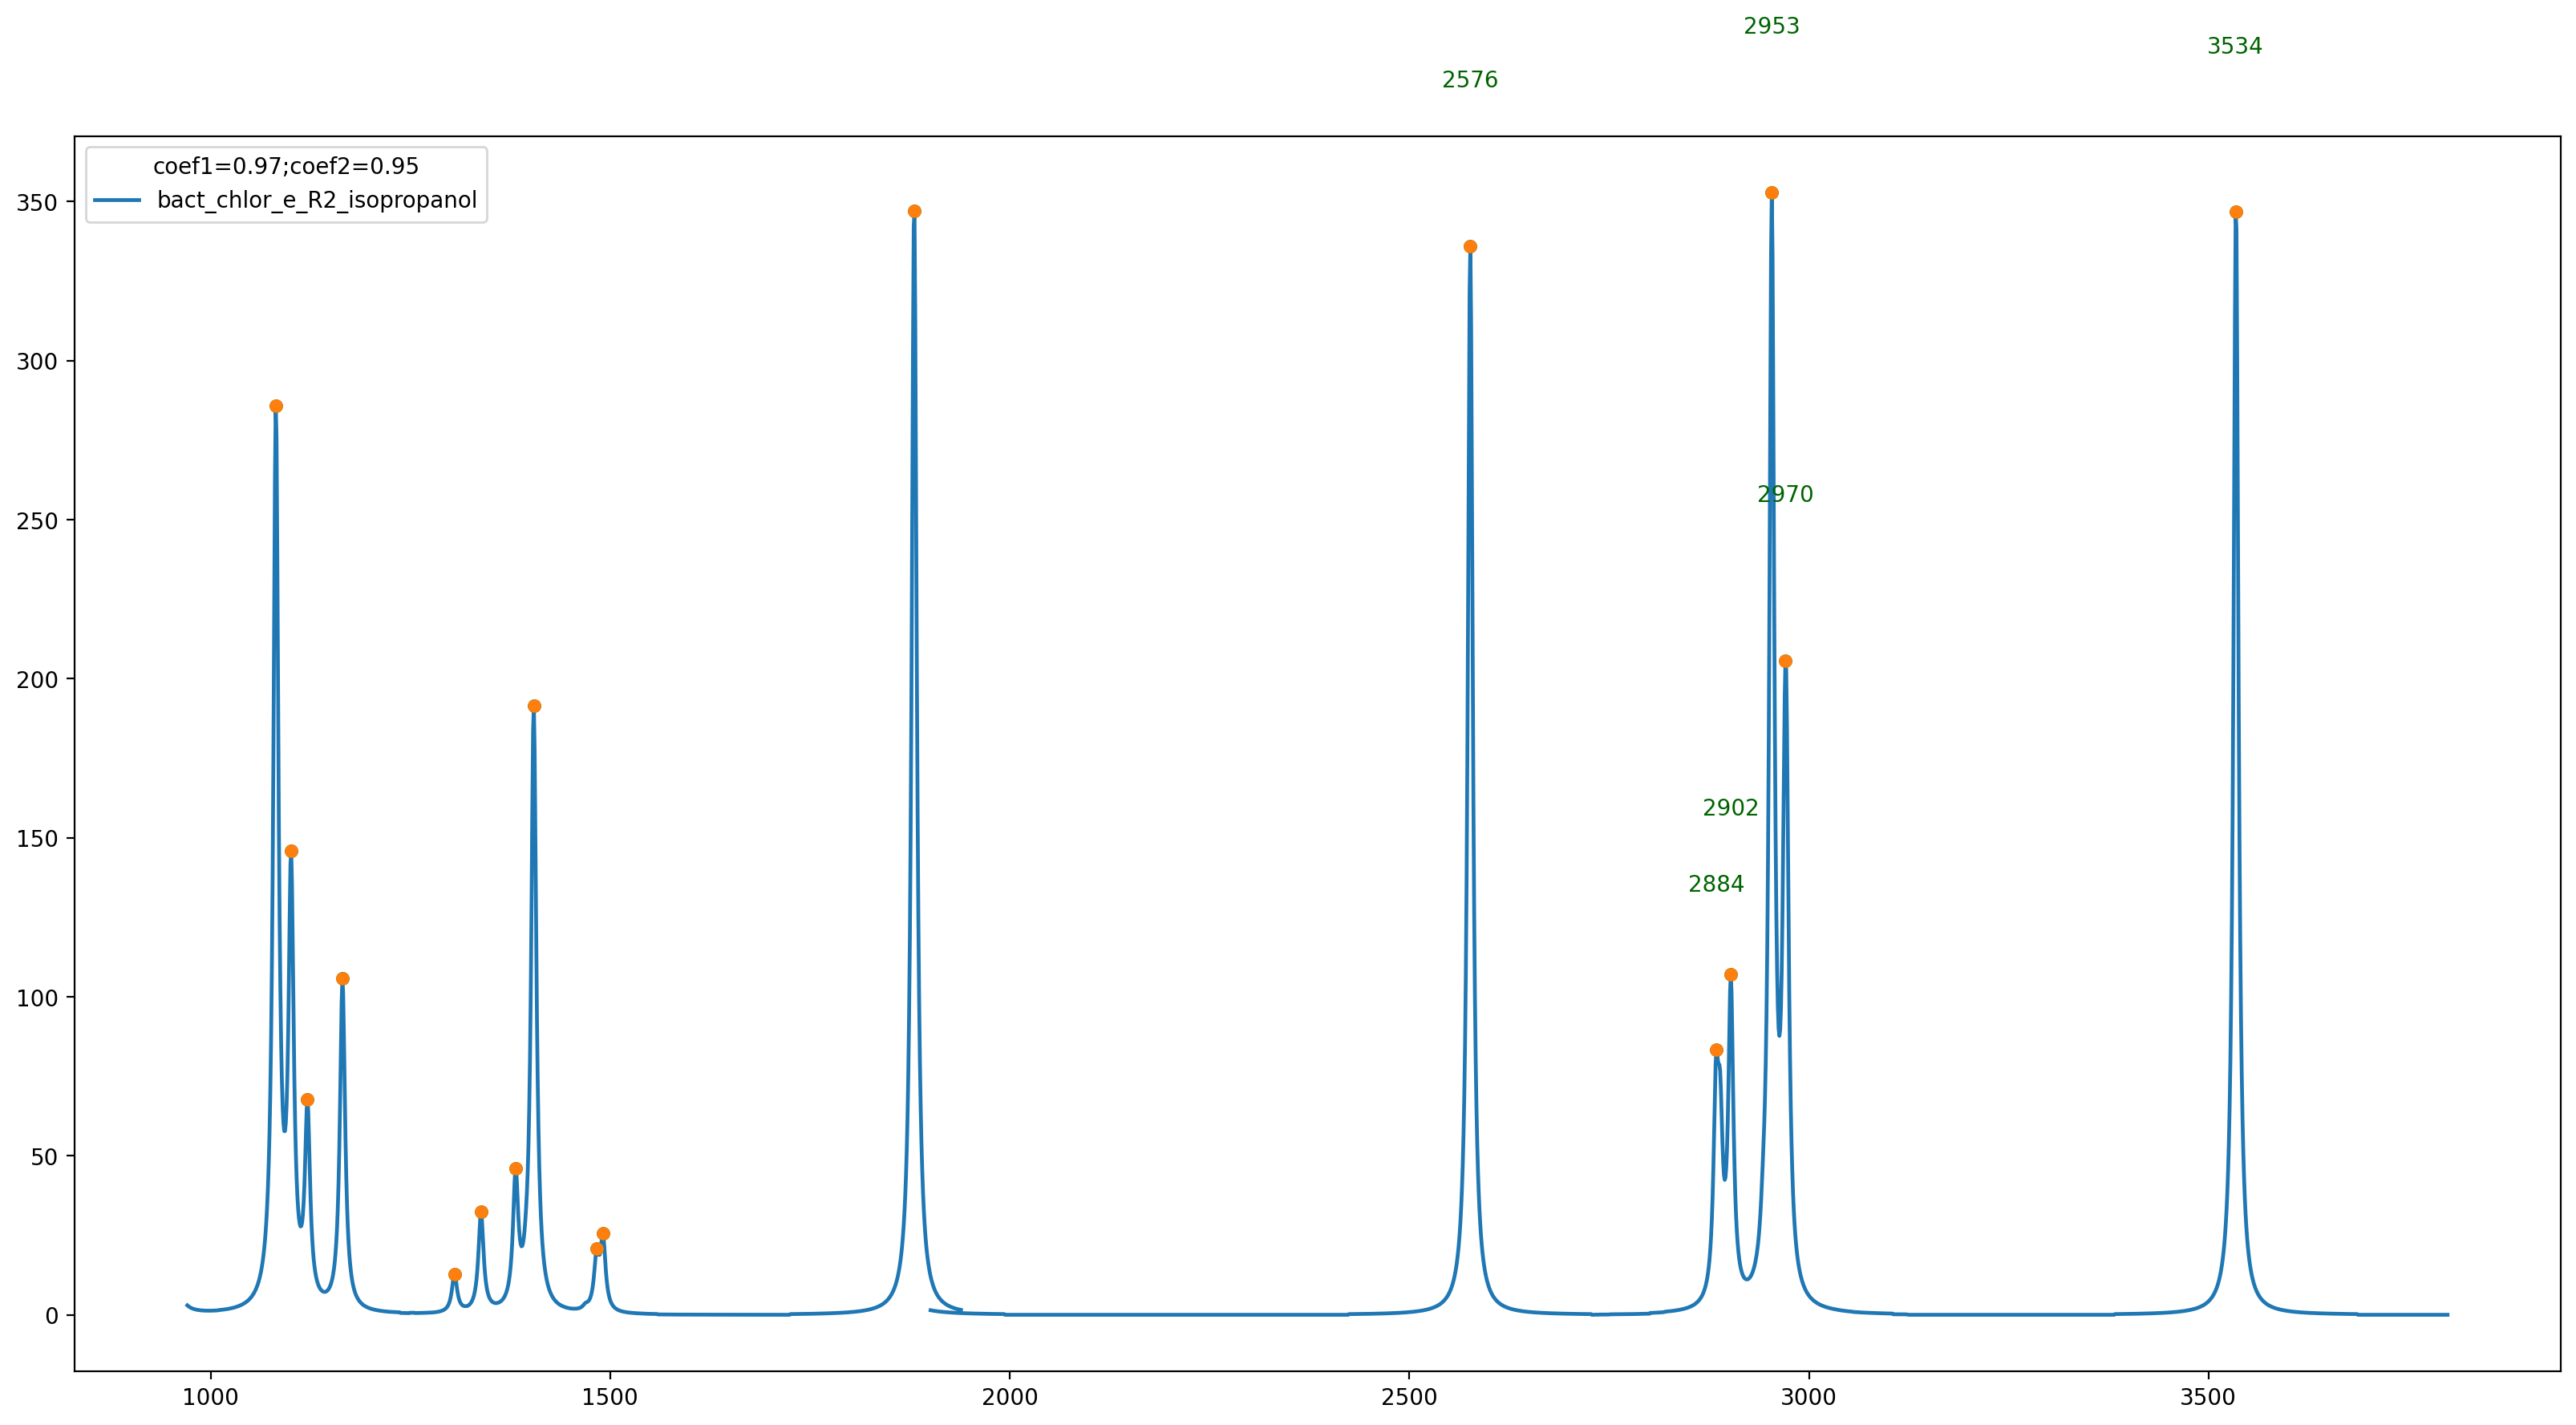

In [26]:
plot_all([bact_chlor_e_R2_isopropanol], ['bact_chlor_e_R2_isopropanol'], coef1=0.97, coef2=0.95)

In [27]:
plot_all([bact_chlor_e_R2_methanol], ['bact_chlor_e_R2_methanol'], coef1=0.97, coef2=0.95)

# Чистые

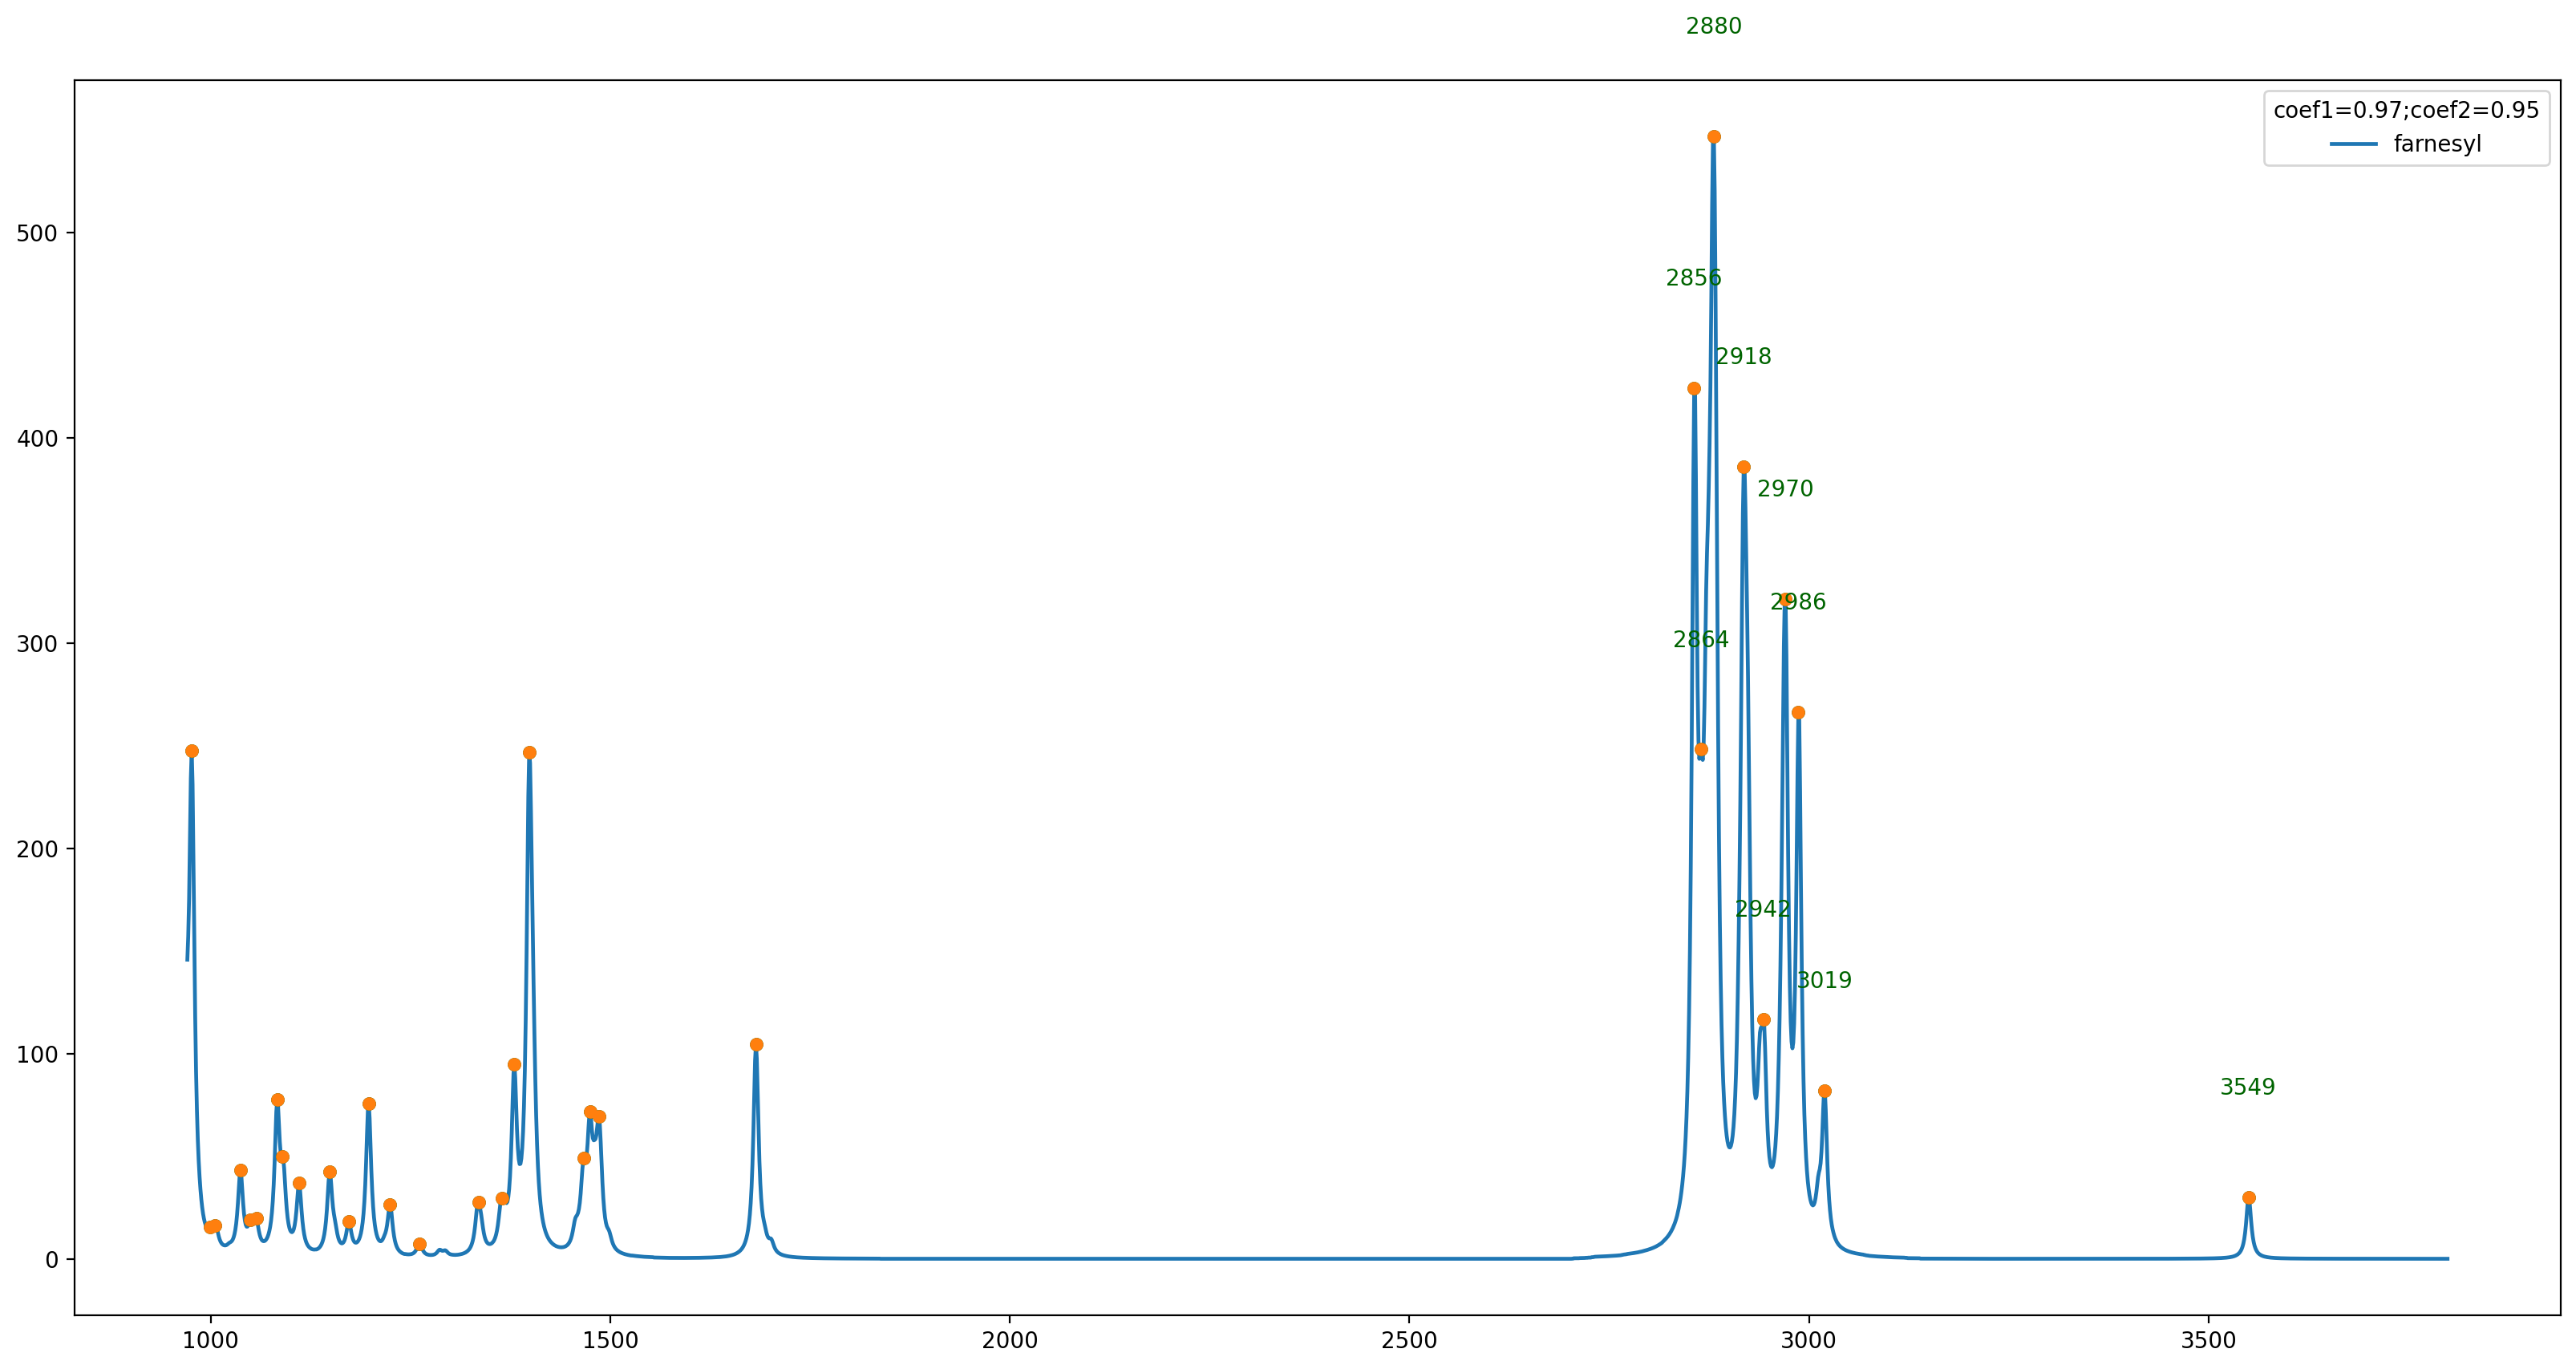

In [30]:
plot_all([farnesyl], ['farnesyl'], coef1=0.97, coef2=0.95)

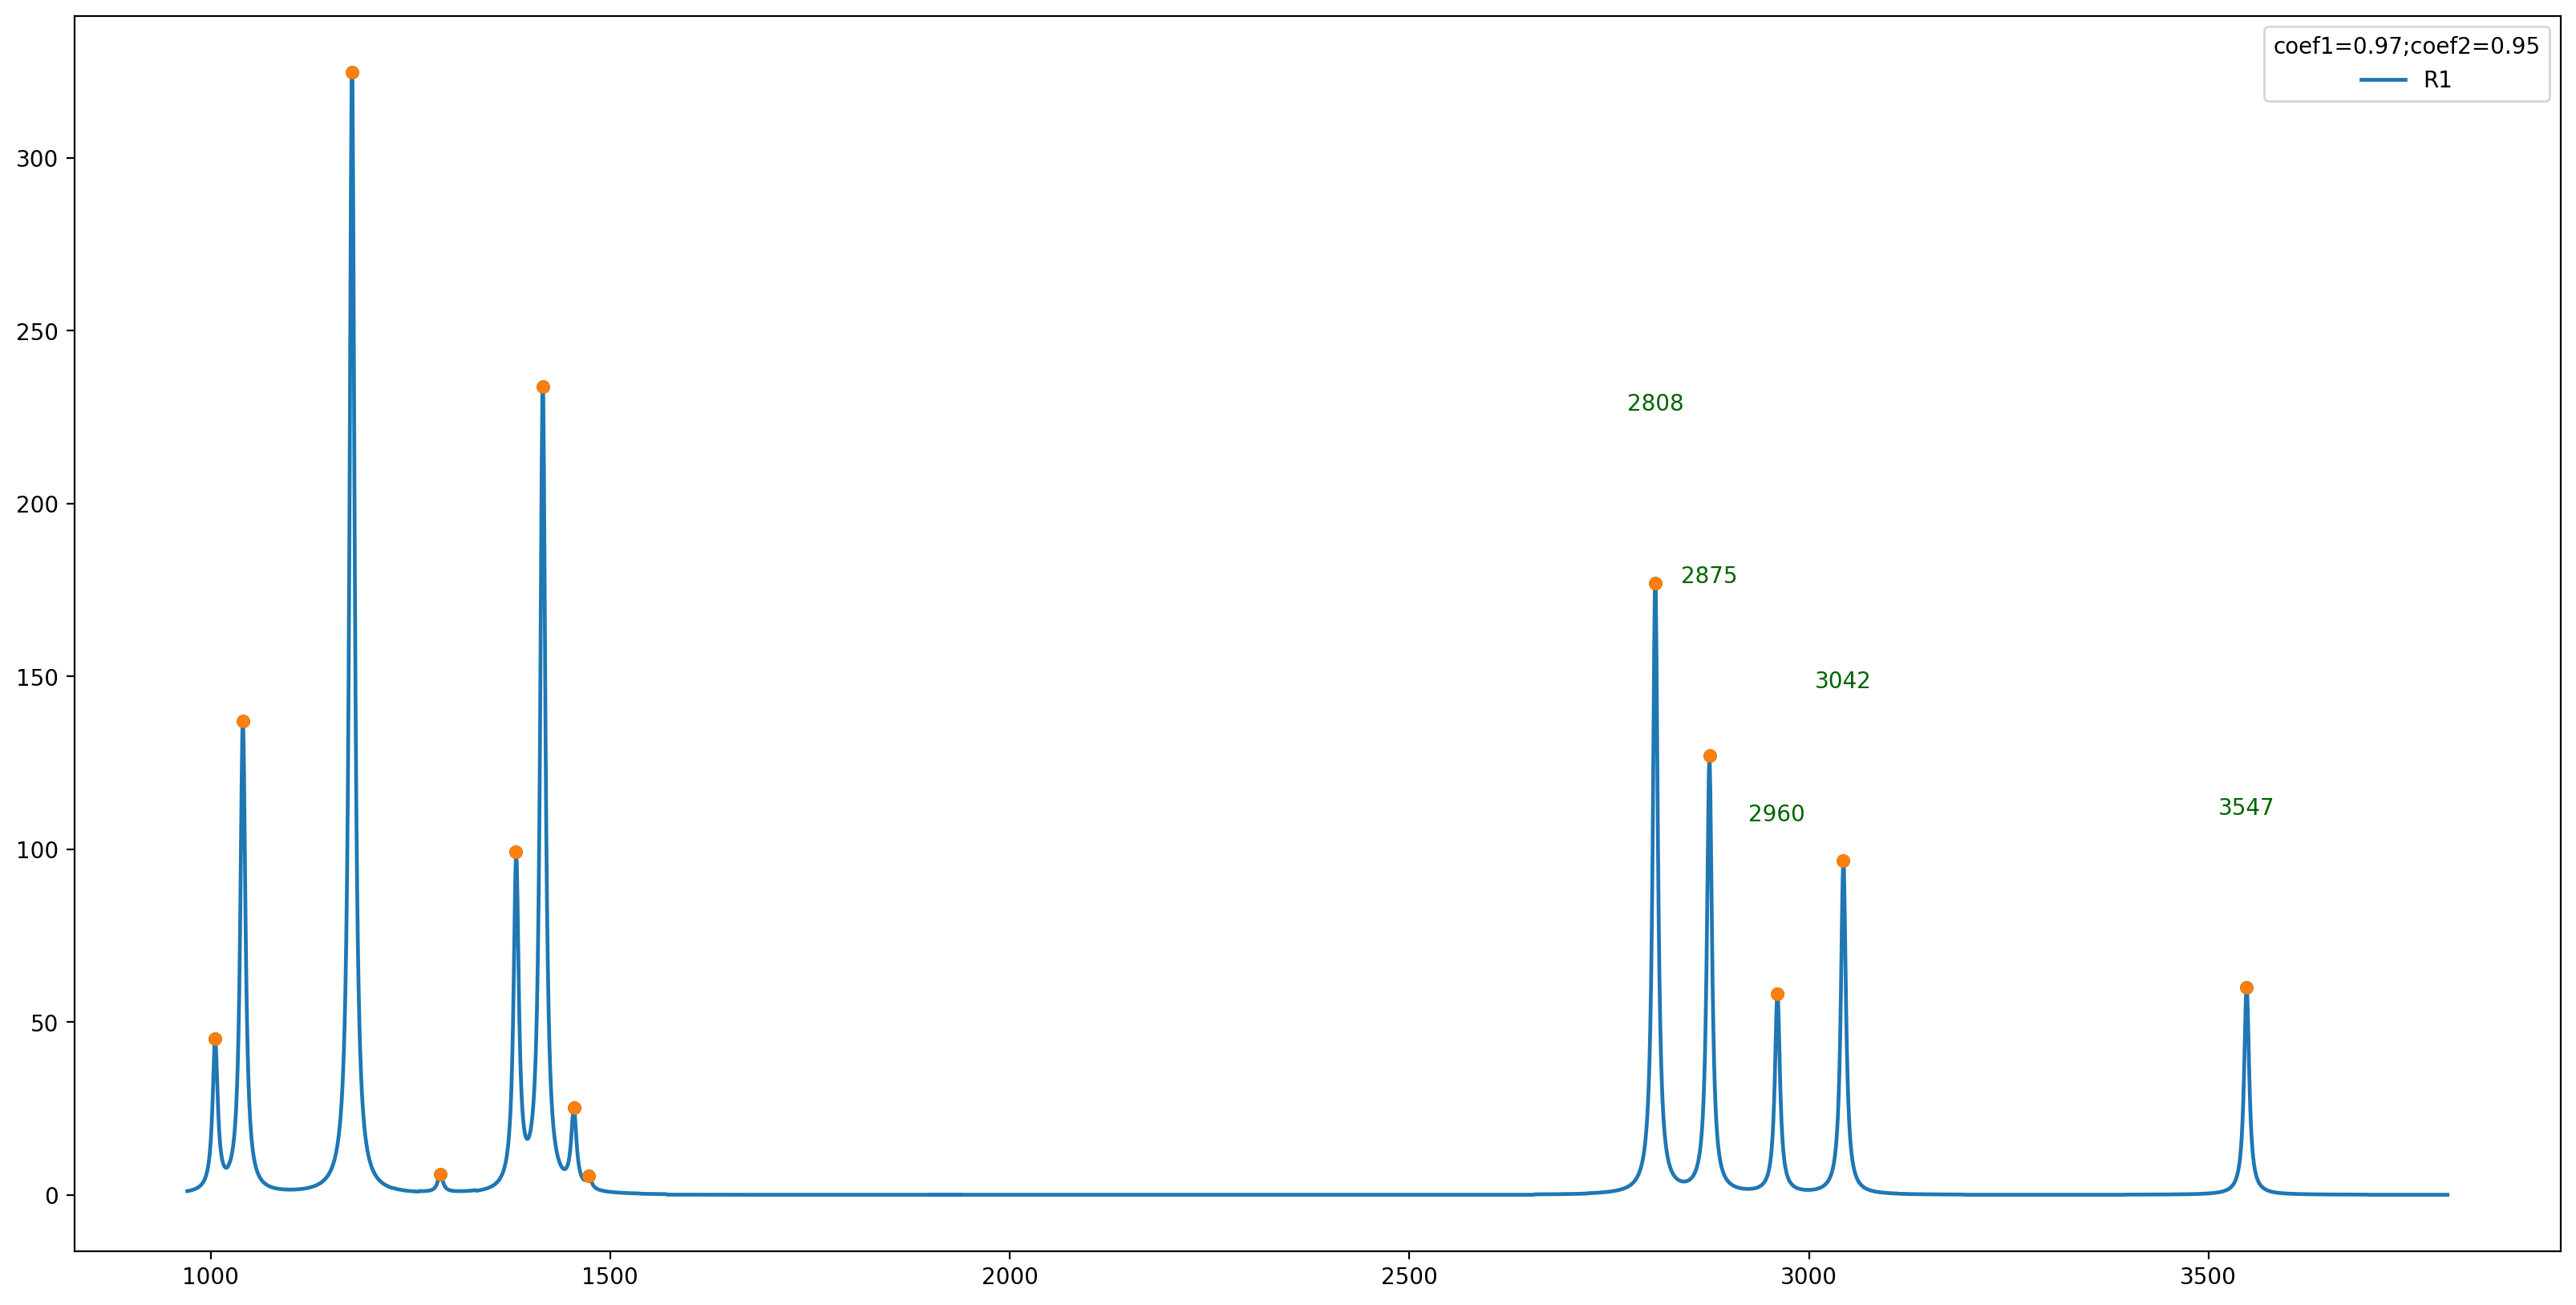

In [31]:
plot_all([r1], ['R1'], coef1=0.97, coef2=0.95)

In [32]:
plot_all([r2], ['R2'], coef1=0.97, coef2=0.95)

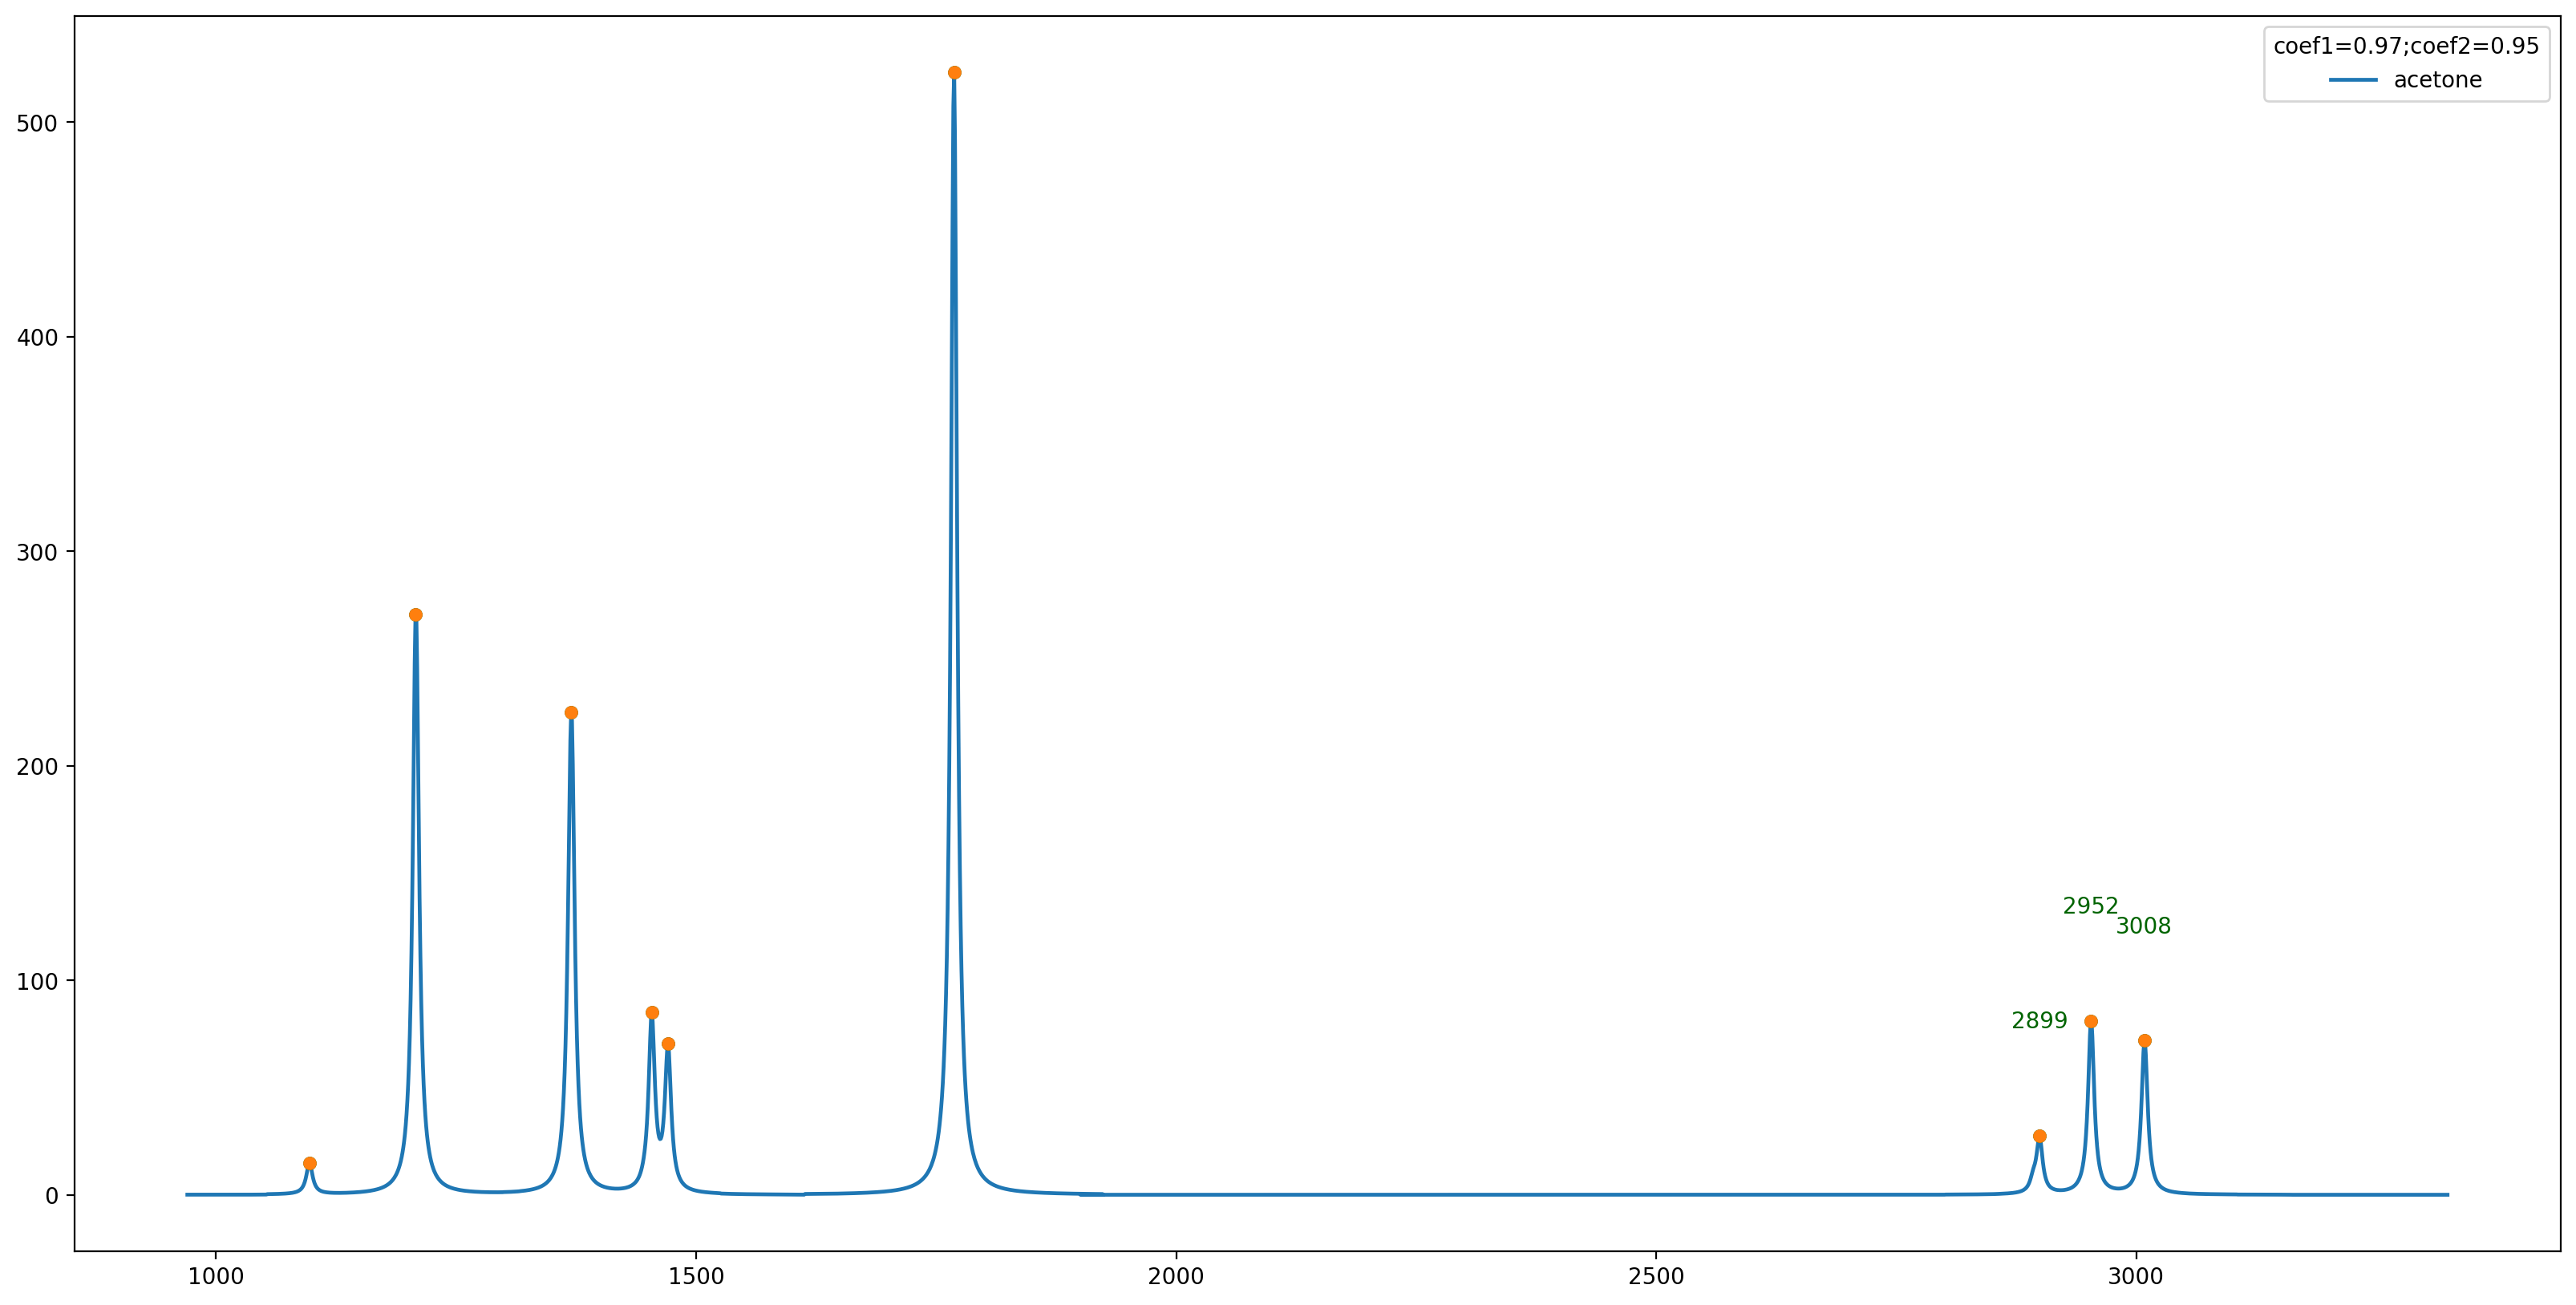

In [33]:
plot_all([acetone], ['acetone'], coef1=0.97, coef2=0.95)

In [34]:
plot_all([ethanol], ['ethanol'], coef1=0.97, coef2=0.95)

In [35]:
plot_all([isopropanol], ['isopropanol'], coef1=0.97, coef2=0.95)

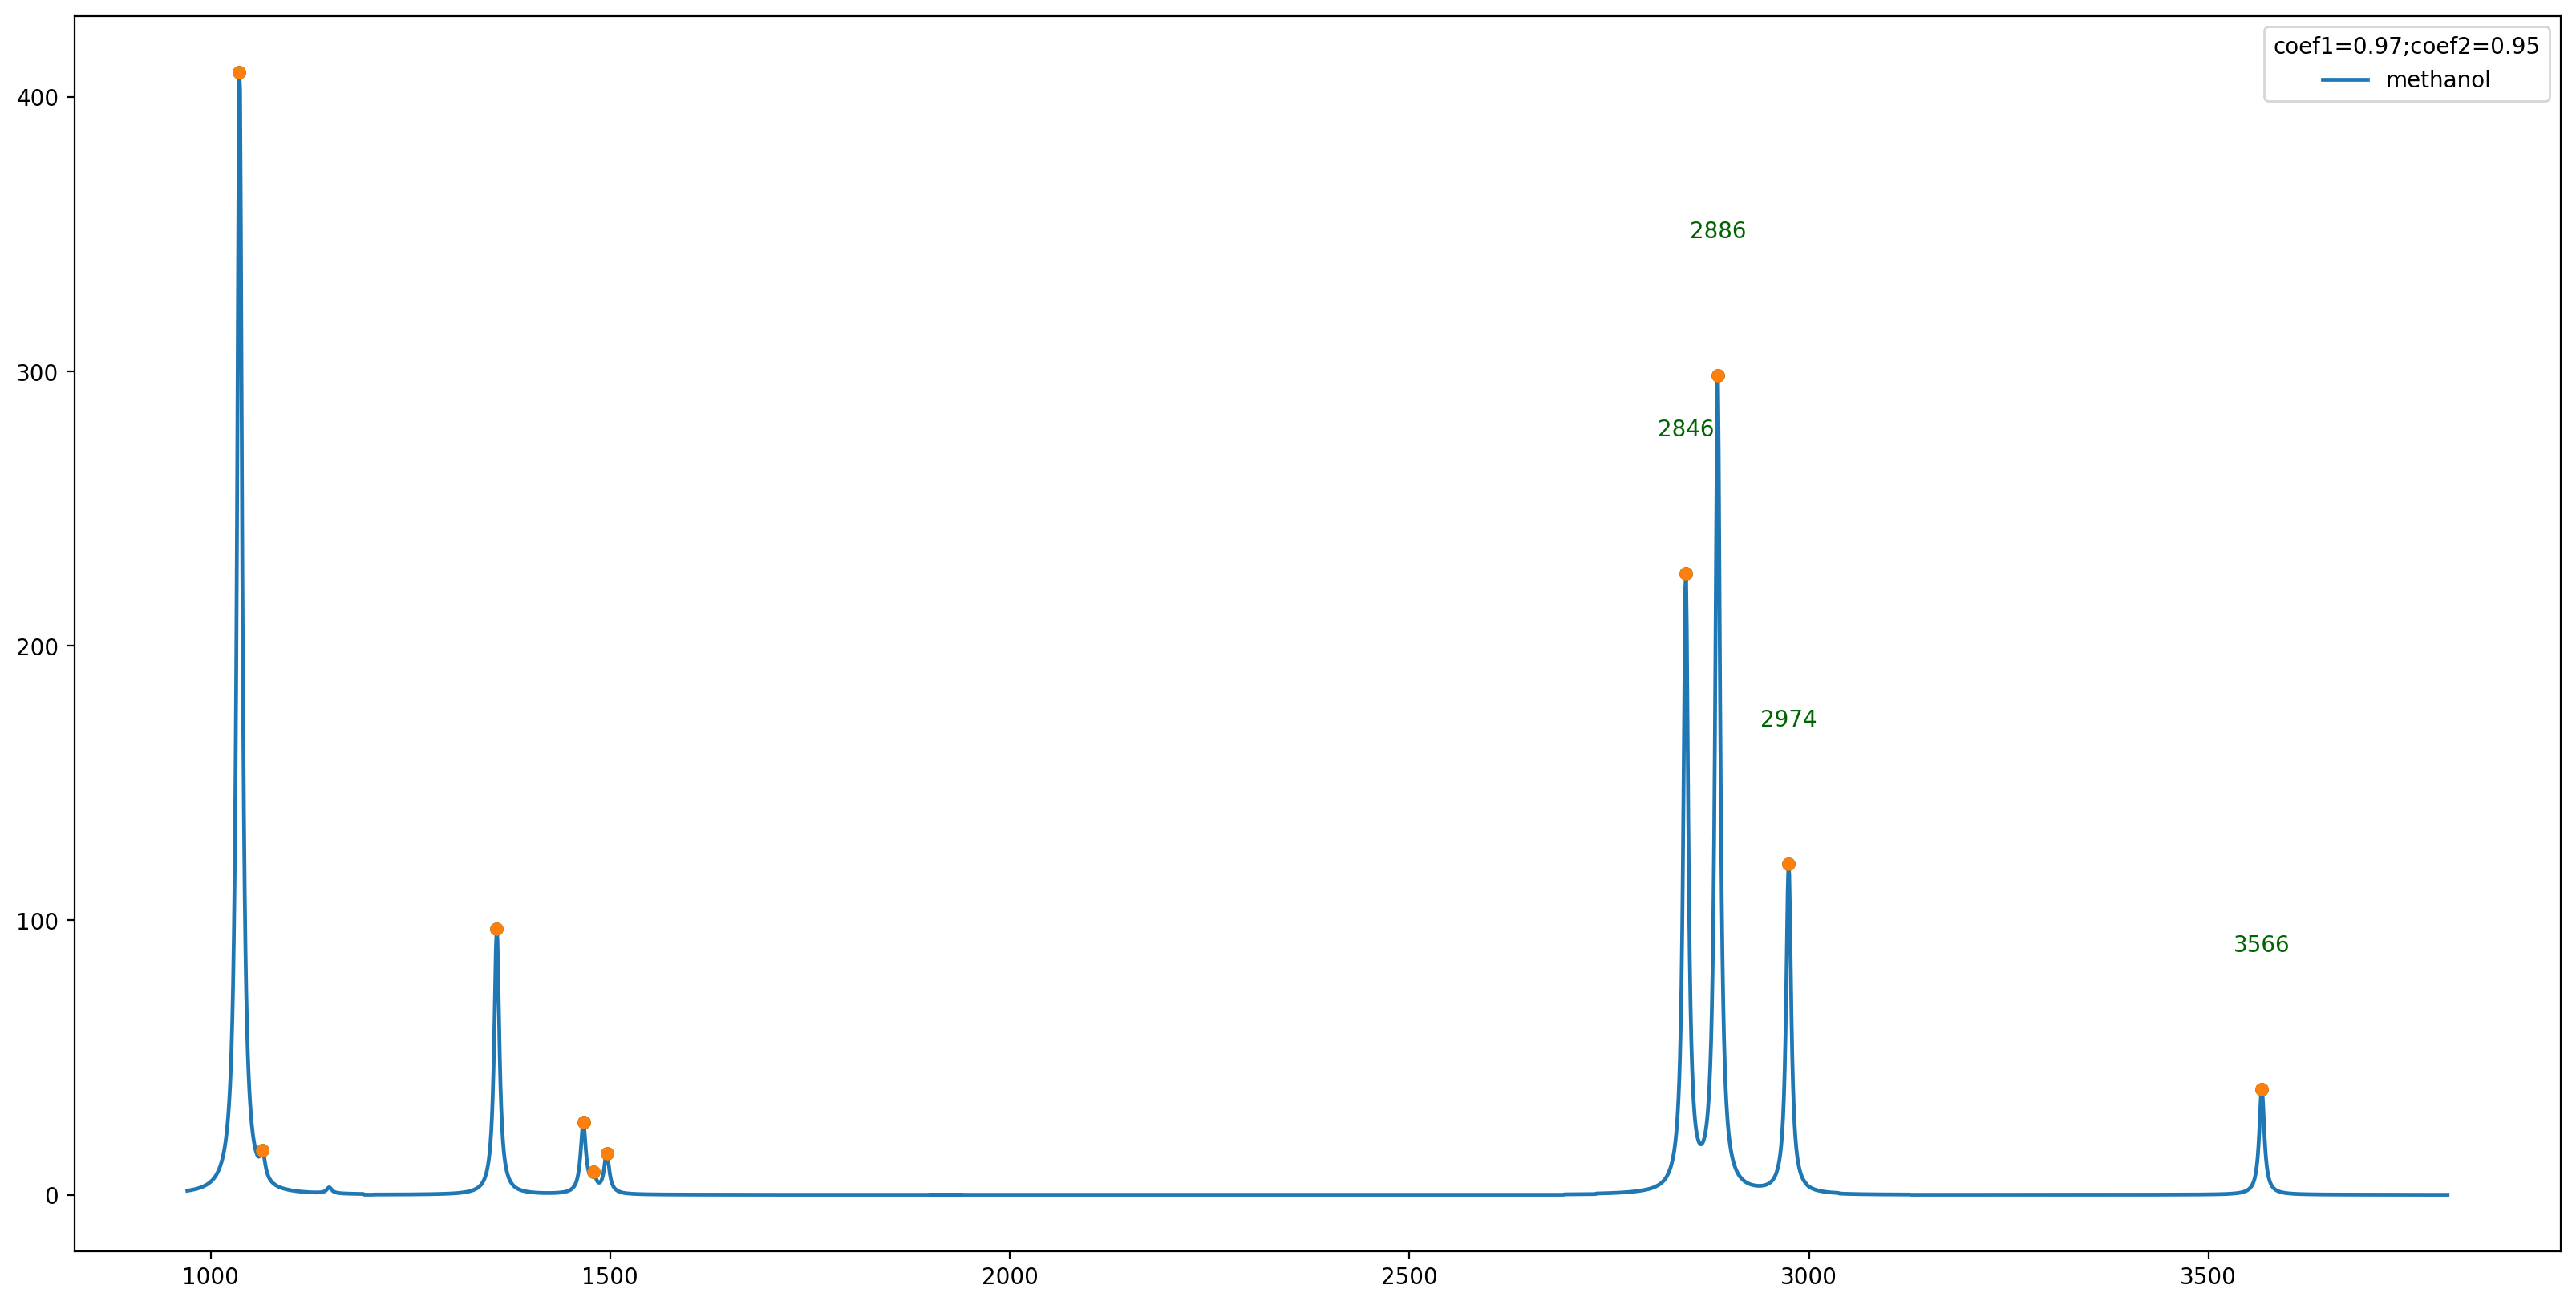

In [36]:
plot_all([methanol], ['methanol'], coef1=0.97, coef2=0.95)